# 1: ENTENDER EL PROBLEMA





Obtetivo (target): predecir la probabilidad de que un empleado deje la empresa  en funcion de un conjunto de caracteristicas.
La necesidad de hacer estas predicciones y obtener informacion del conjunto de datos relacionales es reducir los gastos y pérdidas de la empresa en el proceso de contratacion y terminación del contrato o servivio del empleado.

Las probabilidades se darán en formas de uno y cero; 

- 1=deja la empresa,
- 0= no deja la empresa.

Traduccion: variable predictora: probabilidad de dejar la empresa. variables caracteristicas (variable multivariante): educacion, distancia al trabajo, satisfaccion en el trabajo, etc.

## Entendimiento de las columnas (variables)
- Attrition: 1=se marchan, 0= se quedan. rotación de empleados en la empresa
- "BusinessTravel" se refiere al nivel de viajes de negocios que realizan los empleados de la empresa
- DailyRate salario diario
- EducationField (campo de educacion) se refiere al campo o área de estudio en el que los empleados de la empresa han obtenido su formación académica. Esta columna incluye diferentes categorias como "Life Sciences" (Ciencias de la Vida), "Marketing", "Technical Degree" (Título Técnico), "Human Resources" (Recursos Humanos), "Medical" (Medicina), entre otros.
- Department" se refiere al departamento o área funcional de la empresa en la que trabaja cada empleado
- Education" hace referencia al nivel de educación alcanzado por los empleados en la empresa. Es decir, representa el grado académico que cada empleado ha obtenido, y puede incluir opciones como "High School"=1 (educación secundaria), "Bachelor" (licenciatura)=2, "Master" (maestría)=3 o "Doctorate" (doctorado)=4, entre otros posibles niveles de educación.
- "StandardHours" se refiere a las horas estándar que un empleado es contratado para trabajar por semana en su trabajo
- "EnvironmentSatisfaction" se refiere al nivel de satisfacción que tienen los empleados con el ambiente de trabajo en la empresa. 1=malo .... 4=muy bueno
- HourlyRate  Esta columna indica la cantidad de dinero que se paga por hora de trabajo a cada empleado.
- JobInvolvement" se refiere al nivel de involucramiento o compromiso que tiene cada empleado con su trabajo 1=poco involucrado  4=muy involucrado
- MaritalStatus" se refiere al estado civil de cada empleado en la empresa. casado soltero o viudo
- MonthlyIncome" se refiere al salario que se paga a cada empleado por mes, "MonthlyRate" se refiere a la tasa mensual que se cobra por un servicio
- La columna "OverTime" se refiere a si cada empleado trabaja horas extras en la empresa o no
- "PercentSalaryHike" se refiere al porcentaje de aumento en el salario que recibió cada empleado en su última revisión salarial
- PerformanceRating: se refiere al nivel de desempeño de cada empleado en su trabajo, que puede medirse y evaluar en diferentes niveles.1=malo, 4=muy bueno

- RelationshipSatisfaction: se refiere al nivel de satisfacción de cada empleado con sus relaciones interpersonales en el trabajo, como las relaciones con sus compañeros de trabajo, supervisores y clientes.

- StockOptionLevel: se refiere al nivel de opciones sobre acciones que tiene cada empleado en la empresa. Las opciones sobre acciones son un tipo de compensación que permite a los empleados comprar acciones de la empresa a un precio fijo, lo que les permite obtener beneficios financieros si el valor de las acciones aumenta en el futuro.

- TotalWorkingYears: se refiere al número total de años que cada empleado ha trabajado en cualquier trabajo, no solo en la empresa actual.

- TrainingTimesLastYear: se refiere al número de veces que cada empleado recibió capacitación o formación en el último año.

- WorkLifeBalance: se refiere al equilibrio entre la vida laboral y personal de cada empleado. 1=desequilibrada, 4=muy equilibrada

- YearsAtCompany: se refiere al número de años que cada empleado ha trabajado en la empresa actual.

- YearsInCurrentRole: se refiere al número de años que cada empleado ha trabajado en su puesto actual.

- YearsSinceLastPromotion: se refiere al número de años que ha pasado desde la última promoción de cada empleado. Esta información puede ser importante para comprender las oportunidades de crecimiento y desarrollo profesional en la empresa y tomar decisiones informadas sobre cómo mejorar la retención de empleados.

- YearsWithCurrManager: se refiere al número de años que cada empleado ha trabajado con su actual supervisor o gerente.

# 2 IMPORTAR LAS LIBRERÍAS Y LOS DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Necesitarás montar tu disco usando los siguientes comandos:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Debe incluir el enlace completo al archivo csv que contiene su conjunto de datos.    employee=empleado
employee_df=pd.read_csv("Human_Resources.csv")
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# 3: Explorar y conocer el dataset

## Preguntas preeliminares en relacion con el objetivo

### 1.- Durante el analisis
- ¿cuántas personas se marchan?
- por qué se marchan
- ¿cuántas personas se marchan por genero?
- cuáles variables tienen mayor impacto en determinar si una persona decide irse o quedarse de la empresa (correlaciones)
- qué probabilidad hay de que un empleado deserte en funcion de su genero, distancia al trabajo, etc.?
- ¿cómo influyen variables como el grado de educacion, distancia al trabajo, el sueldo mensual, los aumentos salariales, la satisfaccion referente al trabajo, el estado civil, las horas extra trabajadas, entre muchas otras (que estén disponibles en la data) respecto al numero de emplead@s que se van o se quedan?
### 2.- Posterior al analisis (posibles soluciones y precauciones)
- qué hacer para retener a empleados con altas habilidades y compromiso
- qué medidas tomar para no contratar a potenciales disernientes laborales y no tener pérdidas económicas
- qué variables reforzar para no tener un flujo rotativo de contrataciones alto o cómo disminuir el flujo de empleados que desertan de la empresa
- Advertencia: es importante hacer las preguntas clave y suficientes en relacion con la necesidad del cliente, porque no podemos estarnos preguntando sobre relaciones entre todas las variables de manera conjunta individual o en grupos, pues tendriamos muchas combinaciones entre variables

Esta serie de preguntas podrian ser respondidas, pero por fines practicos, solo nos centraremos en el objetivo.

In [ ]:
#ver todas las columnas
pd.set_option('display.max_columns', None)
employee_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [ ]:
employee_df.shape

(1470, 35)

In [ ]:
employee_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
#hay data nula? NO
employee_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
#tipo de datos de las columnas
employee_df.info()
#notamos que en algun punto del analisis tendremos que convertir las variables categoricas a numericas para beneficio del algoritmo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
#descriptiva univariada de las columnas
employee_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Note en el codigo anterior no toma en cuenta las categóricas

Tambien nos interesa saber las modas, pues, por ejemplo ¿cuál es el precio usual que se le paga a la mayoria de los trabajadores por dia?. Esto estadisticamente se traduce en su moda de la columna dailyrate. Lo mismo podemos hacer con las demas

In [ ]:
#moda para una columna de df
import statistics
statistics.mode(employee_df['DailyRate'])

691

In [ ]:
#moda para todas las columnas
for col in employee_df:
    mode = statistics.mode(employee_df[col])
    print(f"La moda de la columna {col} es: {mode}")

La moda de la columna Age es: 35
La moda de la columna Attrition es: No
La moda de la columna BusinessTravel es: Travel_Rarely
La moda de la columna DailyRate es: 691
La moda de la columna Department es: Research & Development
La moda de la columna DistanceFromHome es: 2
La moda de la columna Education es: 3
La moda de la columna EducationField es: Life Sciences
La moda de la columna EmployeeCount es: 1
La moda de la columna EmployeeNumber es: 1
La moda de la columna EnvironmentSatisfaction es: 3
La moda de la columna Gender es: Male
La moda de la columna HourlyRate es: 66
La moda de la columna JobInvolvement es: 3
La moda de la columna JobLevel es: 1
La moda de la columna JobRole es: Sales Executive
La moda de la columna JobSatisfaction es: 4
La moda de la columna MaritalStatus es: Married
La moda de la columna MonthlyIncome es: 2342
La moda de la columna MonthlyRate es: 9150
La moda de la columna NumCompaniesWorked es: 1
La moda de la columna Over18 es: Y
La moda de la columna OverTi

Otra idea que se puede implementar es formar un dataframe nuevo con el fin de visualizar la media, moda, maximos y minimos de cada variable, pues puede ser de interes visualizar y comparar rapidamente esa informacion

#4: LIMPIEZA, ORGANIZACION Y VISUALIZACIÓN DEL DATASET


In [ ]:
#confirmamos que en Attrition hay dato binario
employee_df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [ ]:
pd.set_option('display.max_columns', None)
employee_df.head(7)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0


In [ ]:
employee_df['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

Todos los empleados son mayores a 18 años

In [ ]:
employee_df['HourlyRate'].max()

100

In [ ]:
employee_df['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [3]:
# Reemplazamos las columnas 'Attritition' por ceros y unos y 'overtime'
employee_df['Attrition'] = employee_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)#a cada dato de la columna Attrition colocar un uno si es igual a Yes y sino poner un 0
employee_df['OverTime'] = employee_df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
#0=no trabajan horas extra, 1=si trabajan horas extra
employee_df['OverTime'].value_counts()

0    1054
1     416
Name: OverTime, dtype: int64

In [ ]:
#visualizamos con la data binaria transformada a numerica
pd.set_option('display.max_columns', None)
employee_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,0,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,0,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,0,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,1,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,0,14,3,4,80,0,17,3,2,9,6,0,8


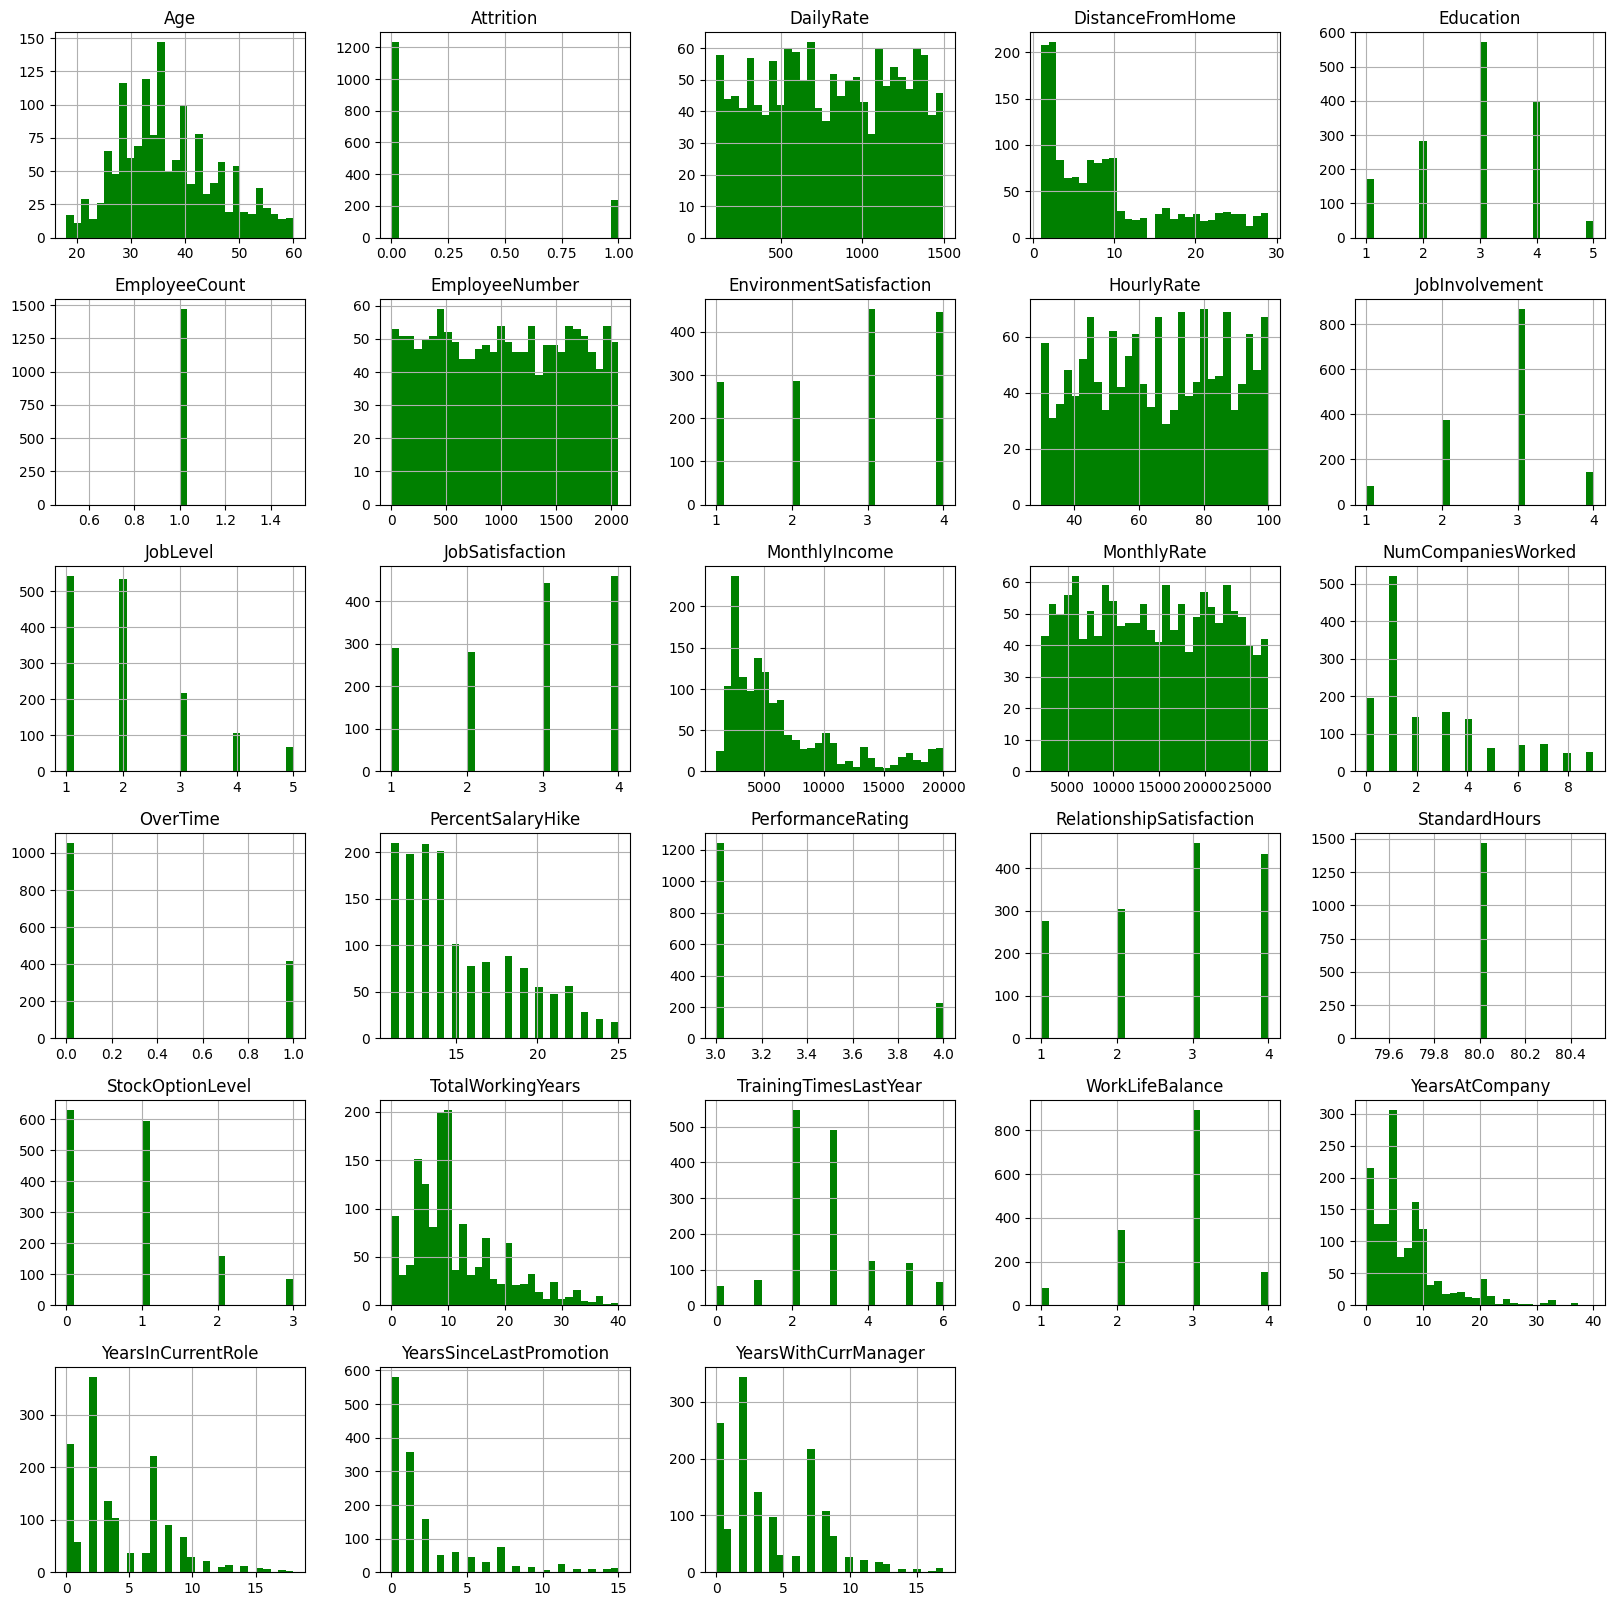

In [ ]:
#histograma de cada variable
employee_df.hist(bins = 30, figsize=(20,20), color = 'g')
plt.show()

Visualmente podemos extraer mucha informacion para ver el comportamiento de las variables. El objetivo es no escribir tanto, pues son bastantes variables. Y este proyecto sólo lo estoy realizando yo entonces con un equipo esto seguía bastante eficiente.

In [ ]:
#notamos que todos son mayores a 18, por lo tanto over18 no aporta informacion de valor
employee_df['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

In [4]:
# Tiene sentido que nos deshagamos de 'EmployeeCount' y 'Standardhours' ya que estos campos no cambian de un empleado a otro
# Tiene sentido deshacerse de 'EmployeeCount' , 'StandardHours' y 'Over18' ya que son campos que no cambian de un empleado a otro
# Eliminemos también 'EmployeeNumber'
#Estas eliminaciones las hacemos tras observar la dispersion de los datos en los histogramas, ya sea porque son constantes o uniformes o dferentes razones que decidimos nosotros

#employee_df = employee_df.drop(['Over18', 'EmployeeCount', 'StandardHours', 'EmployeeNumber'], axis=1)
employee_df.drop(["EmployeeCount", "StandardHours", "Over18", "EmployeeNumber"], axis = 1, inplace = True)#inplace = True lo guarda sin necesidad de almacenarlo en otra variabl
#observar muy bien y analizar los histogramas para decidir qué columnas no aportan informacion relevante


Nos damos a la tarea de eliminar manualmente Las columnas que en principio no tienen un impacto en el modelo pero esto se puede hacer con mayor detalle a partir de las correlaciones o hacerla automáticamente con un tipo de regresión regularizada, por ejemplo la regularización tipo lasso L1.

In [5]:
employee_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
#nuevo df
employee_df.shape

(1470, 31)

In [ ]:
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [8]:
# Veamos cuantos empleados dejan la empresa
marchan_df   = employee_df[employee_df['Attrition'] == 1]#=1 se van
quedan_df = employee_df[employee_df['Attrition'] == 0] #=0 se quedan

In [ ]:
#masrchan vs quedan
print('Los empleados que se marchan son : ', marchan_df.value_counts().sum())
print('Los empleados que se quedan son : ', quedan_df.value_counts().sum())

Los empleados que se marchan son :  237
Los empleados que se quedan son :  1233


In [ ]:
marchan_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
14,28,1,Travel_Rarely,103,Research & Development,24,3,Life Sciences,3,Male,50,2,1,Laboratory Technician,3,Single,2028,12947,5,1,14,3,2,0,6,4,3,4,2,0,3
21,36,1,Travel_Rarely,1218,Sales,9,4,Life Sciences,3,Male,82,2,1,Sales Representative,1,Single,3407,6986,7,0,23,4,2,0,10,4,3,5,3,0,3
24,34,1,Travel_Rarely,699,Research & Development,6,1,Medical,2,Male,83,3,1,Research Scientist,1,Single,2960,17102,2,0,11,3,3,0,8,2,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,1,Travel_Frequently,638,Sales,9,3,Marketing,4,Male,33,3,1,Sales Representative,1,Married,1790,26956,1,0,19,3,1,1,1,3,2,1,0,1,0
1442,29,1,Travel_Rarely,1092,Research & Development,1,4,Medical,1,Male,36,3,1,Research Scientist,4,Married,4787,26124,9,1,14,3,2,3,4,3,4,2,2,2,2
1444,56,1,Travel_Rarely,310,Research & Development,7,2,Technical Degree,4,Male,72,3,1,Laboratory Technician,3,Married,2339,3666,8,0,11,3,4,1,14,4,1,10,9,9,8
1452,50,1,Travel_Frequently,878,Sales,1,4,Life Sciences,2,Male,94,3,2,Sales Executive,3,Divorced,6728,14255,7,0,12,3,4,2,12,3,3,6,3,0,1


In [ ]:
quedan_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,0,13,3,3,0,8,2,2,7,7,3,6
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,1,20,4,1,3,12,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


Nos interesa estudiar la data de los que se van en comparacion con los que se quedan, para encontrar patrones y diferencias

In [ ]:
#Podemos usar la forma alternativa para que tambien se cuente la unica categoria respectiva
#los que se van
x1=marchan_df['Attrition']
x1=x1.value_counts()
x1

1    237
Name: Attrition, dtype: int64

In [ ]:
#los que se quedan
x2=quedan_df['Attrition']
x2=x2.value_counts()
x2

0    1233
Name: Attrition, dtype: int64

In [ ]:
#Para hacerlo más visual podemos crear un df para compararlos
df_comparation1 = pd.DataFrame({'Empleados que se van': x1, 'Empleados que se quedan': x2})
df_comparation1

,Empleados que se van,Empleados que se quedan
0,NaN,1233.0
1,237.0,NaN


In [ ]:
#Si es de interes saber qué empleado se va y cuáles se queda, por index y despues buscar en una base de datos por index:
x1=marchan_df['Attrition']
x2=quedan_df['Attrition']
df_comparation2 = pd.DataFrame({'Empleados que se van': x1, 'Empleados que se quedan': x2})
df_comparation2

,Empleados que se van,Empleados que se quedan
0,1.0,NaN
1,NaN,0.0
2,1.0,NaN
3,NaN,0.0
4,NaN,0.0
...,...,...
1465,NaN,0.0
1466,NaN,0.0
1467,NaN,0.0
1468,NaN,0.0


Nota: la tabla anterior se puede mejorar, pero se dejará así, pues ésta es funcional aunque redundante

In [ ]:
# una forma alternativa de visualizarlo
print("Total de empleados = ", len(employee_df))

print("Número de empleados que dejan la empresa = ", len(marchan_df))
print("Porcentaje de empleados que dejan la empresa = ", 1.*len(marchan_df)/len(employee_df)*100.0, "%")

print("Número de empleados que permanecen en la empresa = ", len(quedan_df))
print("Porcentaje de empleados que se quedan en la empresa = ", 1.*len(quedan_df)/len(employee_df)*100.0, "%")

Total de empleados =  1470
Número de empleados que dejan la empresa =  237
Porcentaje de empleados que dejan la empresa =  16.122448979591837 %
Número de empleados que permanecen en la empresa =  1233
Porcentaje de empleados que se quedan en la empresa =  83.87755102040816 %


In [ ]:
#descriptiva univariada de los que se fueron
describe_marchan=marchan_df.describe()
describe_marchan

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,0.535865,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,7208.153264,2.678519,0.499768,3.770294,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,14618.000000,1.000000,1.000000,14.000000,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,21081.000000,5.000000,1.000000,17.000000,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [ ]:
#descriptiva univariada de los que se quedaron
describe_quedan=quedan_df.describe()
describe_quedan

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.64558,0.234388,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,4818.208001,7102.260749,2.46009,0.423787,3.639511,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.00000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,7973.000000,1.00000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,14120.000000,2.00000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8834.000000,20364.000000,4.00000,0.000000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26997.000000,9.00000,1.000000,25.000000,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


### Podemos crear un dataframe para comparara las medias y darnos una idea de las diferencias entre los que se quedan y se van de manera fácil y rápida

In [ ]:
#de los que se marchan, extraer la media de cada caractewrsitica
mean_marchan=describe_marchan.iloc[1]
mean_marchan

Age                            33.607595
Attrition                       1.000000
DailyRate                     750.362869
DistanceFromHome               10.632911
Education                       2.839662
EnvironmentSatisfaction         2.464135
HourlyRate                     65.573840
JobInvolvement                  2.518987
JobLevel                        1.637131
JobSatisfaction                 2.468354
MonthlyIncome                4787.092827
MonthlyRate                 14559.308017
NumCompaniesWorked              2.940928
OverTime                        0.535865
PercentSalaryHike              15.097046
PerformanceRating               3.156118
RelationshipSatisfaction        2.599156
StockOptionLevel                0.527426
TotalWorkingYears               8.244726
TrainingTimesLastYear           2.624473
WorkLifeBalance                 2.658228
YearsAtCompany                  5.130802
YearsInCurrentRole              2.902954
YearsSinceLastPromotion         1.945148
YearsWithCurrMan

In [ ]:
#de los que se quedan, extraer la media
mean_quedan=describe_quedan.iloc[1]
mean_quedan

Age                            37.561233
Attrition                       0.000000
DailyRate                     812.504461
DistanceFromHome                8.915653
Education                       2.927007
EnvironmentSatisfaction         2.771290
HourlyRate                     65.952149
JobInvolvement                  2.770479
JobLevel                        2.145985
JobSatisfaction                 2.778589
MonthlyIncome                6832.739659
MonthlyRate                 14265.779400
NumCompaniesWorked              2.645580
OverTime                        0.234388
PercentSalaryHike              15.231144
PerformanceRating               3.153285
RelationshipSatisfaction        2.733982
StockOptionLevel                0.845093
TotalWorkingYears              11.862936
TrainingTimesLastYear           2.832928
WorkLifeBalance                 2.781022
YearsAtCompany                  7.369019
YearsInCurrentRole              4.484185
YearsSinceLastPromotion         2.234388
YearsWithCurrMan

In [ ]:
#creamos un nuevo df de medias
mean_comparation_df = pd.concat([mean_marchan, mean_quedan], axis=1)
#renombrar columnas
mean_comparation_df.columns = ['Media para los empleados que se marchan', 'Media para los empleados que se quedan']
mean_comparation_df

,Media para los empleados que se marchan,Media para los empleados que se quedan
Age,33.607595,37.561233
Attrition,1.000000,0.000000
DailyRate,750.362869,812.504461
DistanceFromHome,10.632911,8.915653
Education,2.839662,2.927007
EnvironmentSatisfaction,2.464135,2.771290
HourlyRate,65.573840,65.952149
JobInvolvement,2.518987,2.770479
JobLevel,1.637131,2.145985
JobSatisfaction,2.468354,2.778589


De esta tabla igualmente se puede extraer informacion comparativa respecto a la media de las muestras: los empleados que se marchan, en promedio, son mas jovenes que los que se quedan, etc.

<ipython-input-38-9b5ad7abcf3e>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations=employee_df.corr()


<Axes: >

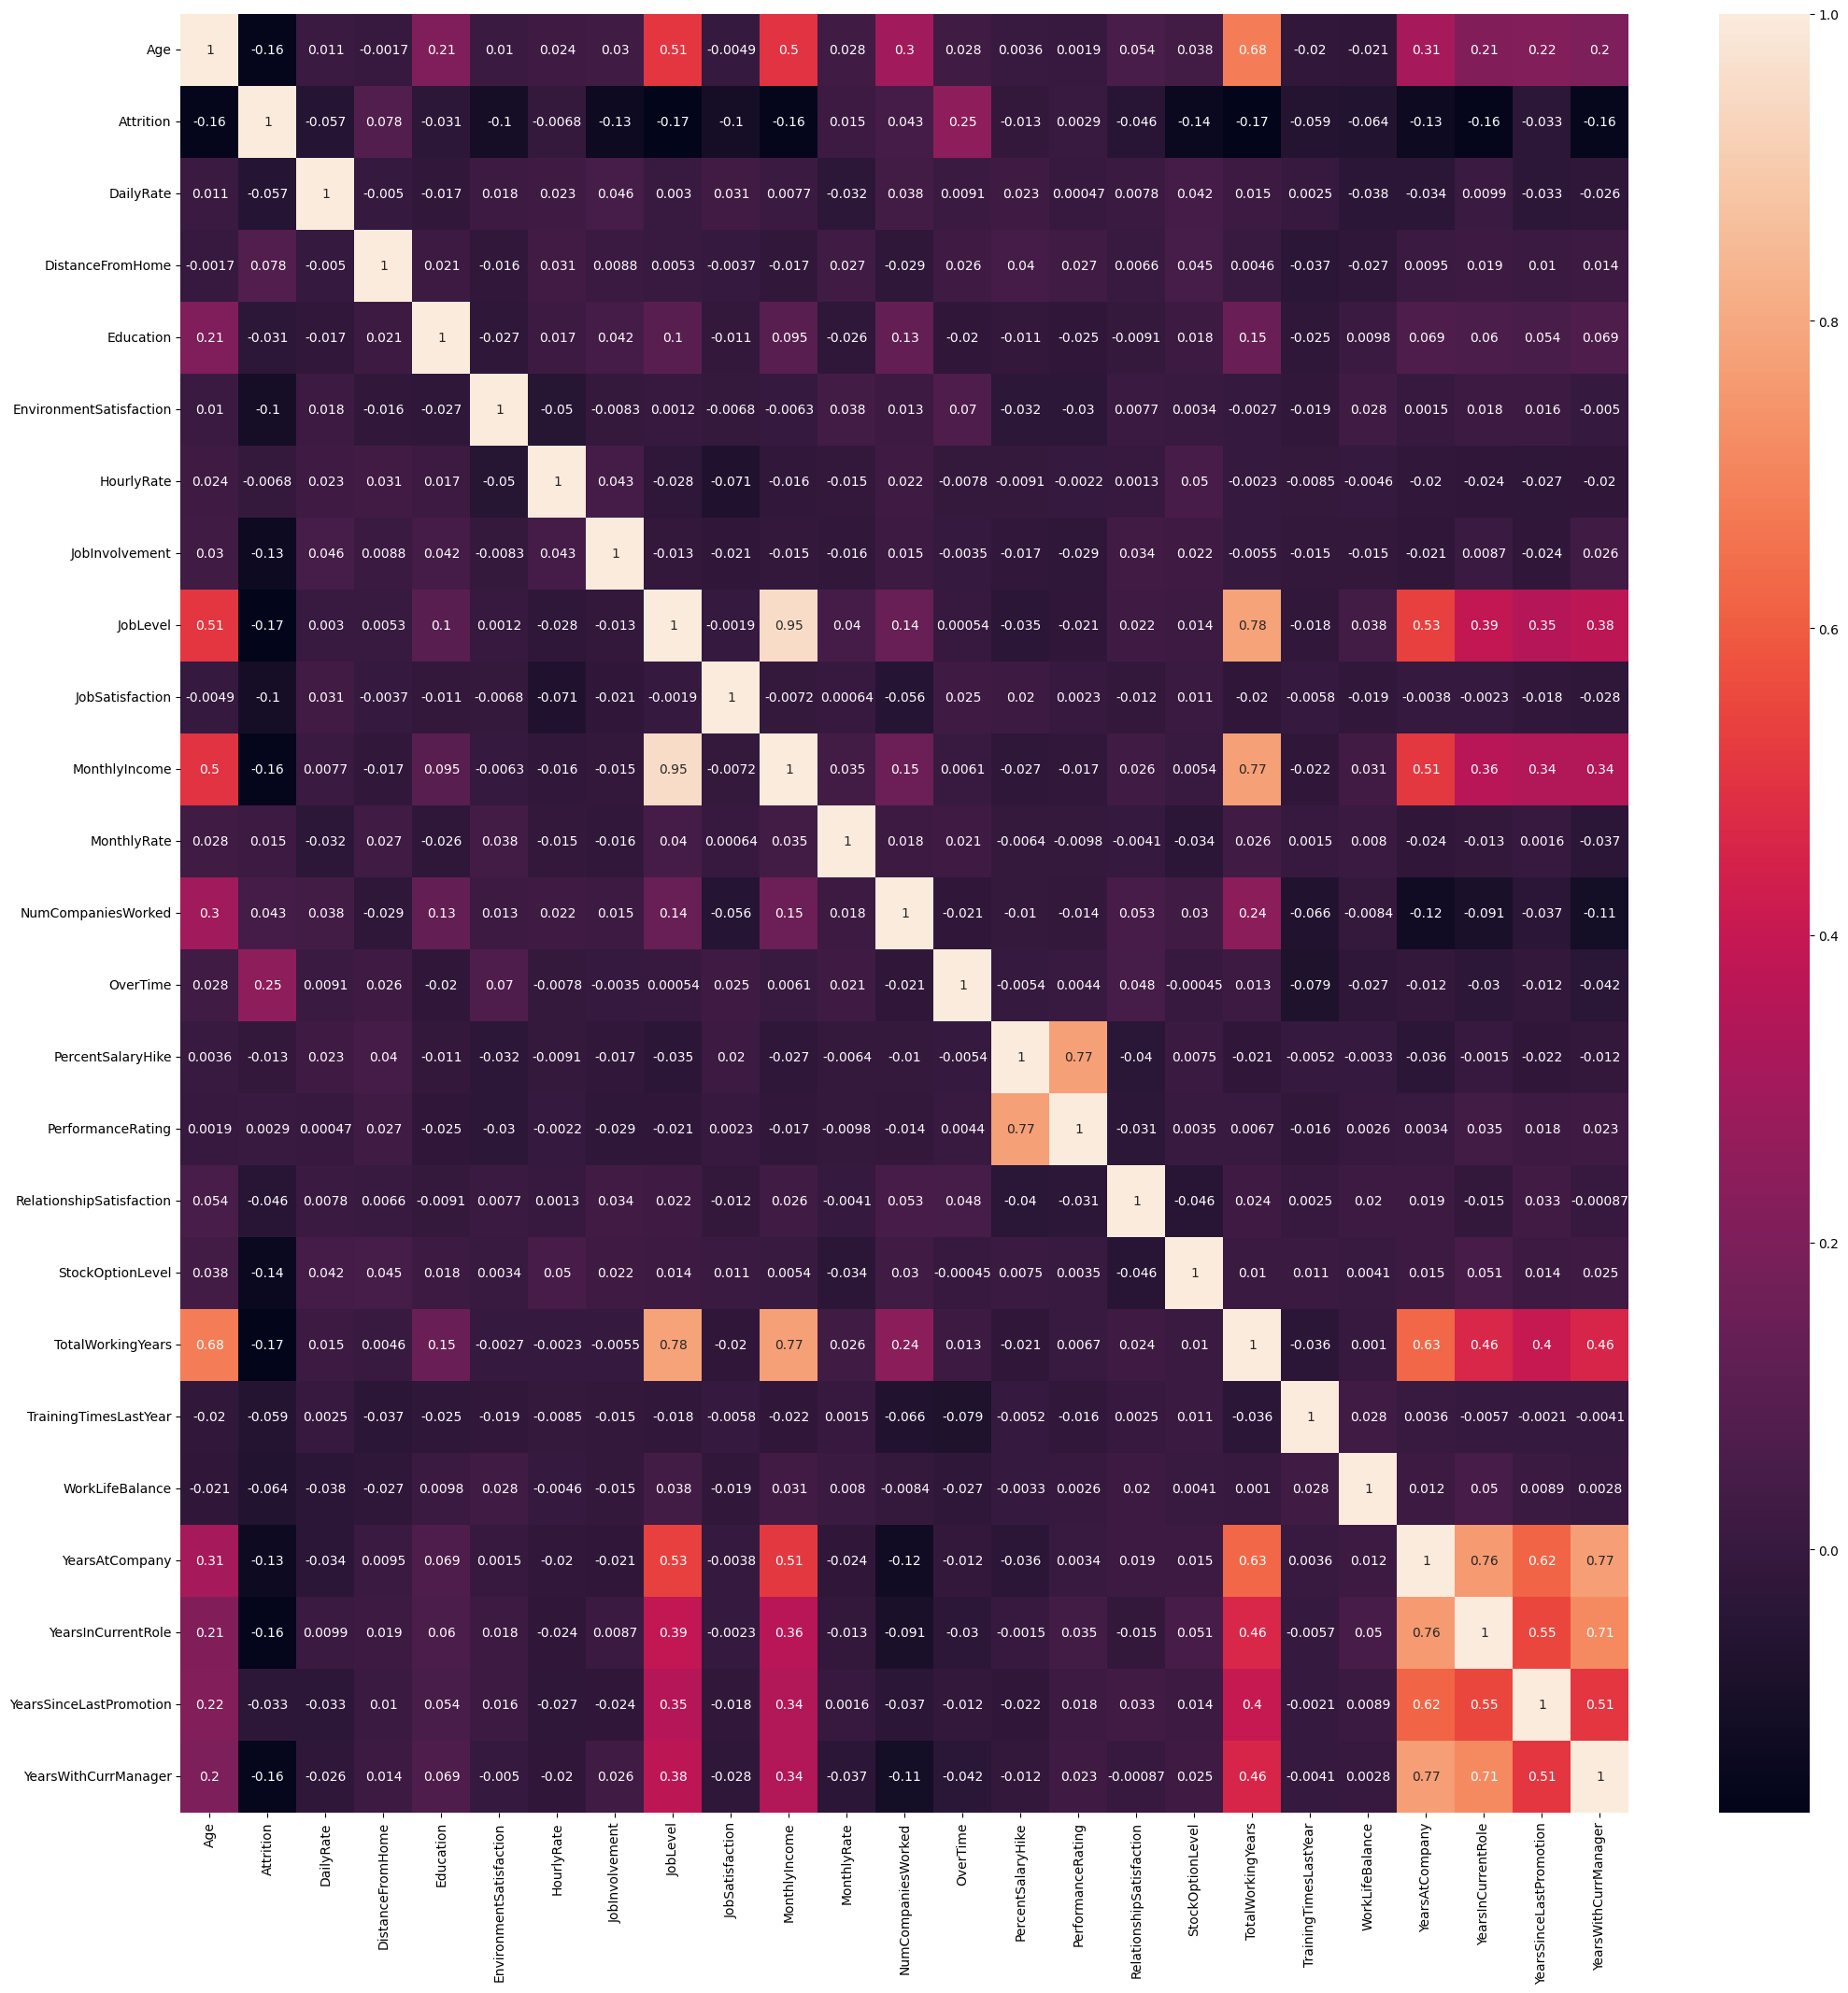

In [ ]:
#CORRELACIONES entre variables
#para el mapa de calor:
correlations=employee_df.corr()
f, ax = plt.subplots(figsize = (25,25))
sns.heatmap(correlations, annot=True)

#NOTAS RAPIDAS
 # Job level está altamente correlacionado con el número total de horas de trabajo
# Monthly income está altamente correlacionado con Job level
# Monthly income está altamente correlacionado con el número total de horas de trabajo
# Age está altamente correlacionado con los ingresos mensuales

Nota: Es importante tener en cuenta que, en algunos casos, una correlación débil o nula entre una variable booleana y una variable continua puede no significar que no exista una relación significativa entre las dos variables. En estos casos, es posible que otras técnicas de análisis, como las pruebas de hipótesis o los modelos de regresión, sean más apropiados para evaluar la relación entre las variables.

Como ejemplo veámos la correlacion entre nuestra variable target (attrition) y el sueldo mensual y notaremos que la correlacion es de -0.16, cosa que no tiene sentido.

### Algunas gráficas: Histogramas comparativos, densidades y boxplot

NOTA:

loc se utiliza para especificar la ubicación de la leyenda dentro de la gráfica.

Por ejemplo, loc='upper right' especifica que la leyenda se colocará en la esquina superior derecha de la gráfica. Otros valores posibles para loc incluyen:

'best': Matplotlib intentará encontrar la mejor ubicación para la leyenda según la gráfica y otros elementos. Este es el valor predeterminado si no se especifica loc.
'upper left', 'lower left', 'center left', 'center right', 'lower right', 'upper center', 'lower center', 'center'

Text(0.5, 1.0, 'Empleados que abandonan o no la compañía según su edad')

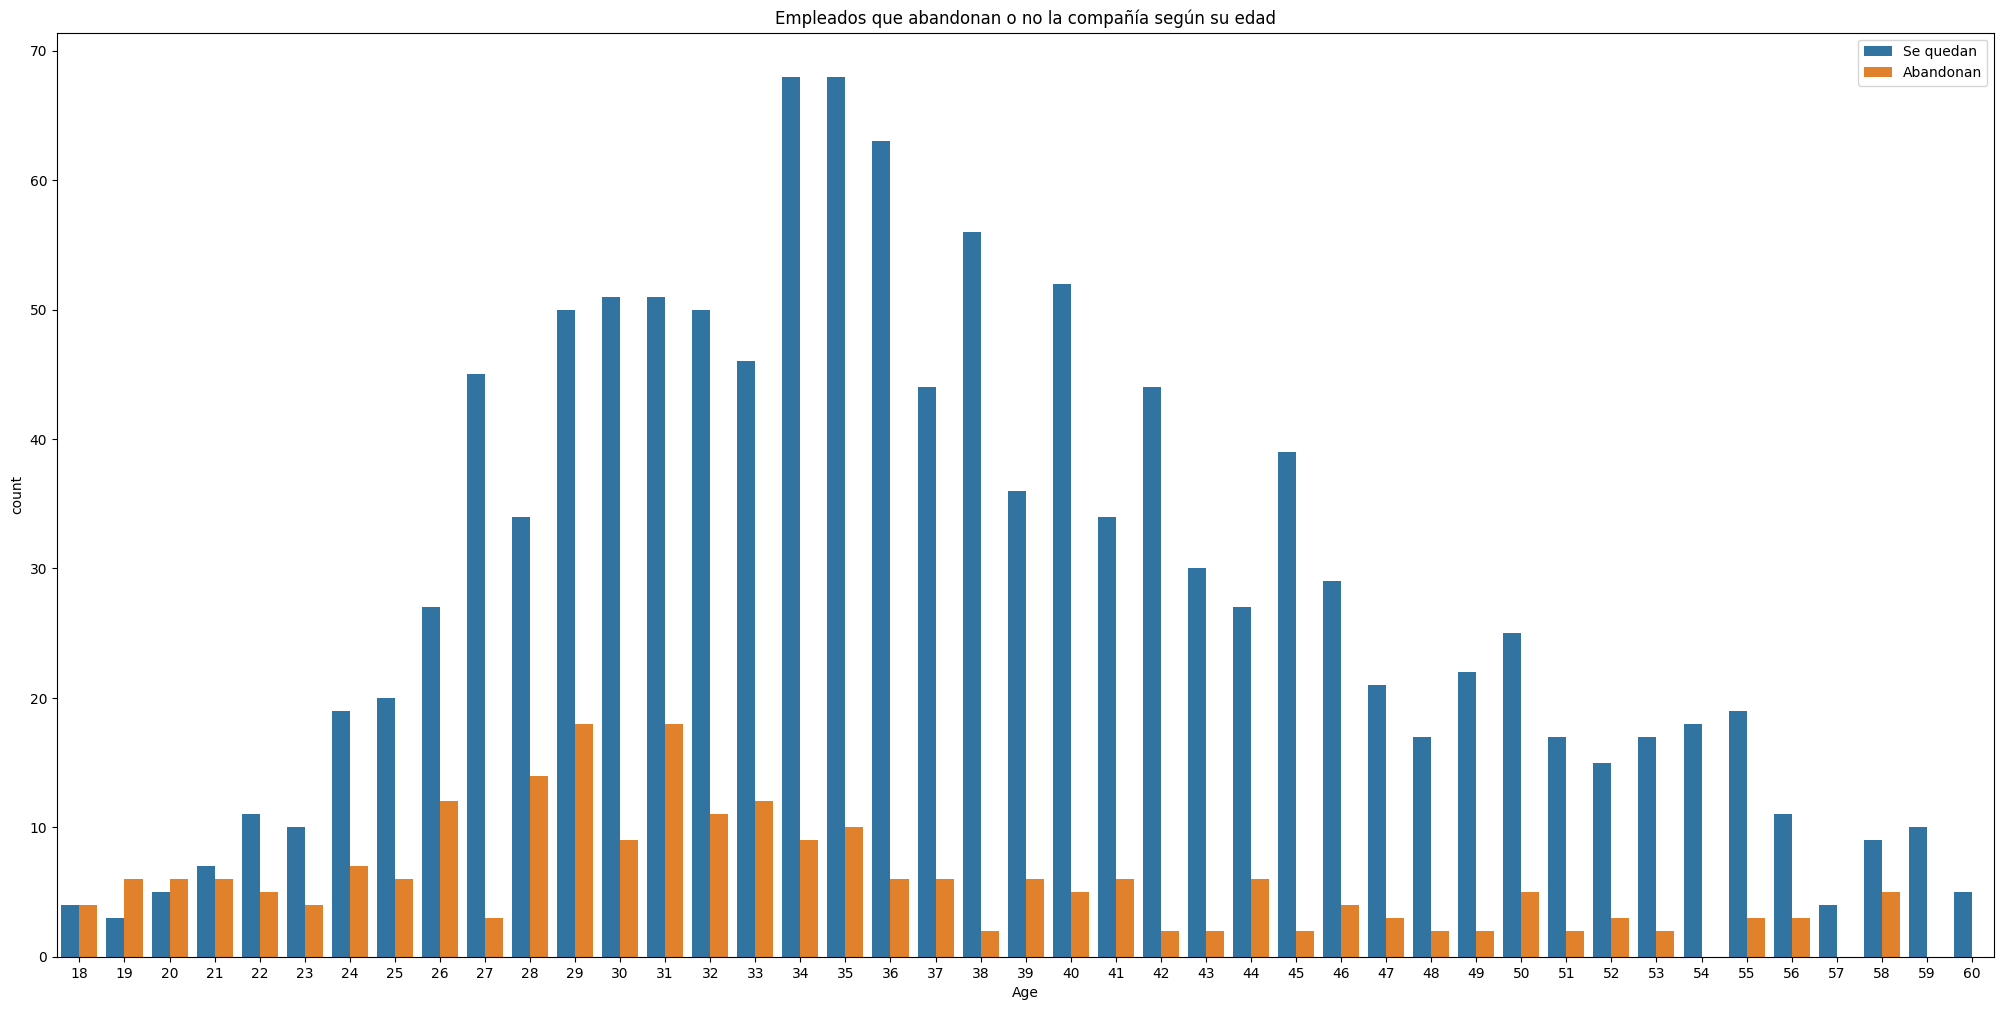

In [ ]:
# contadores de comparacion
plt.figure(figsize=[25,12])
sns.countplot(x = 'Age', hue = 'Attrition', data = employee_df)
plt.legend(title='', loc='upper right', labels=['Se quedan', 'Abandonan'])
plt.title("Empleados que abandonan o no la compañía según su edad")

Por ejemplo, del conjunto de empleados con 18 años, la mitad se queda y la mitad se marcha

Esto mismo se puede hacer para cualquier otro par de variables

In [ ]:
employee_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

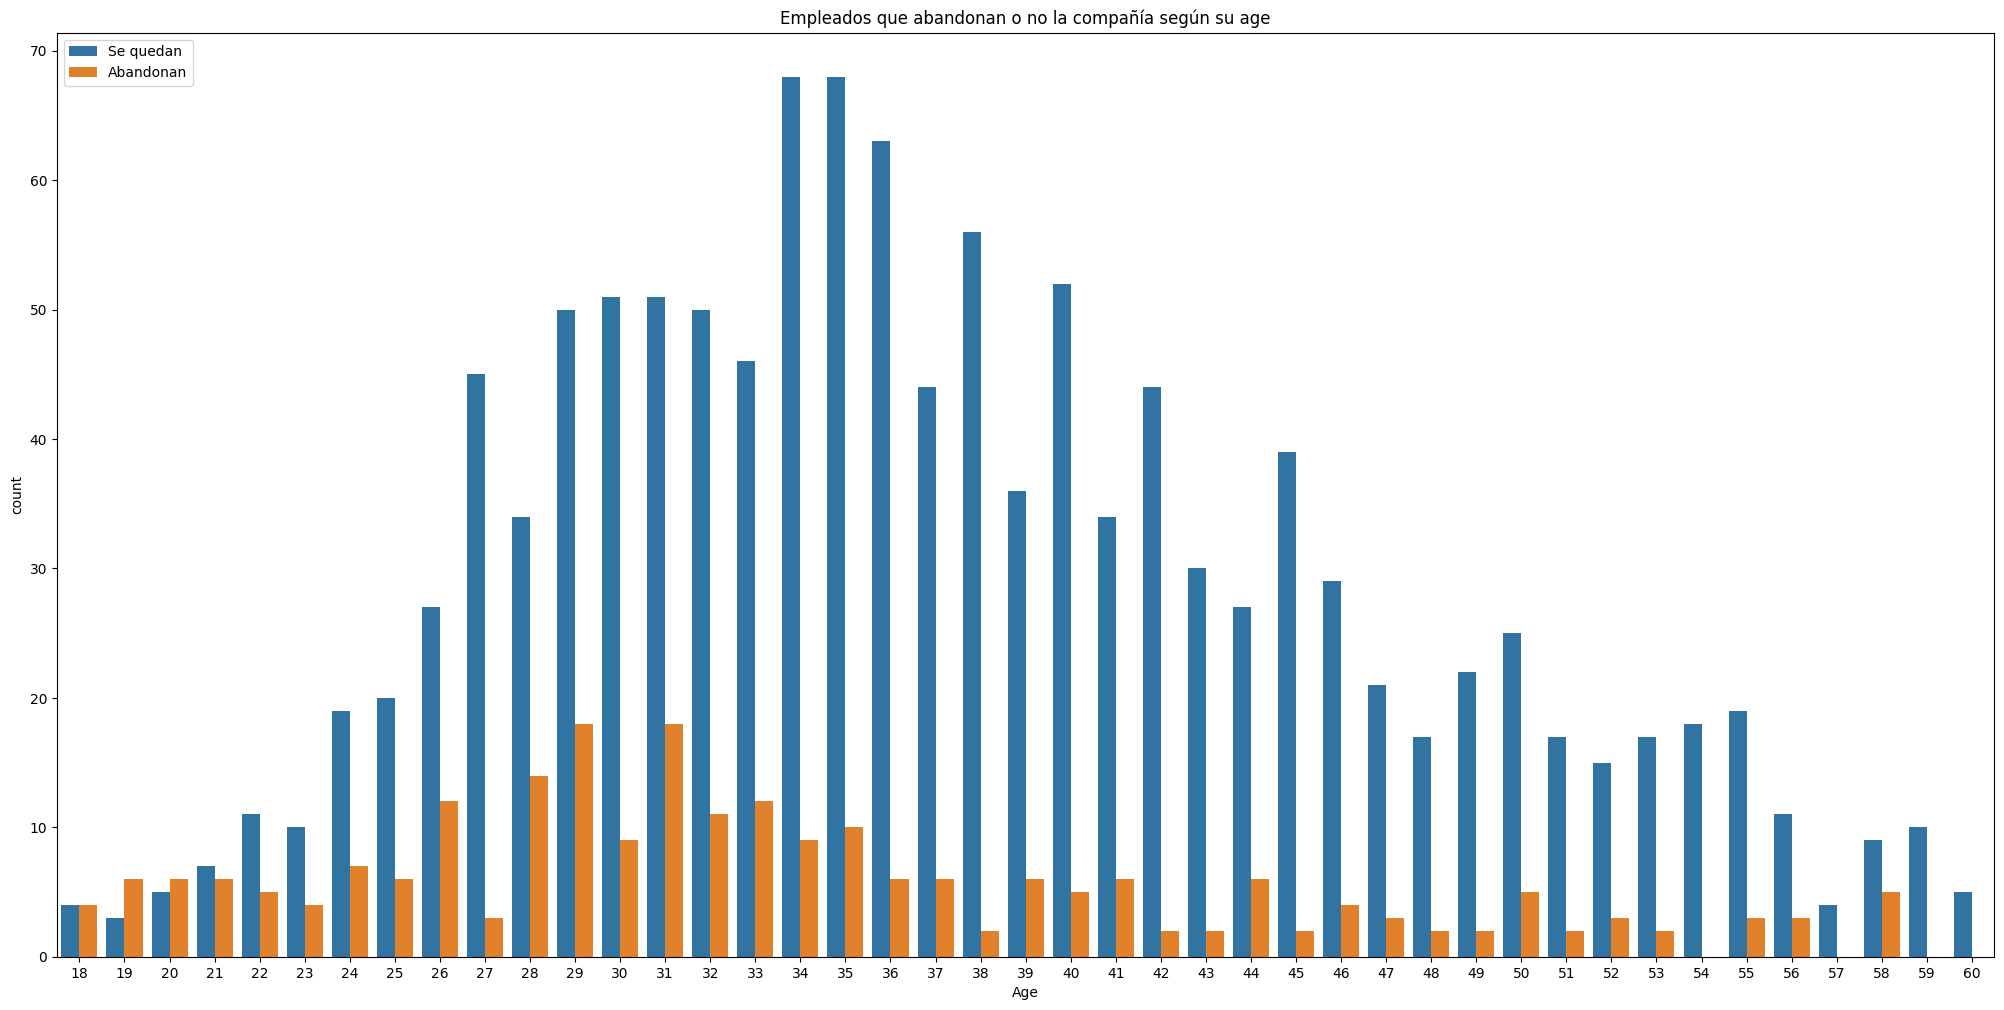

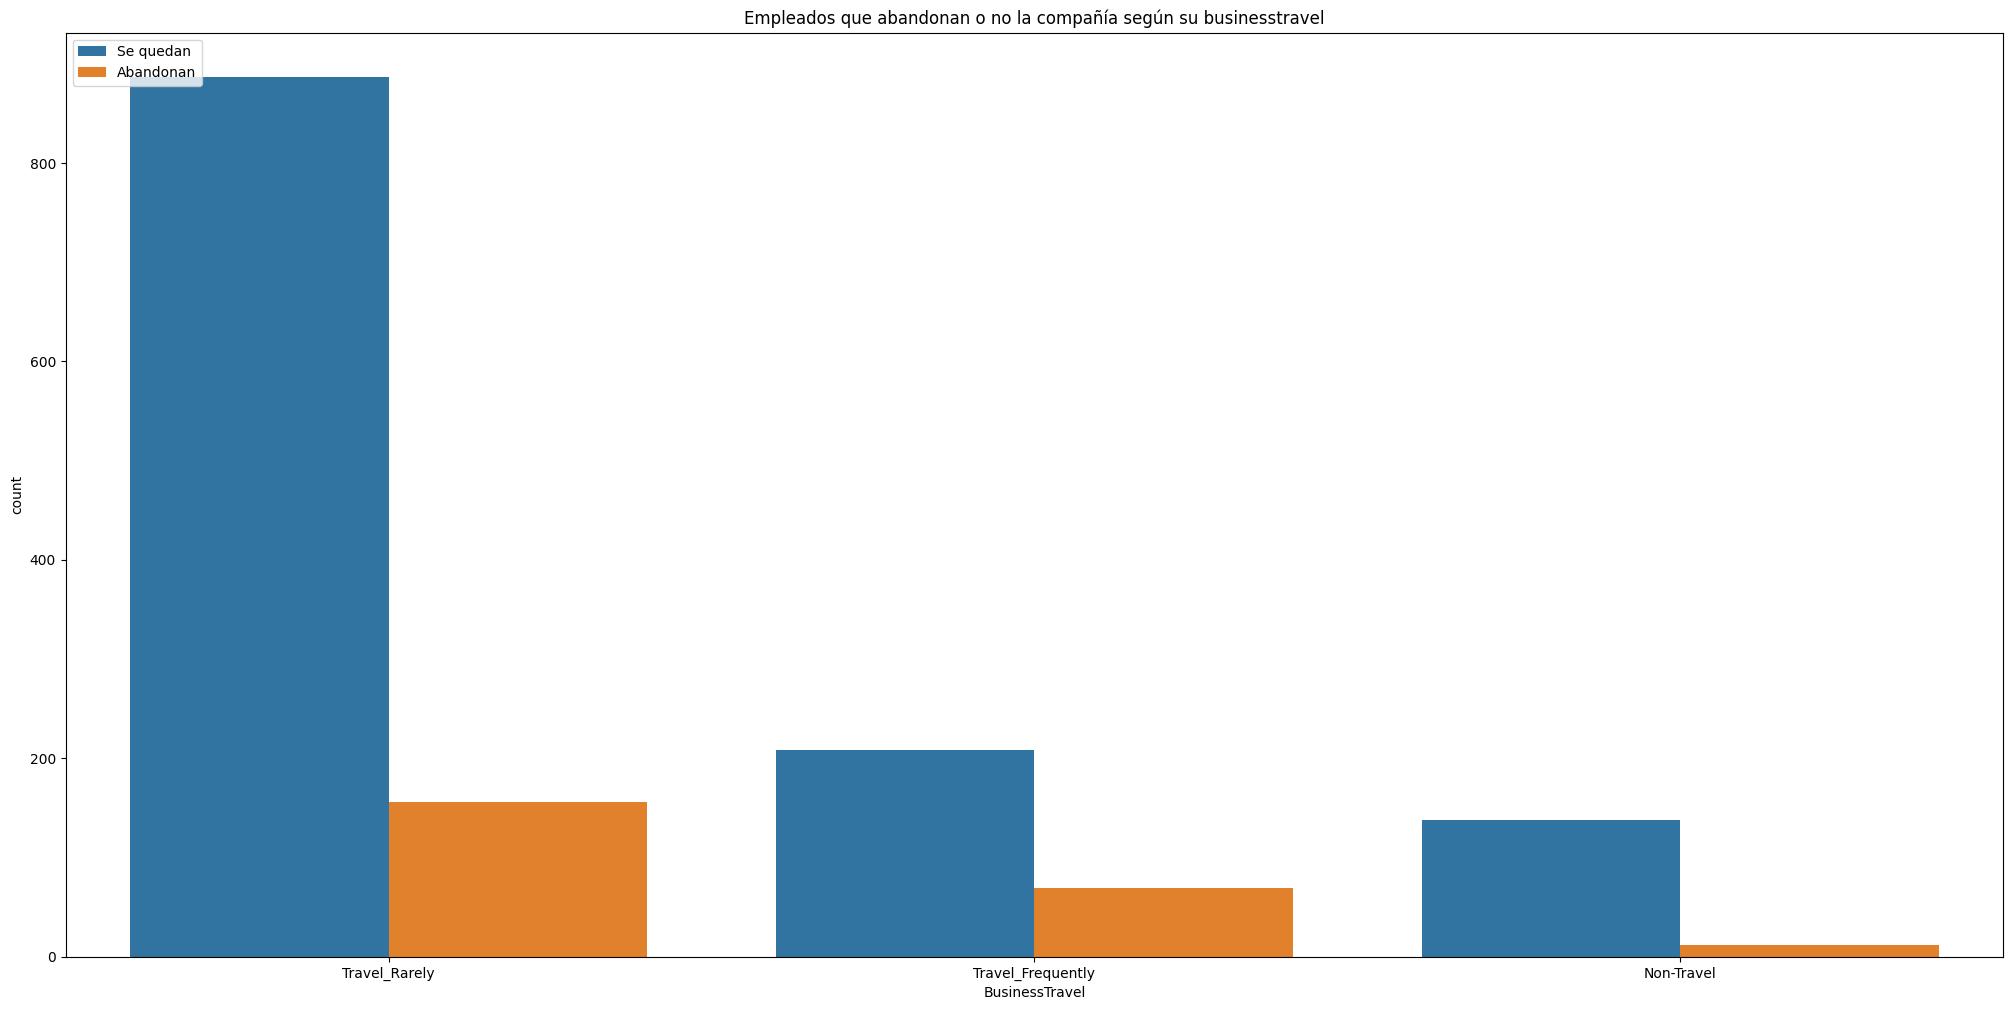

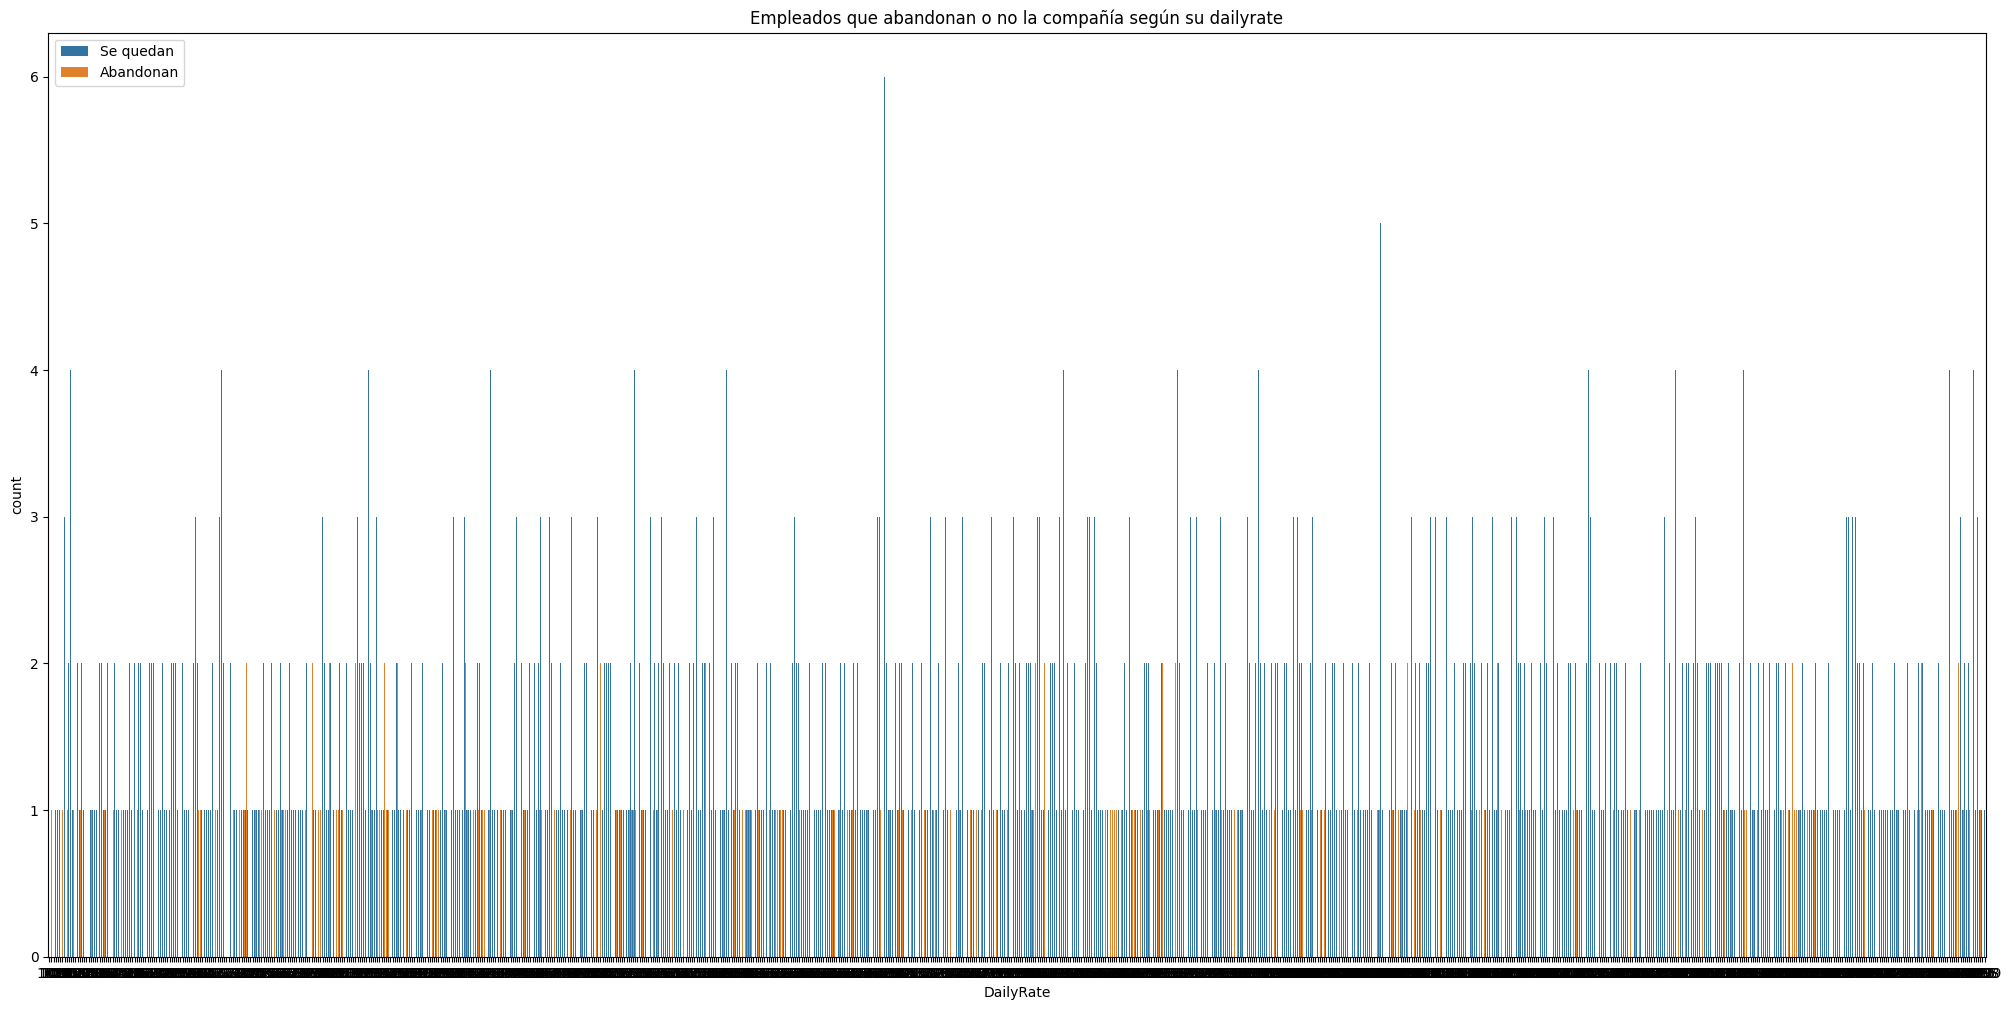

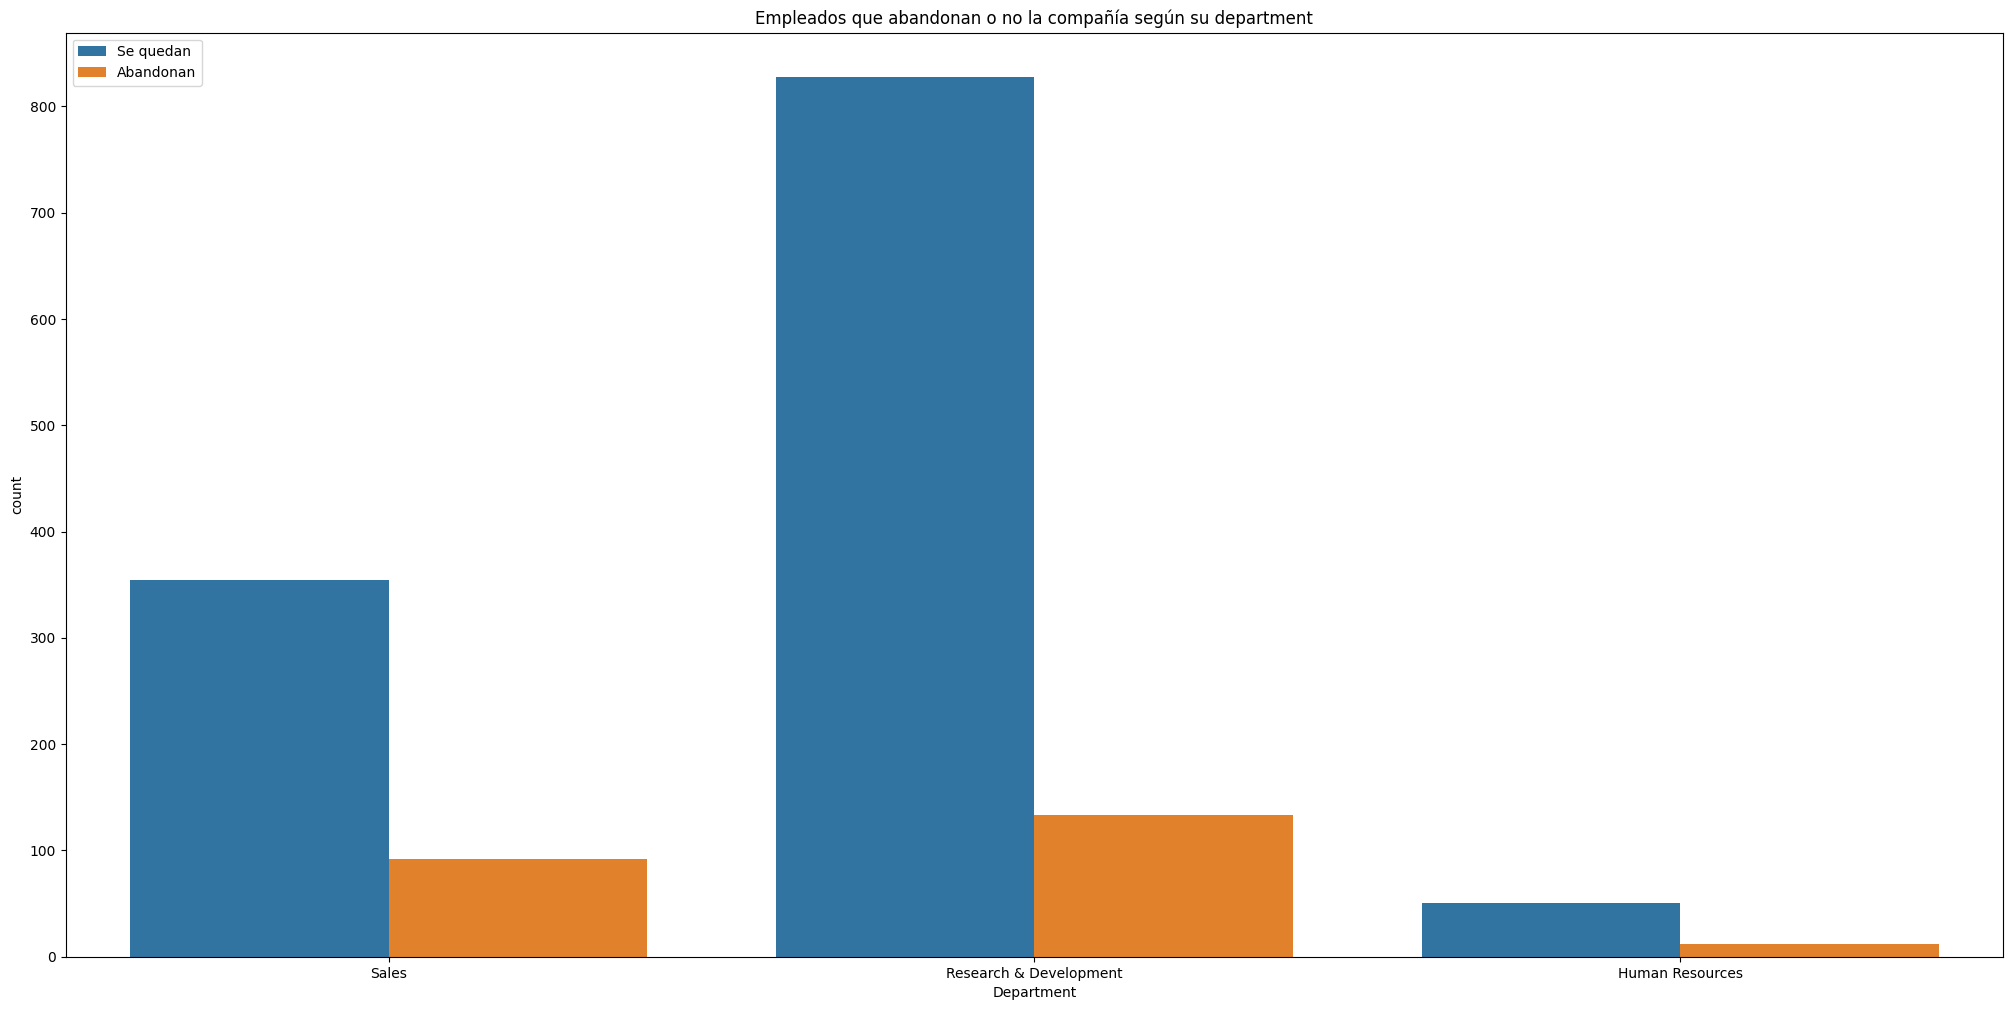

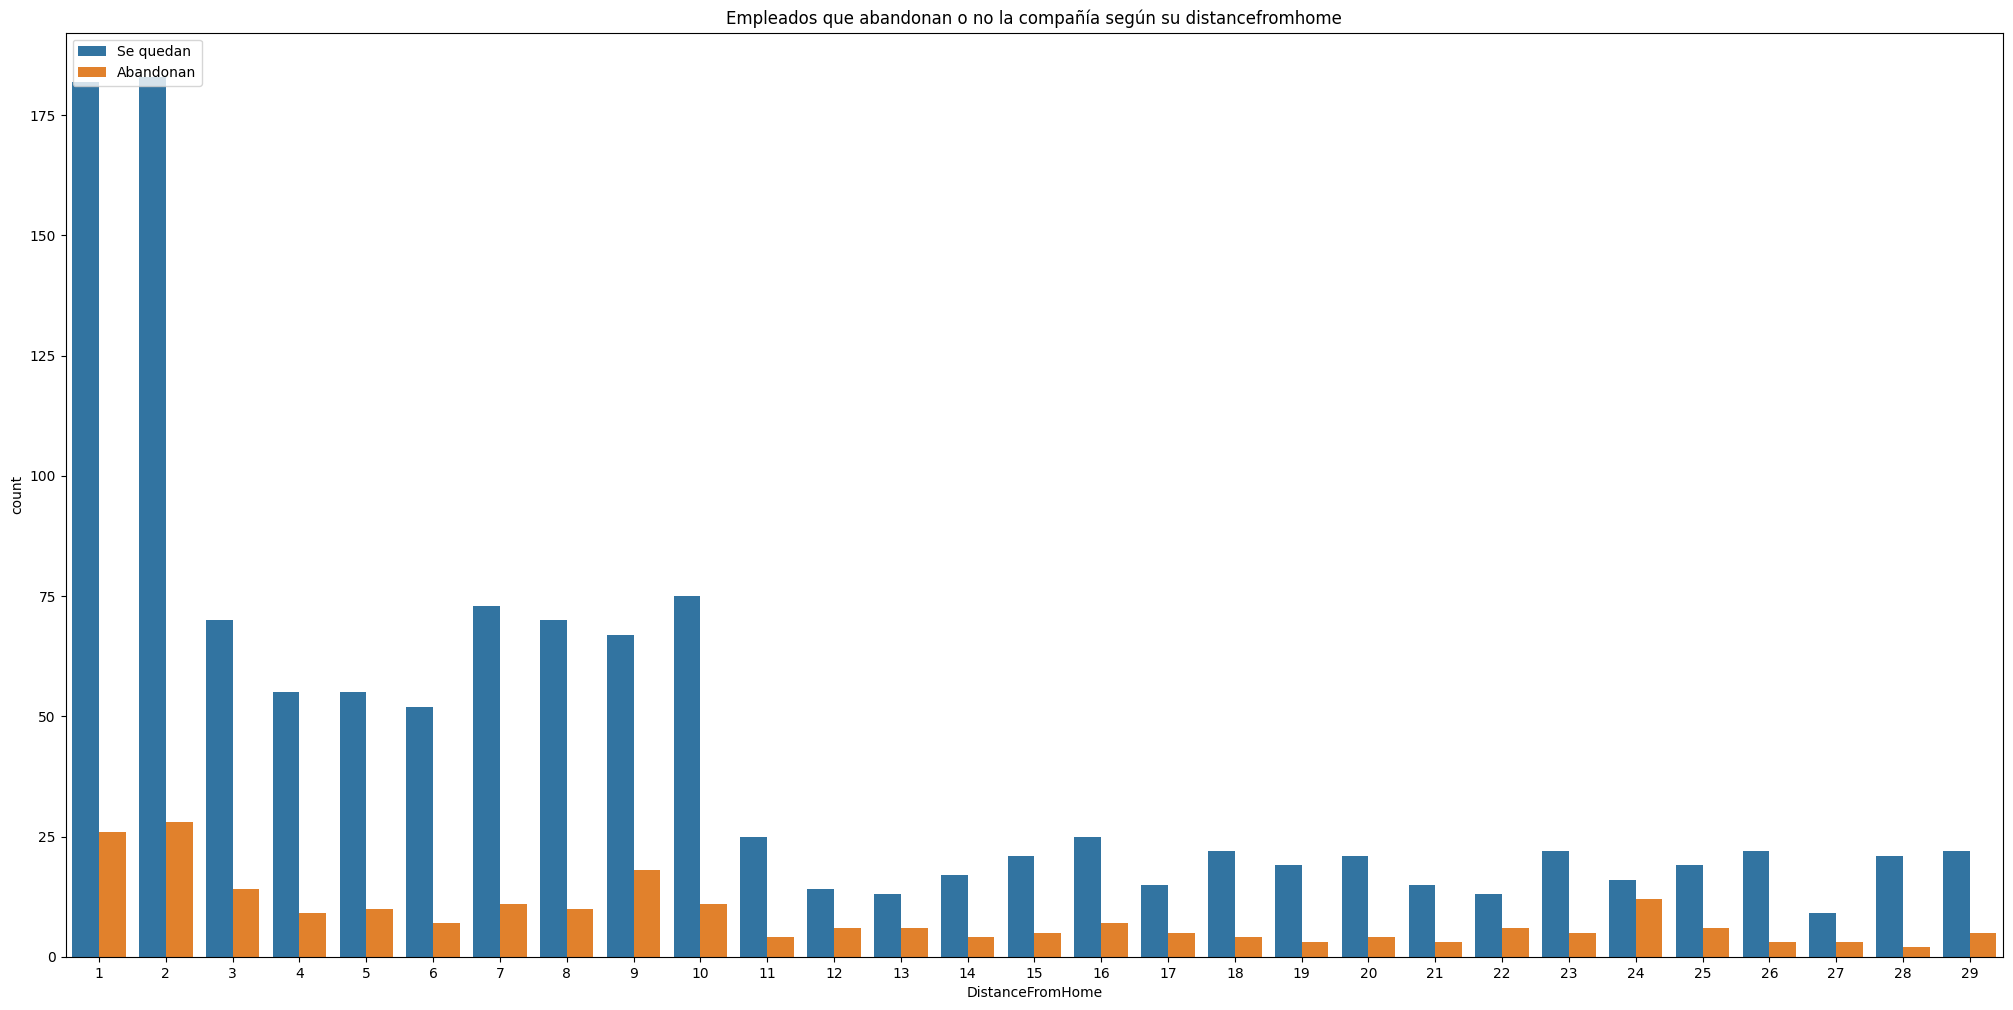

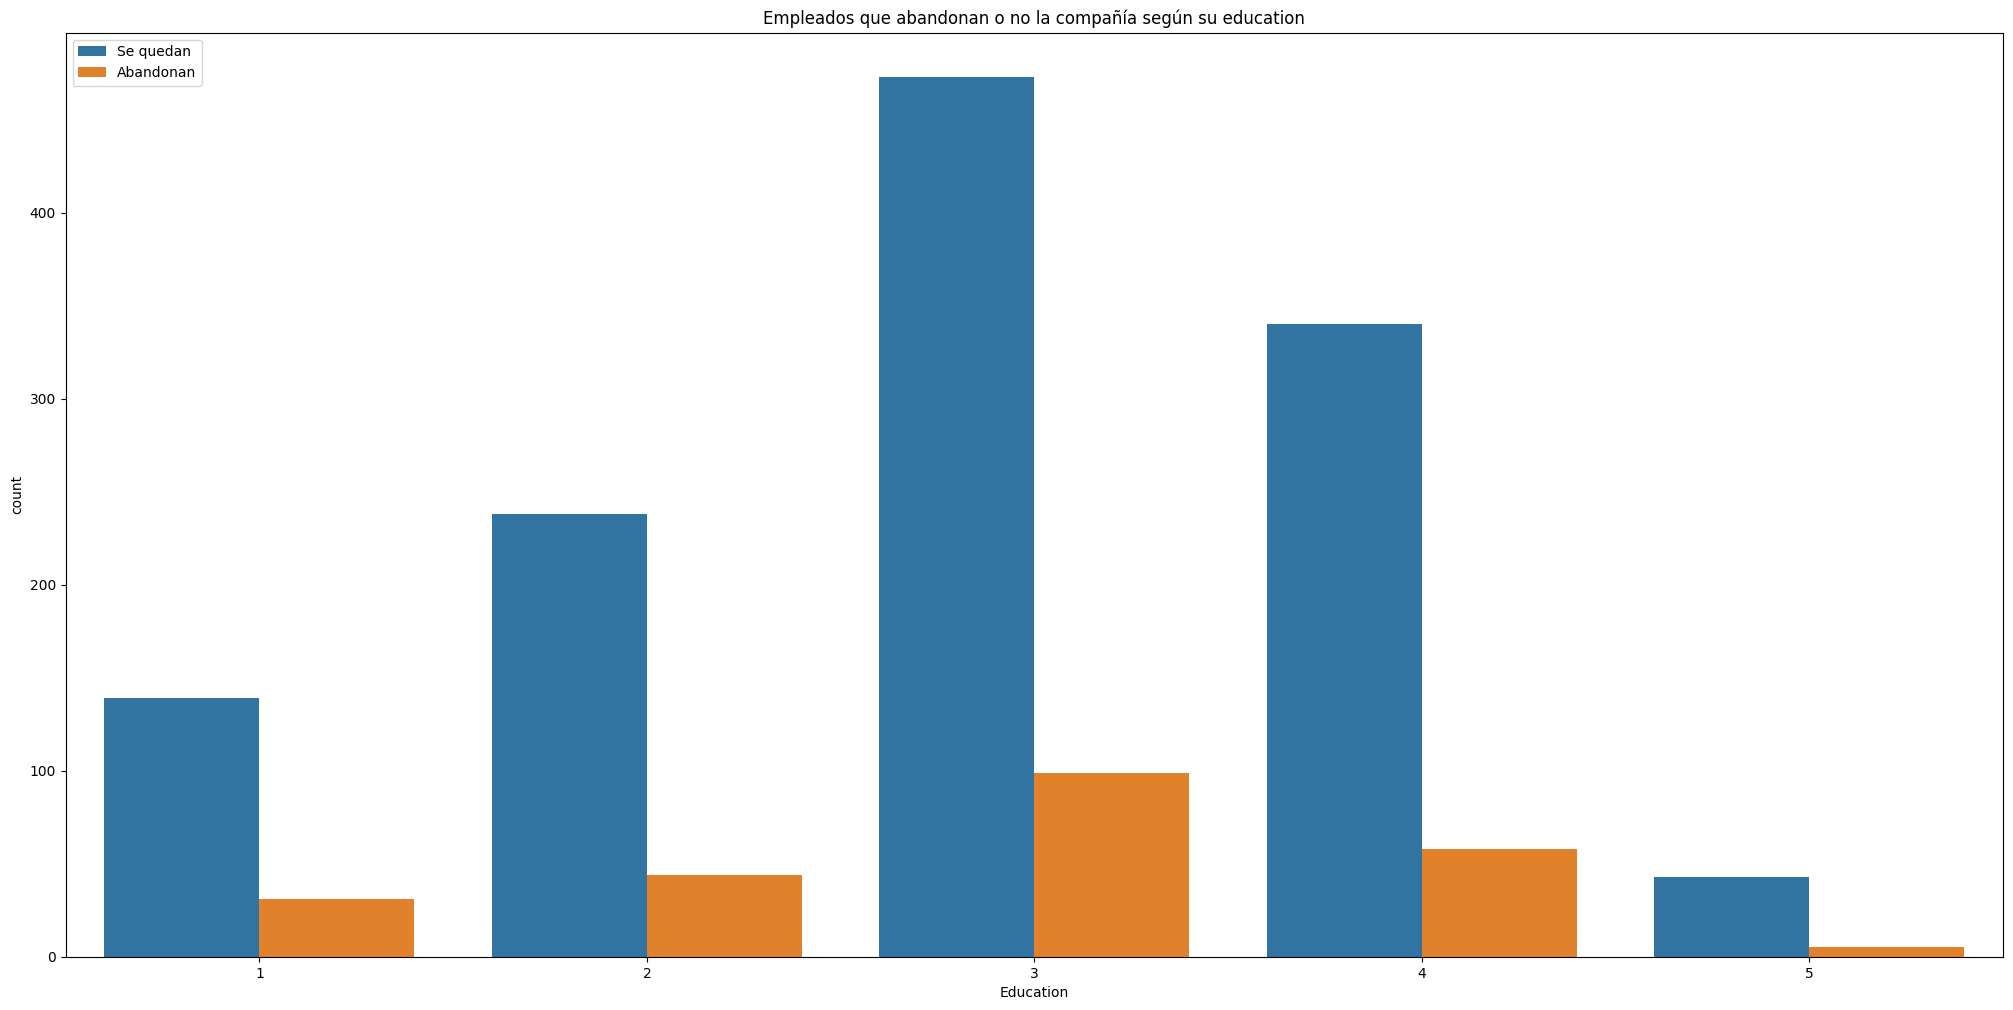

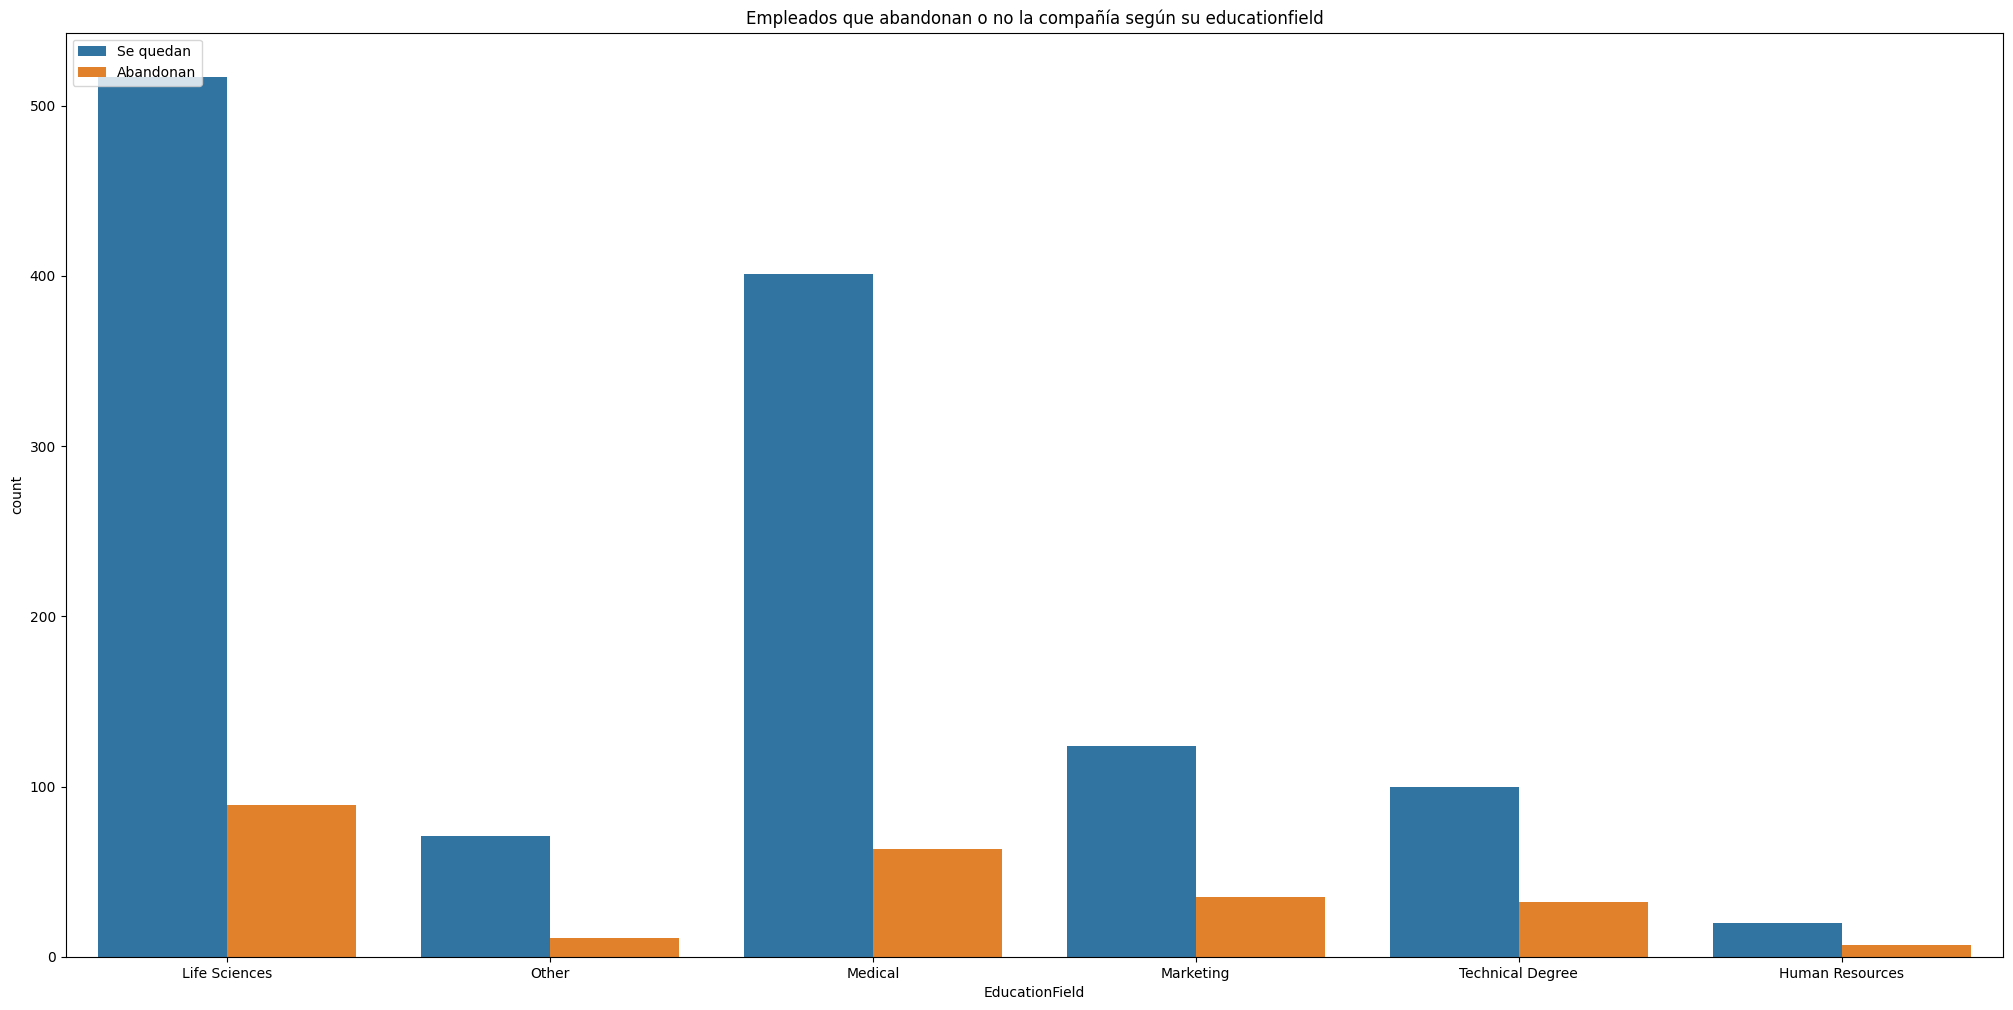

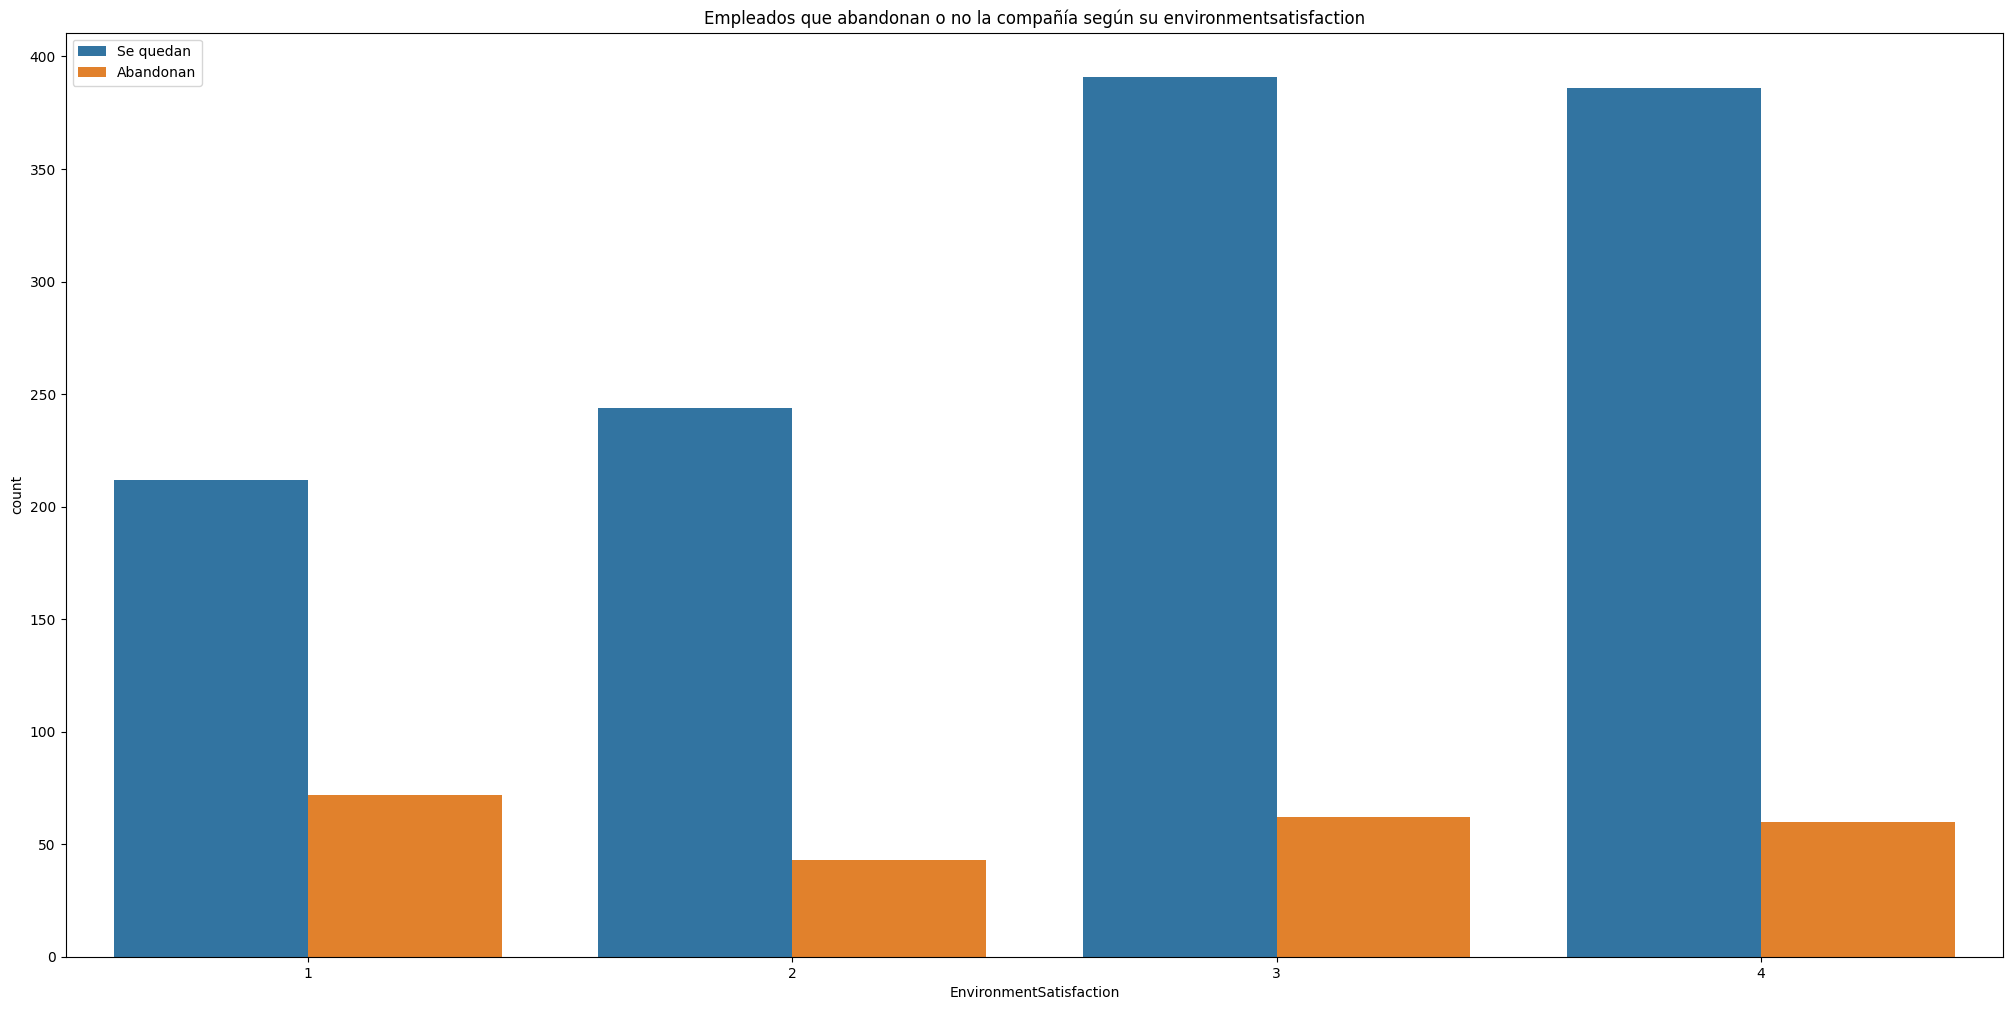

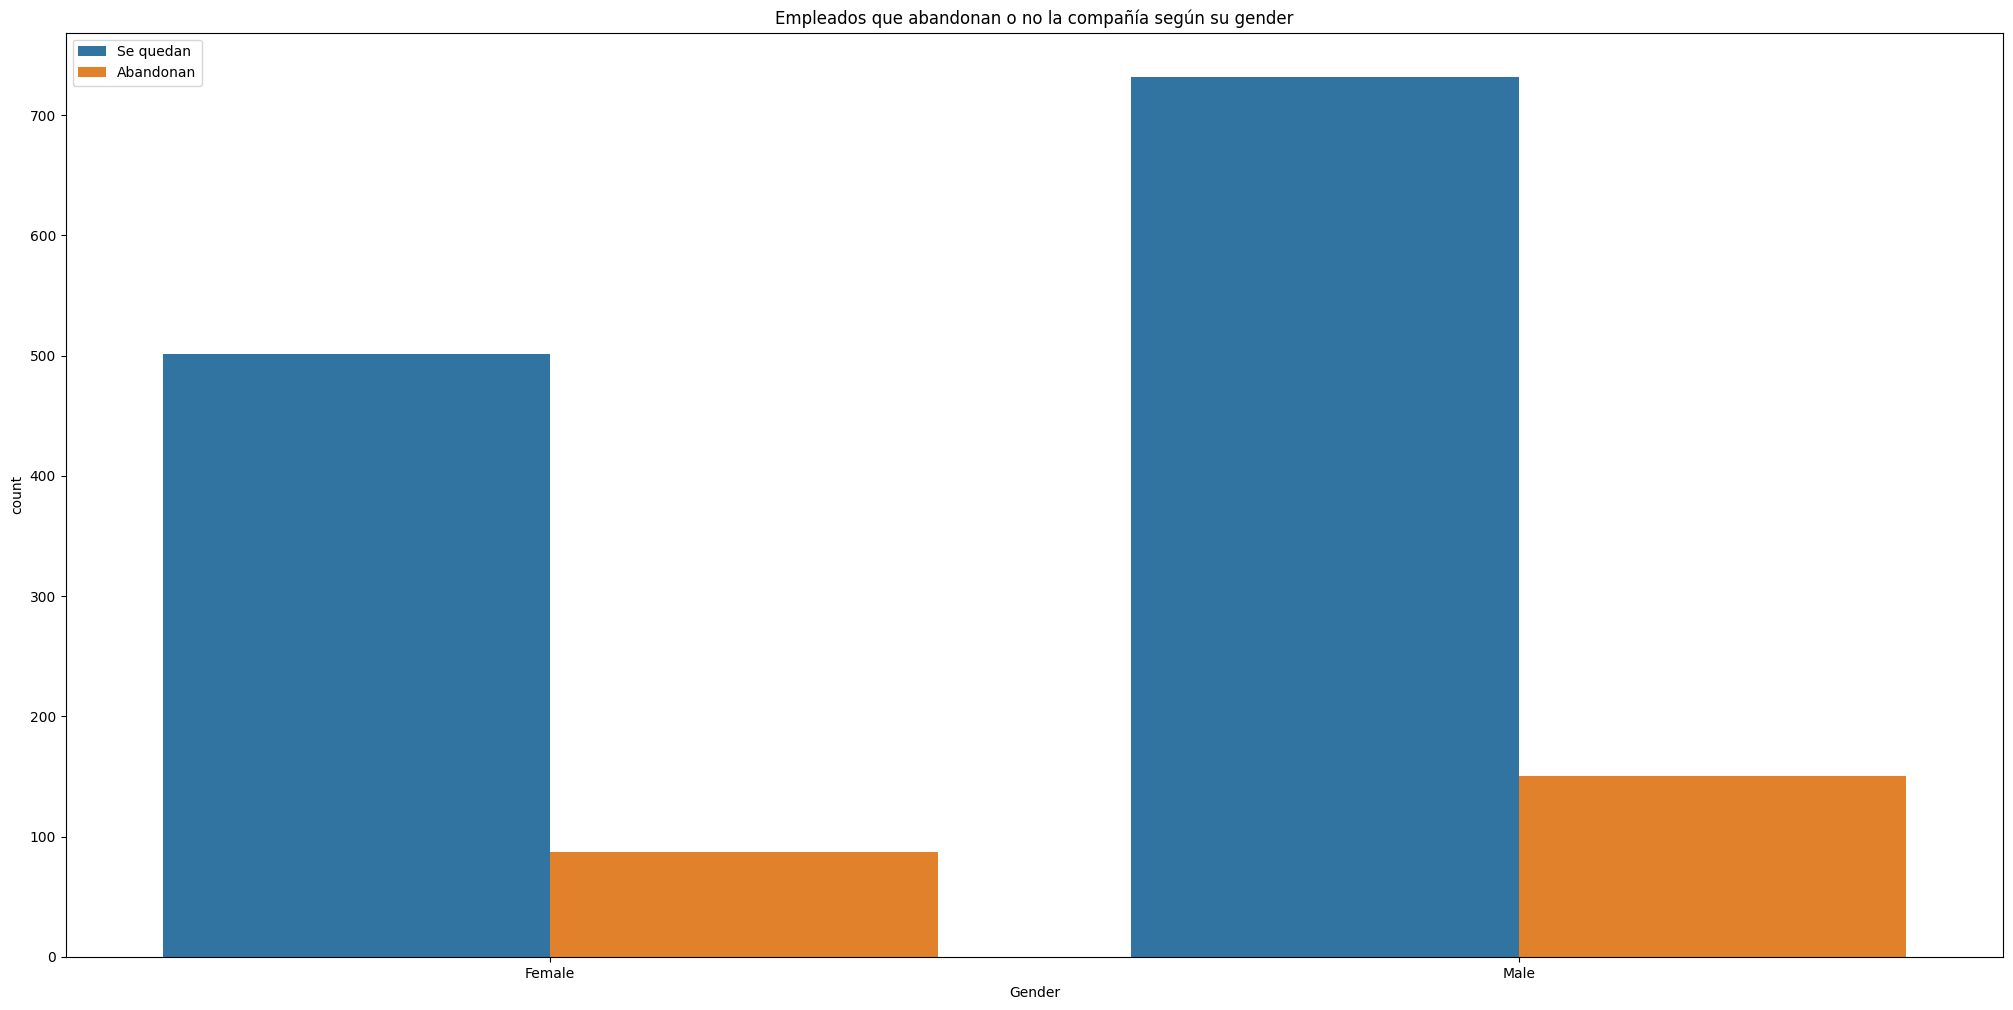

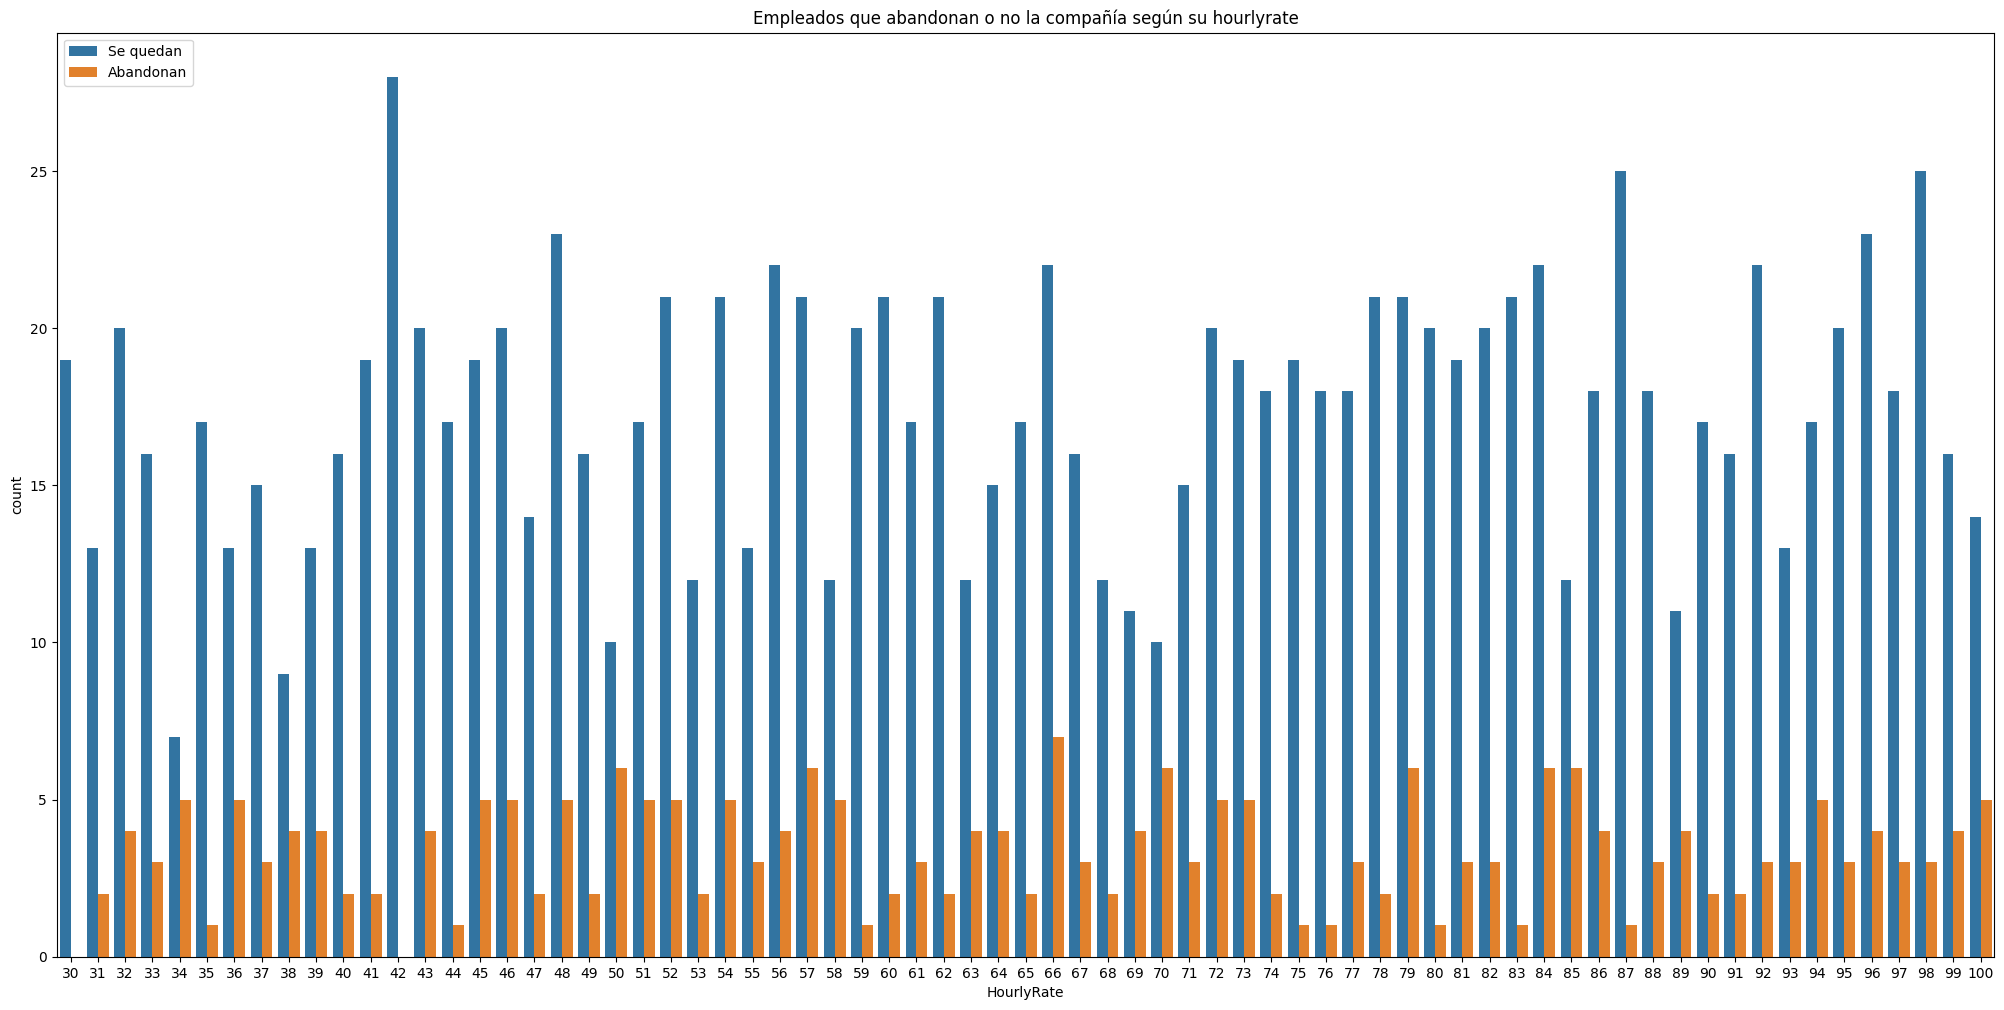

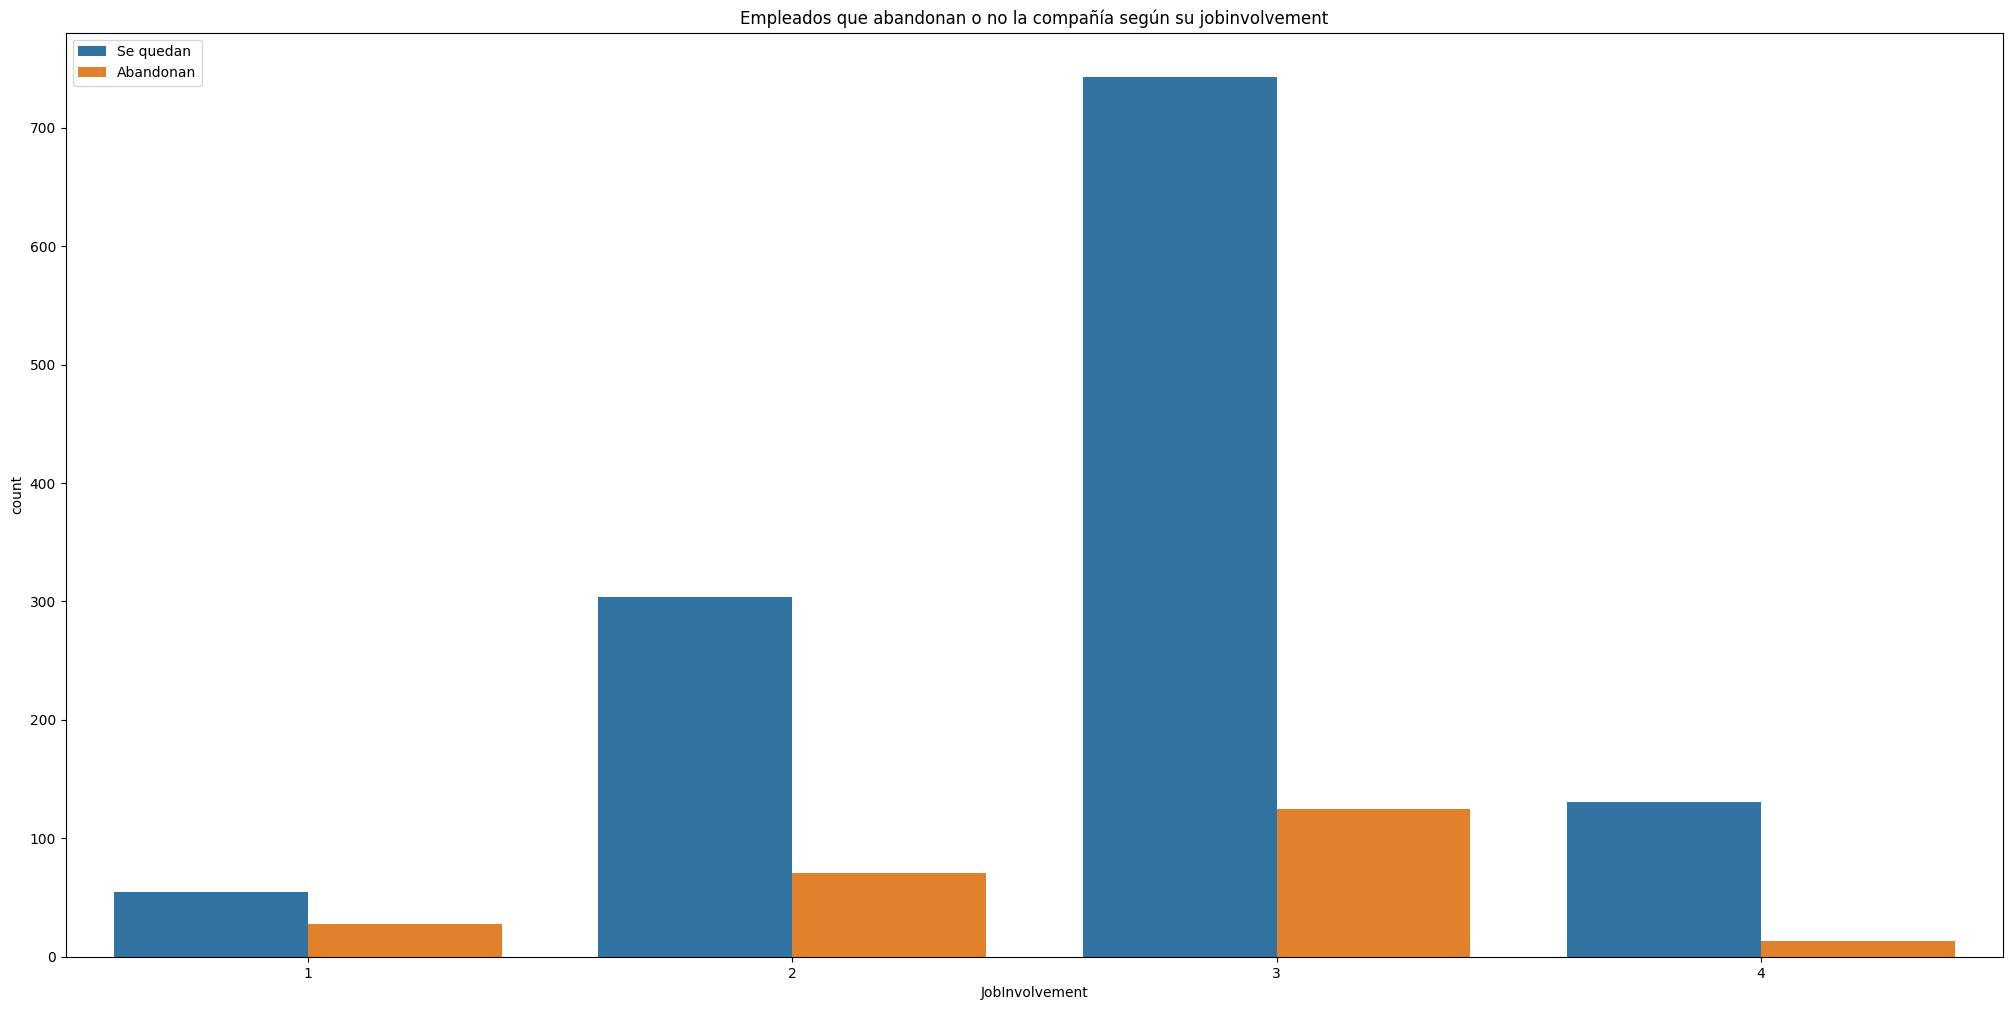

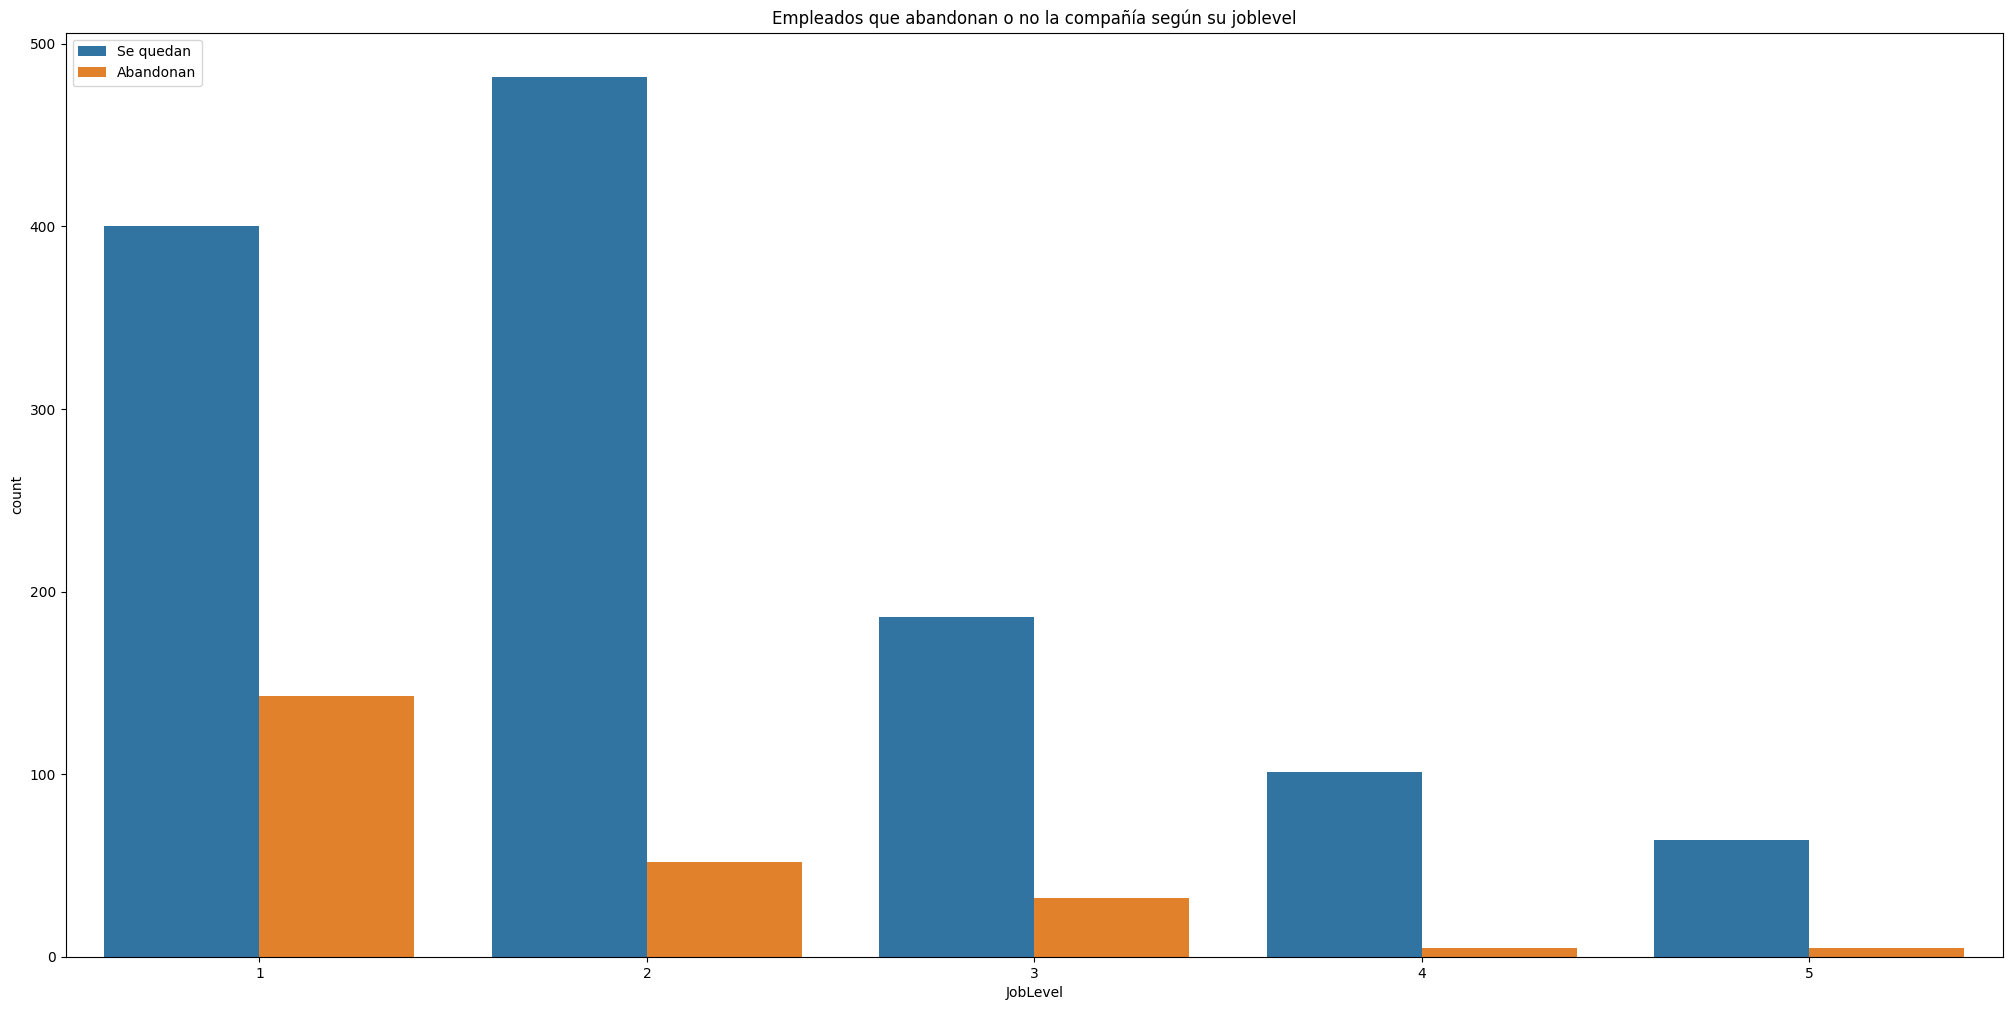

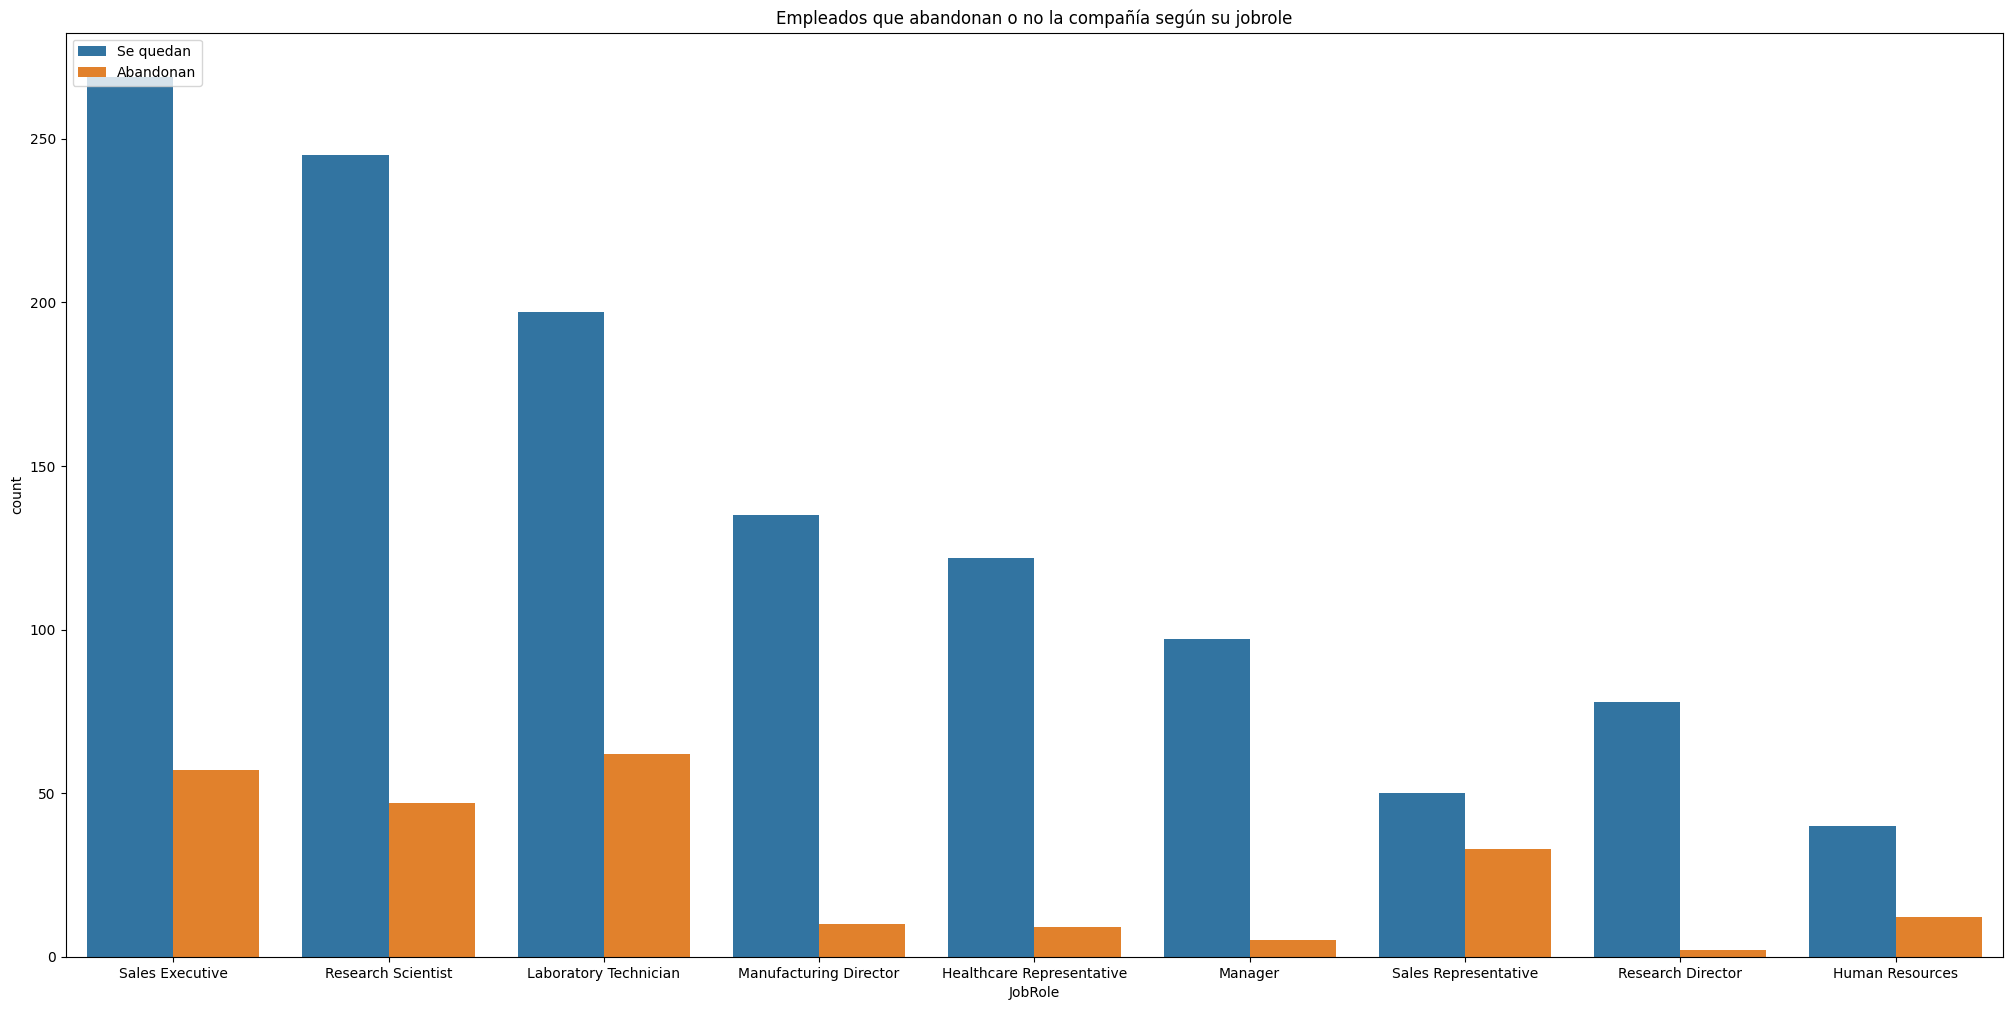

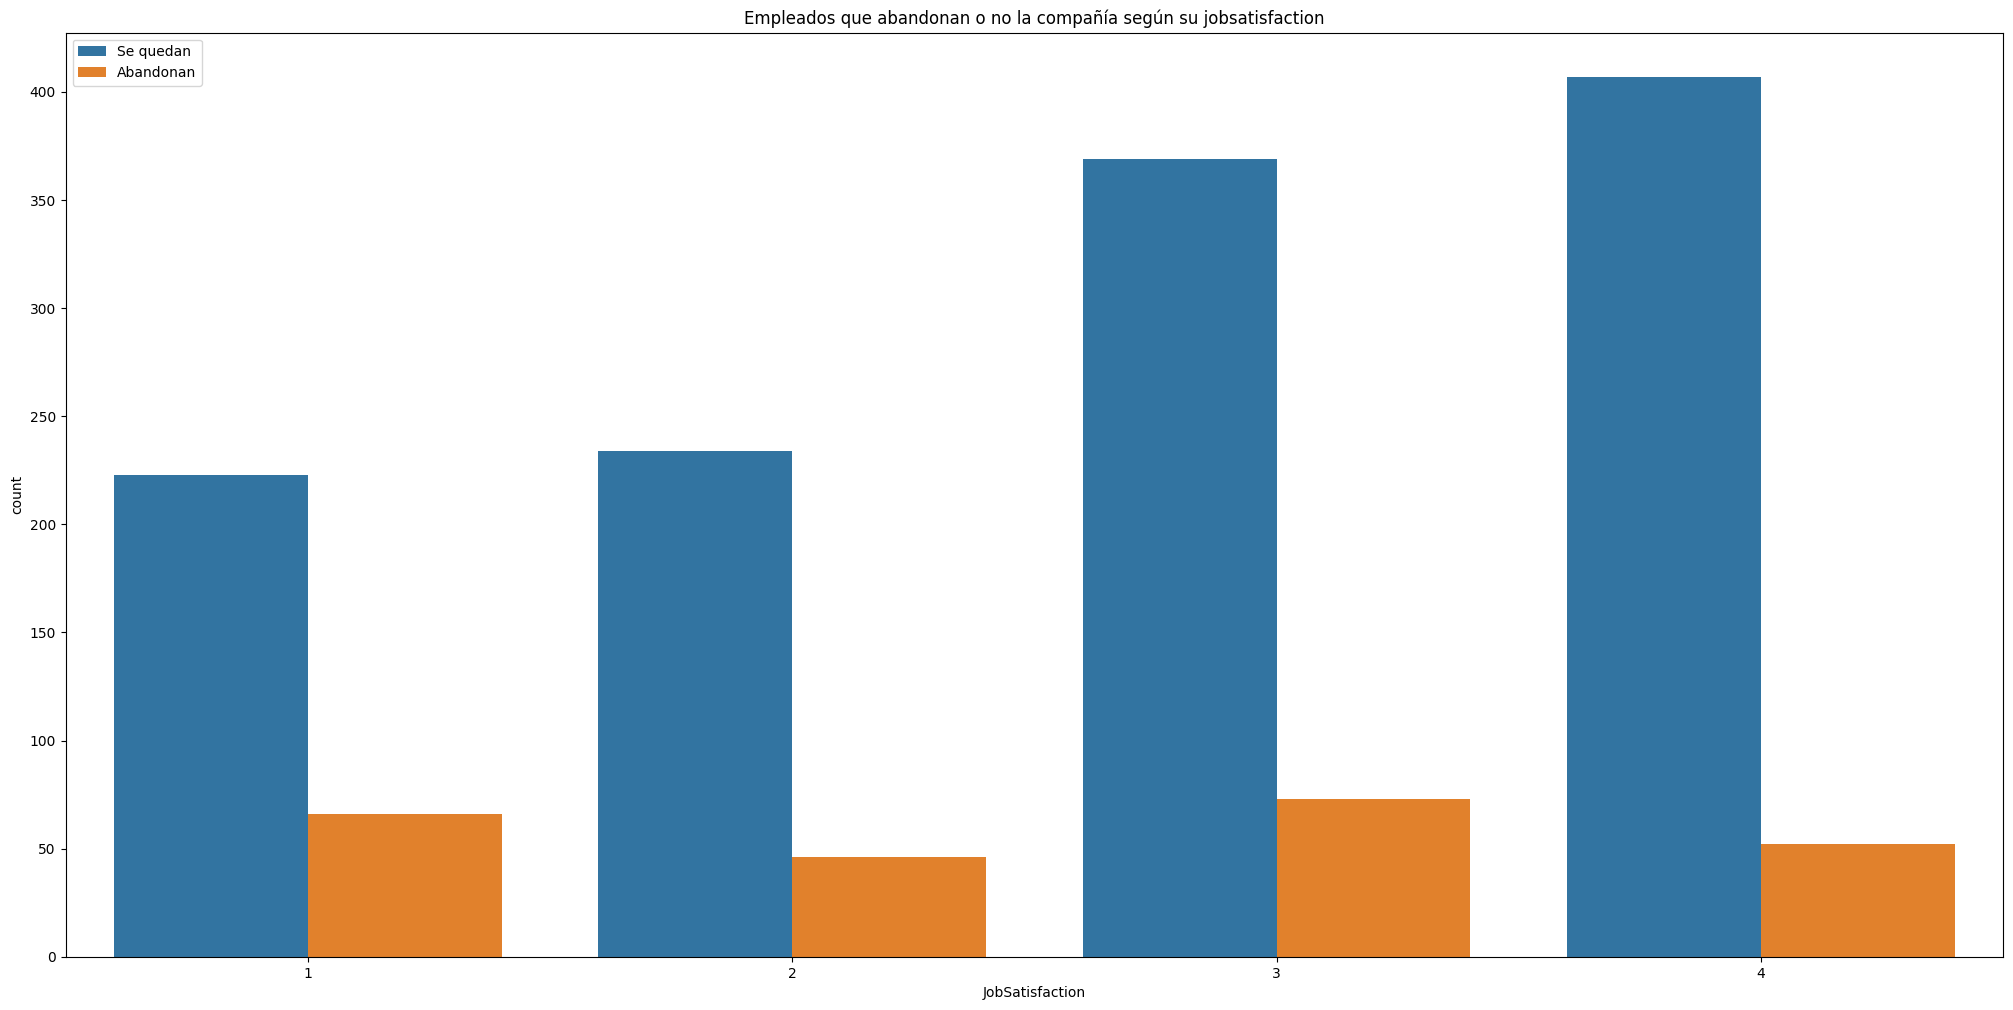

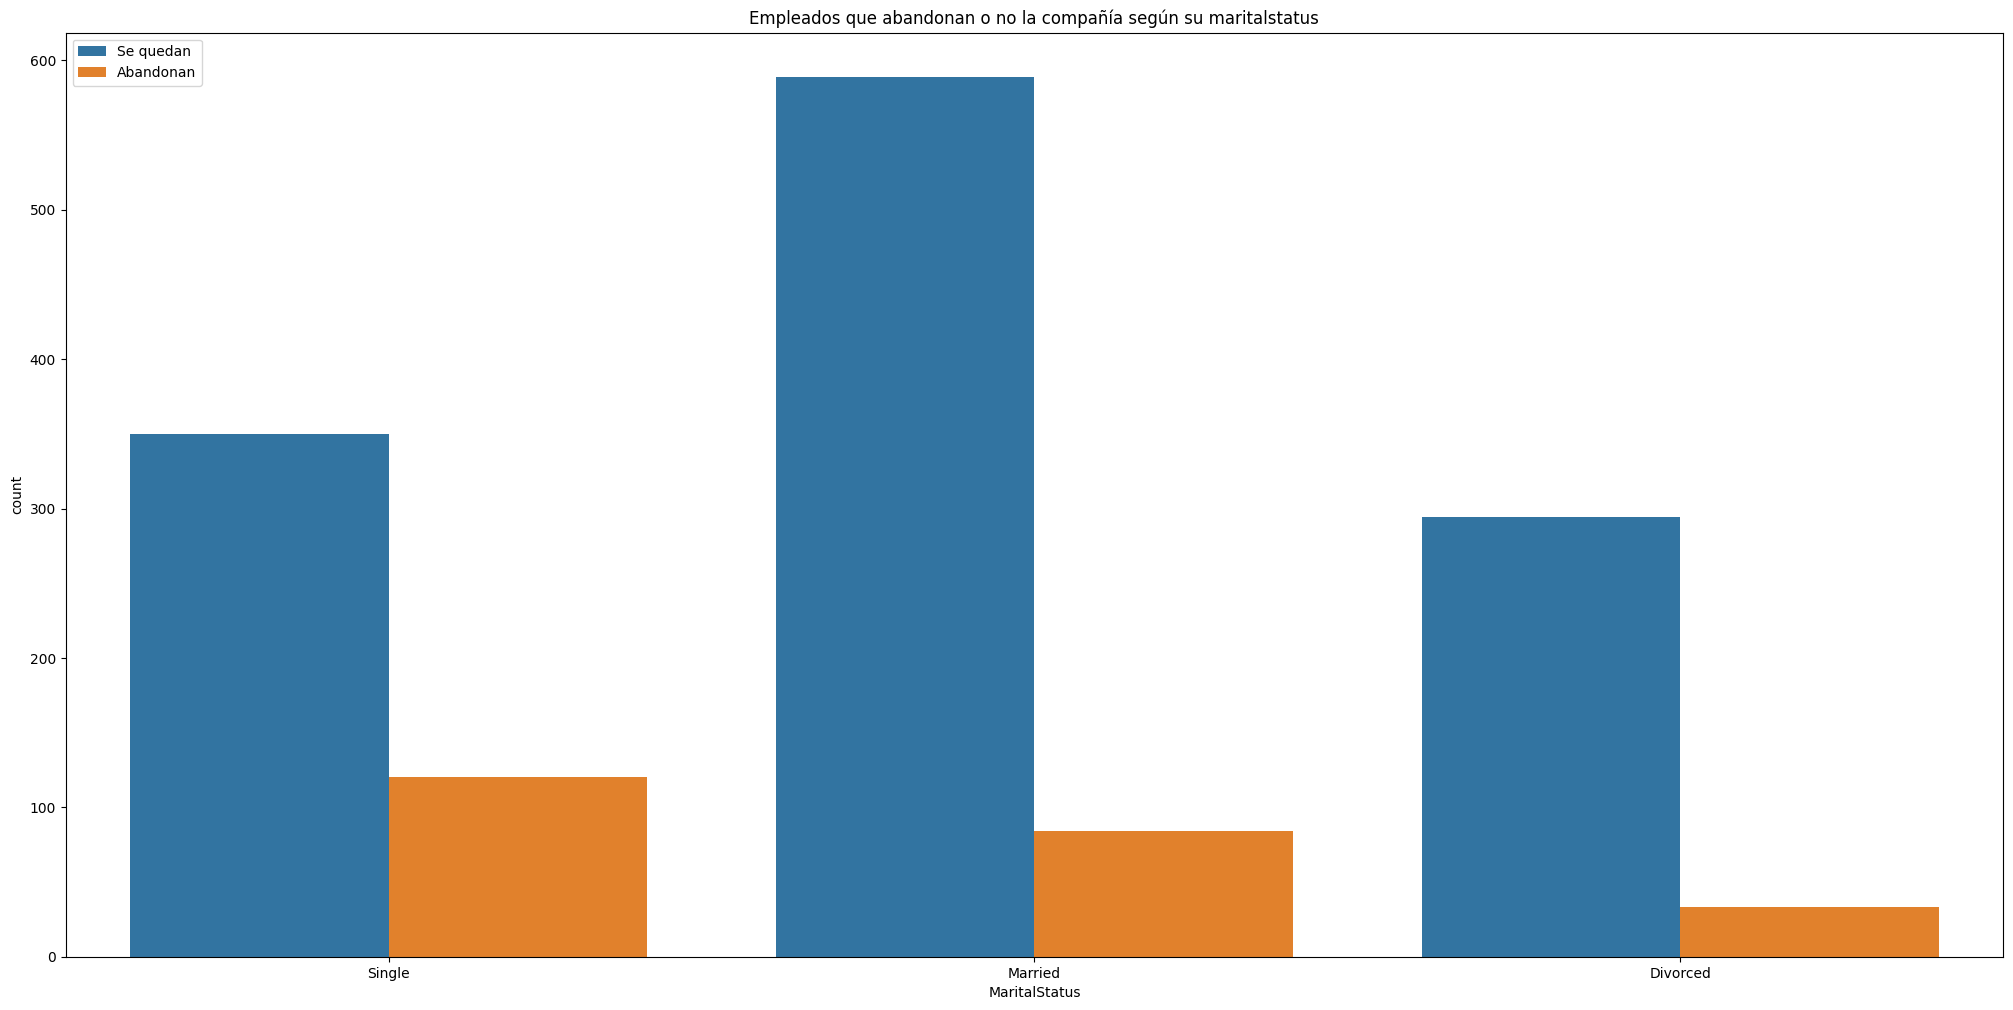

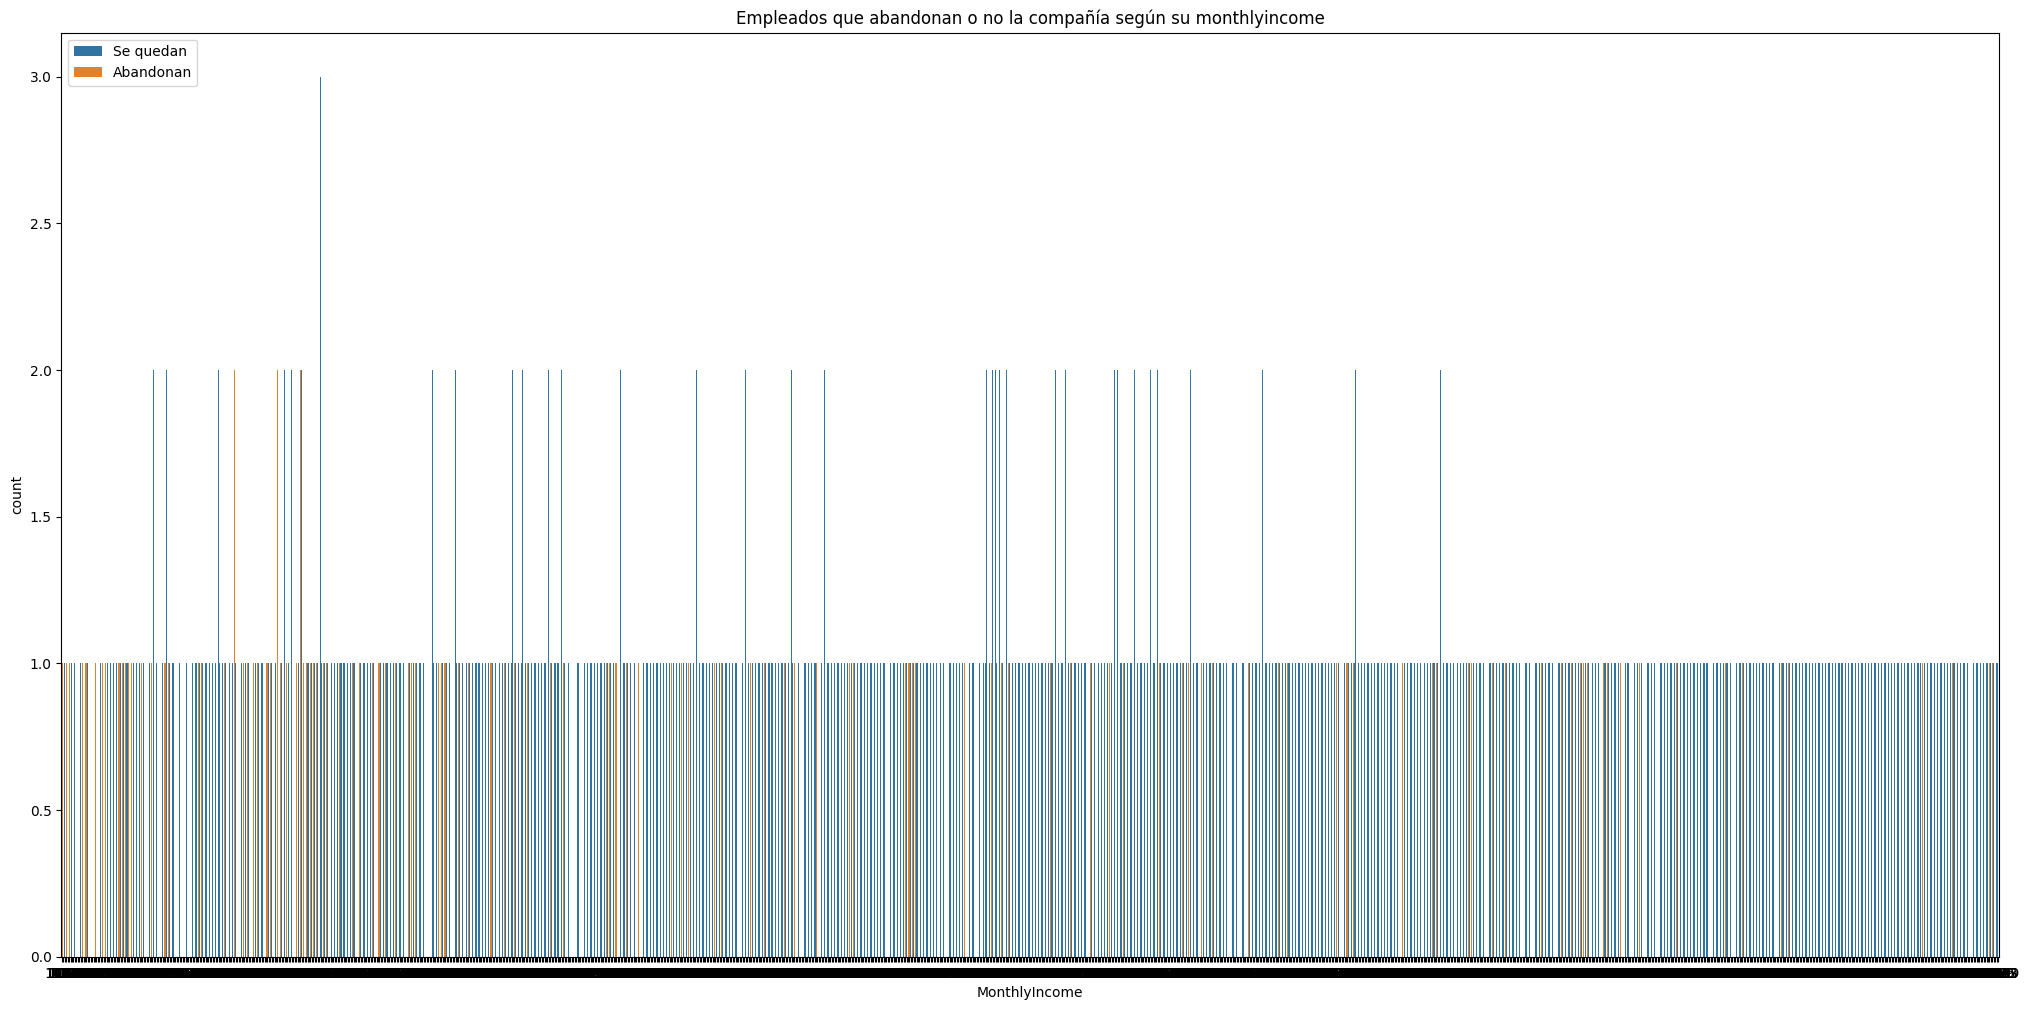

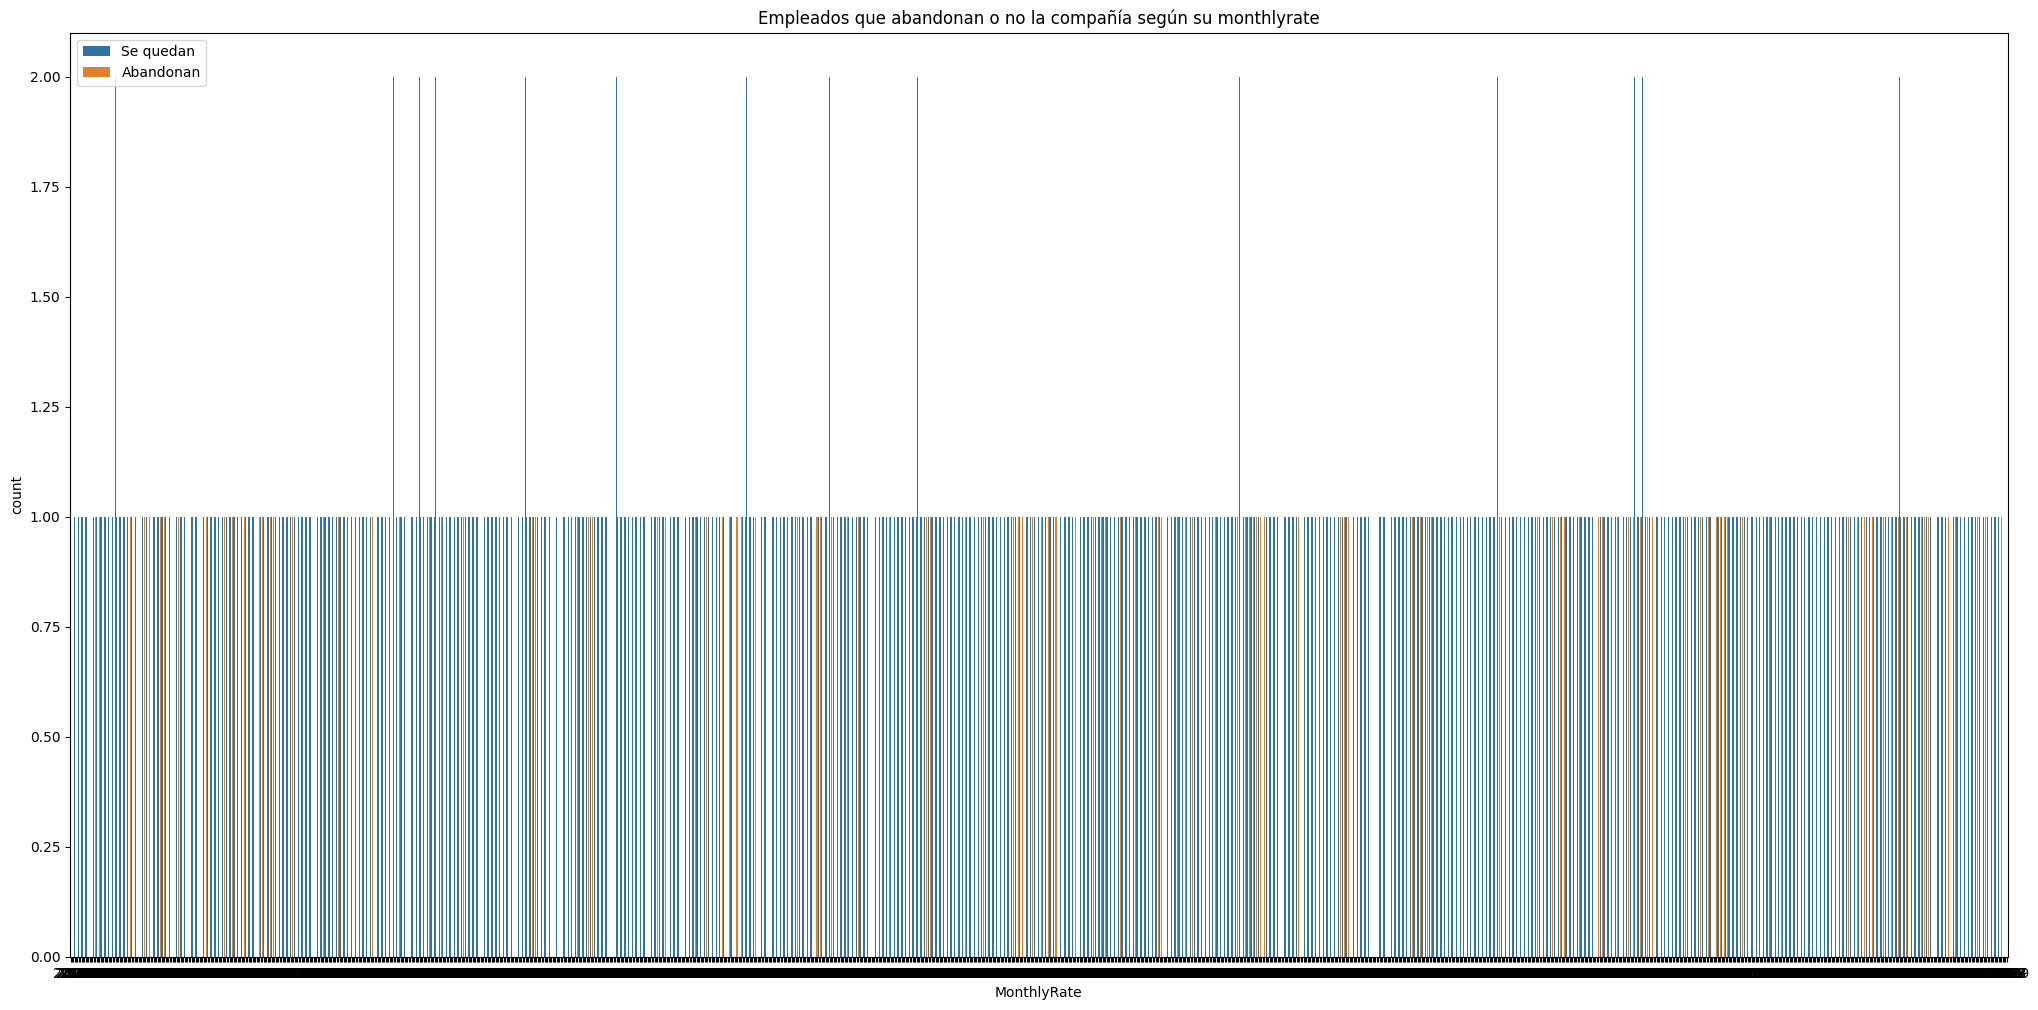

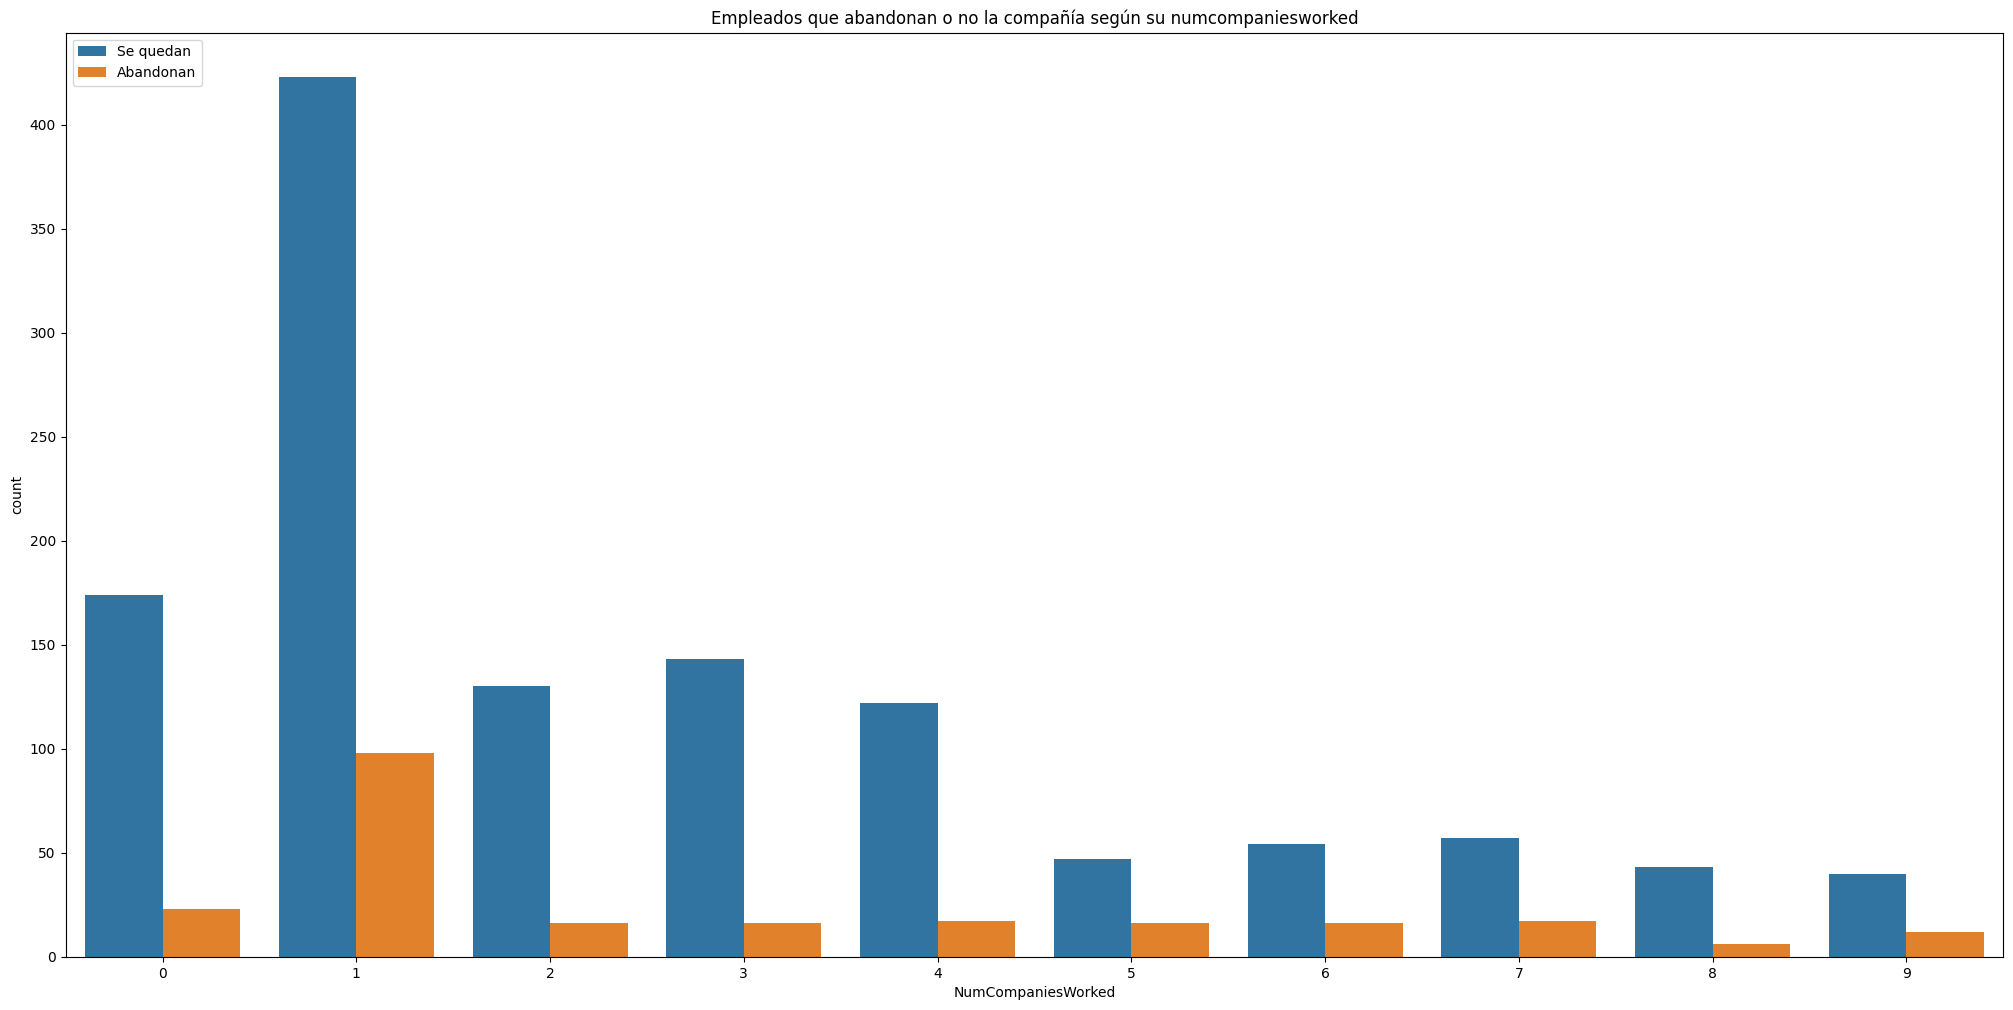

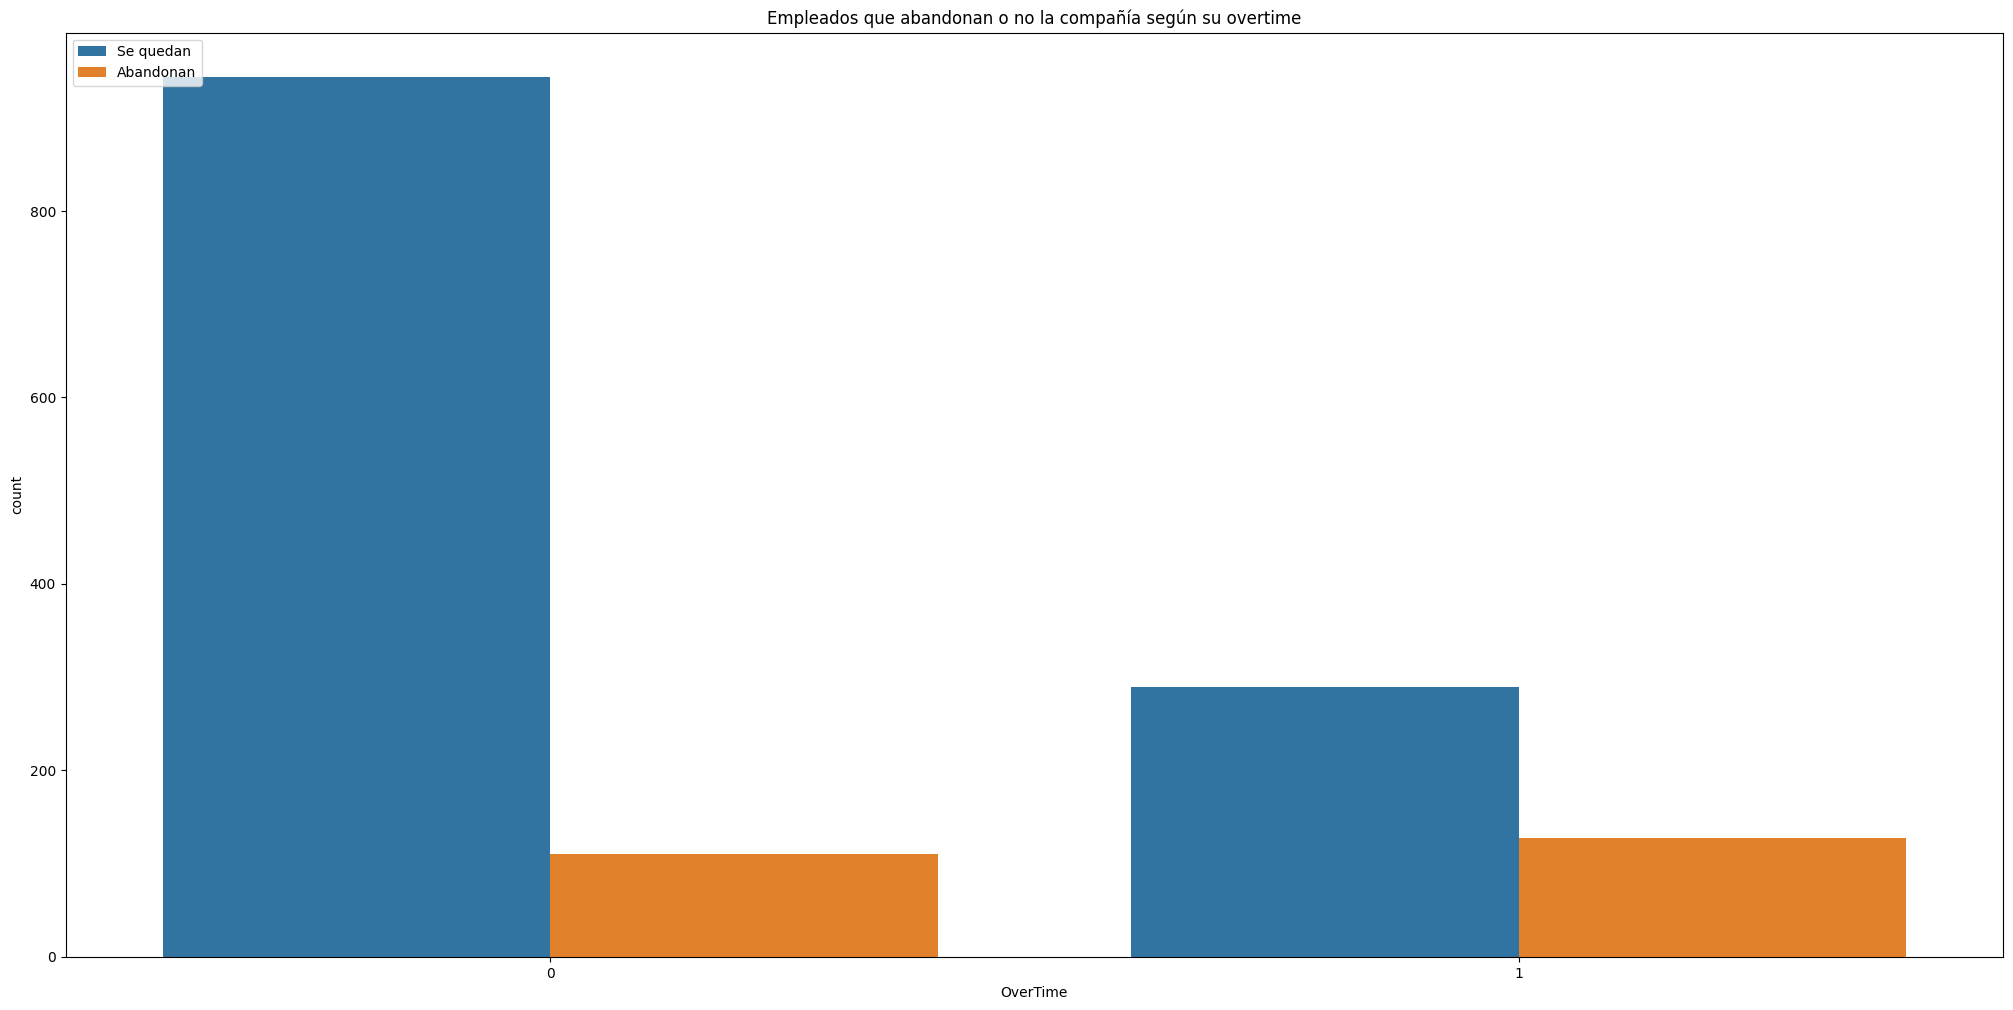

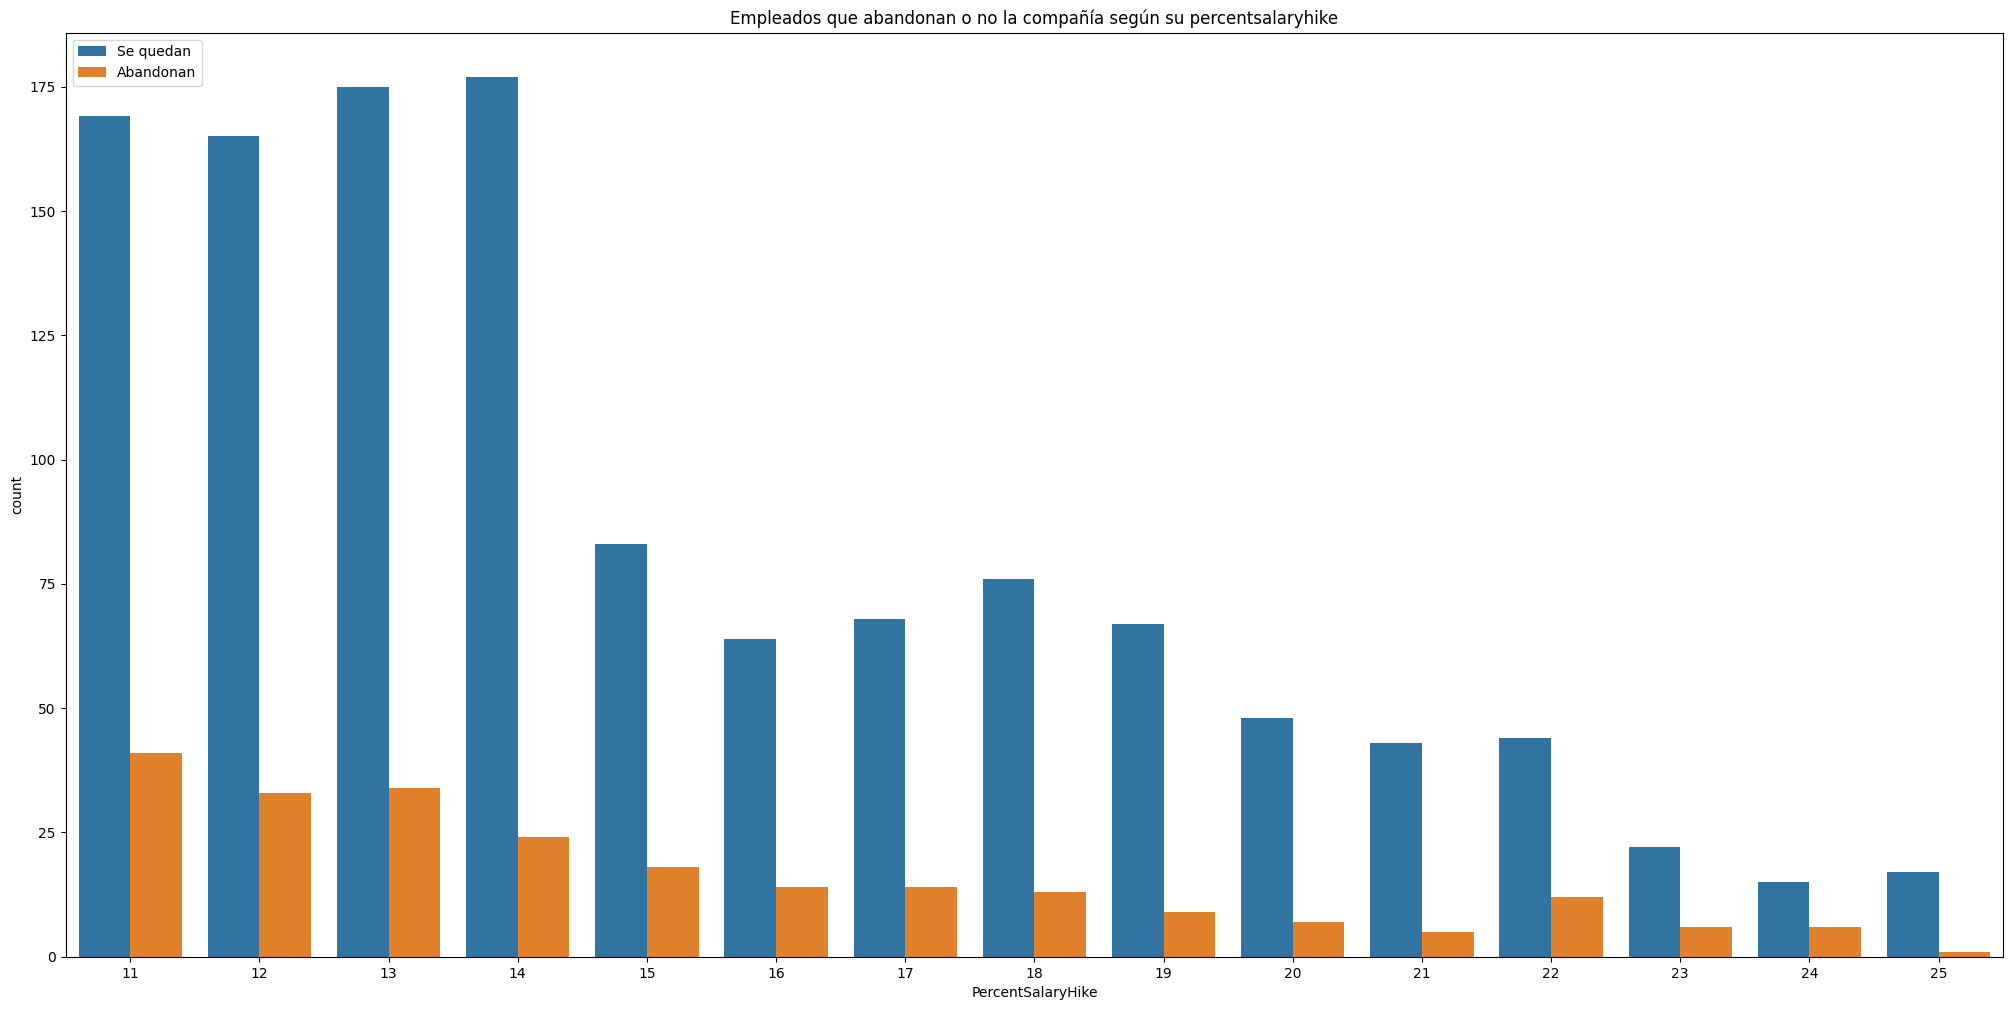

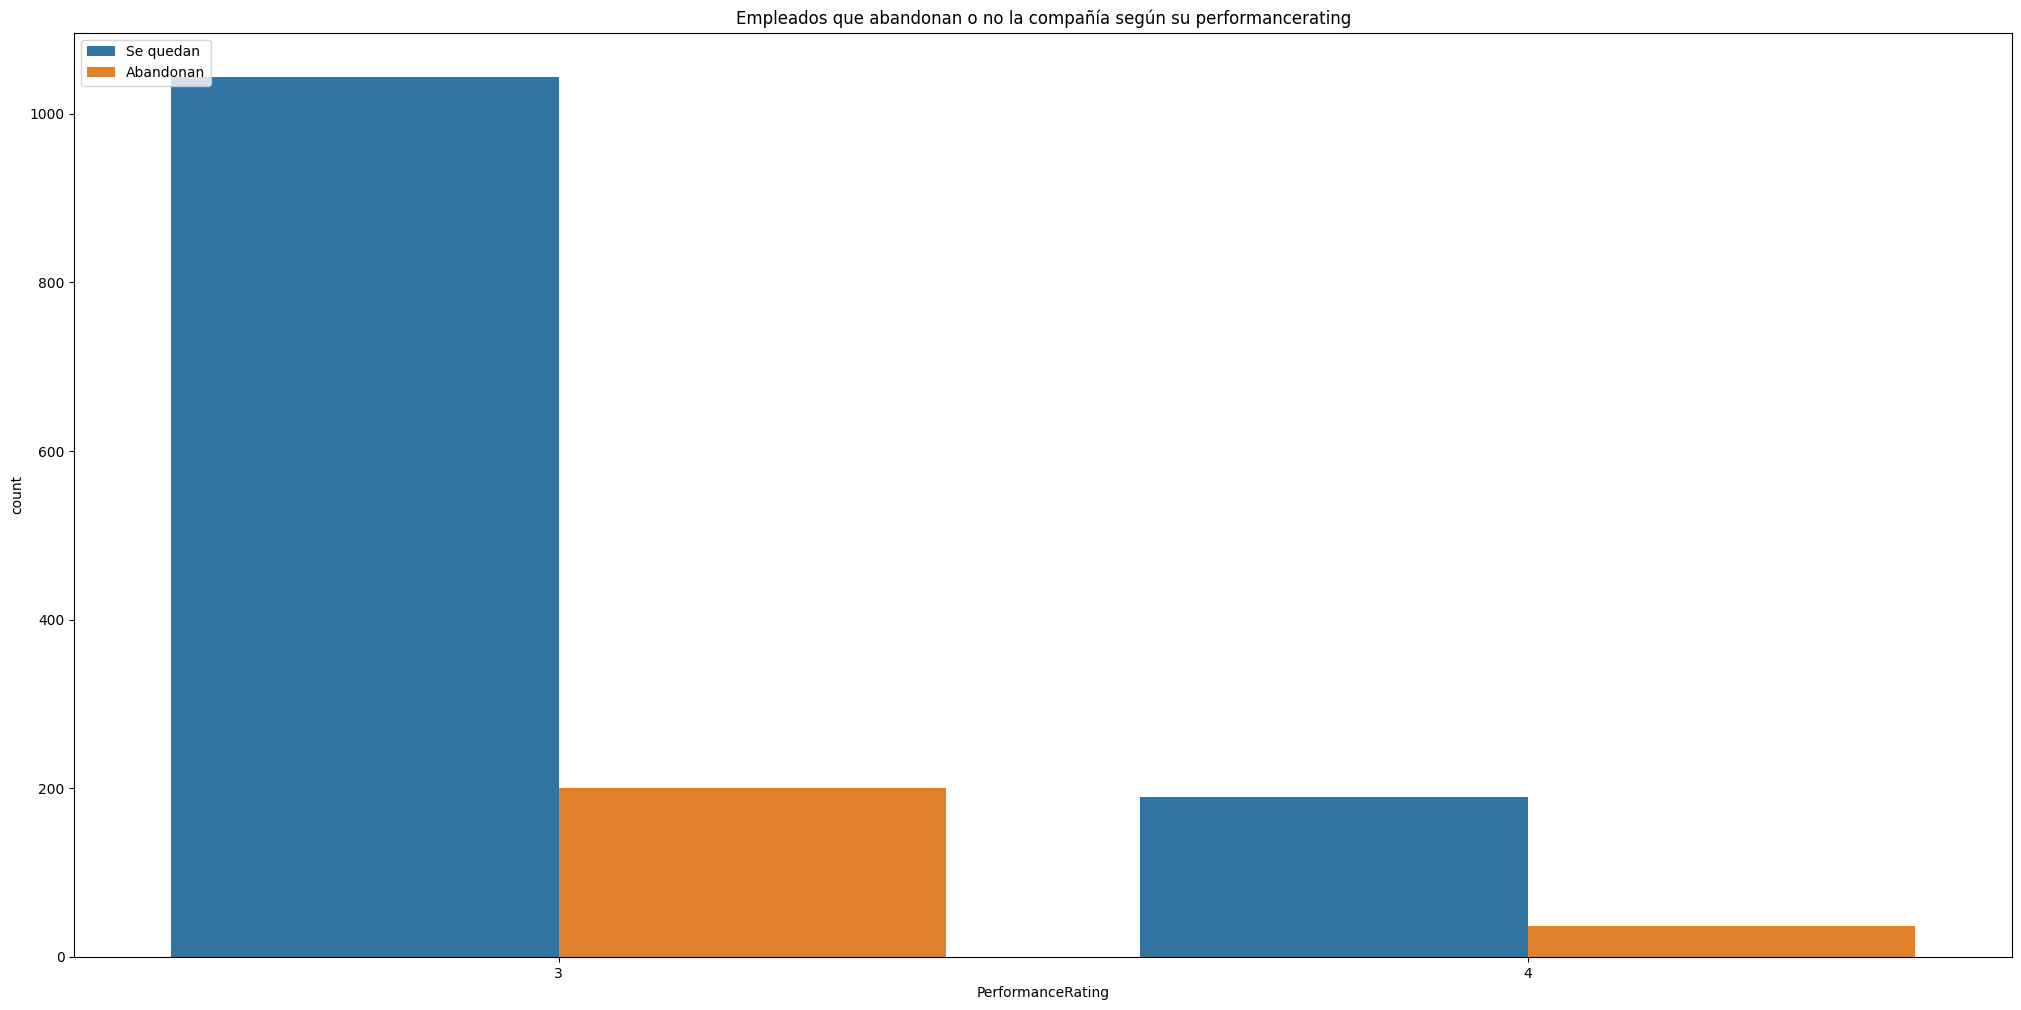

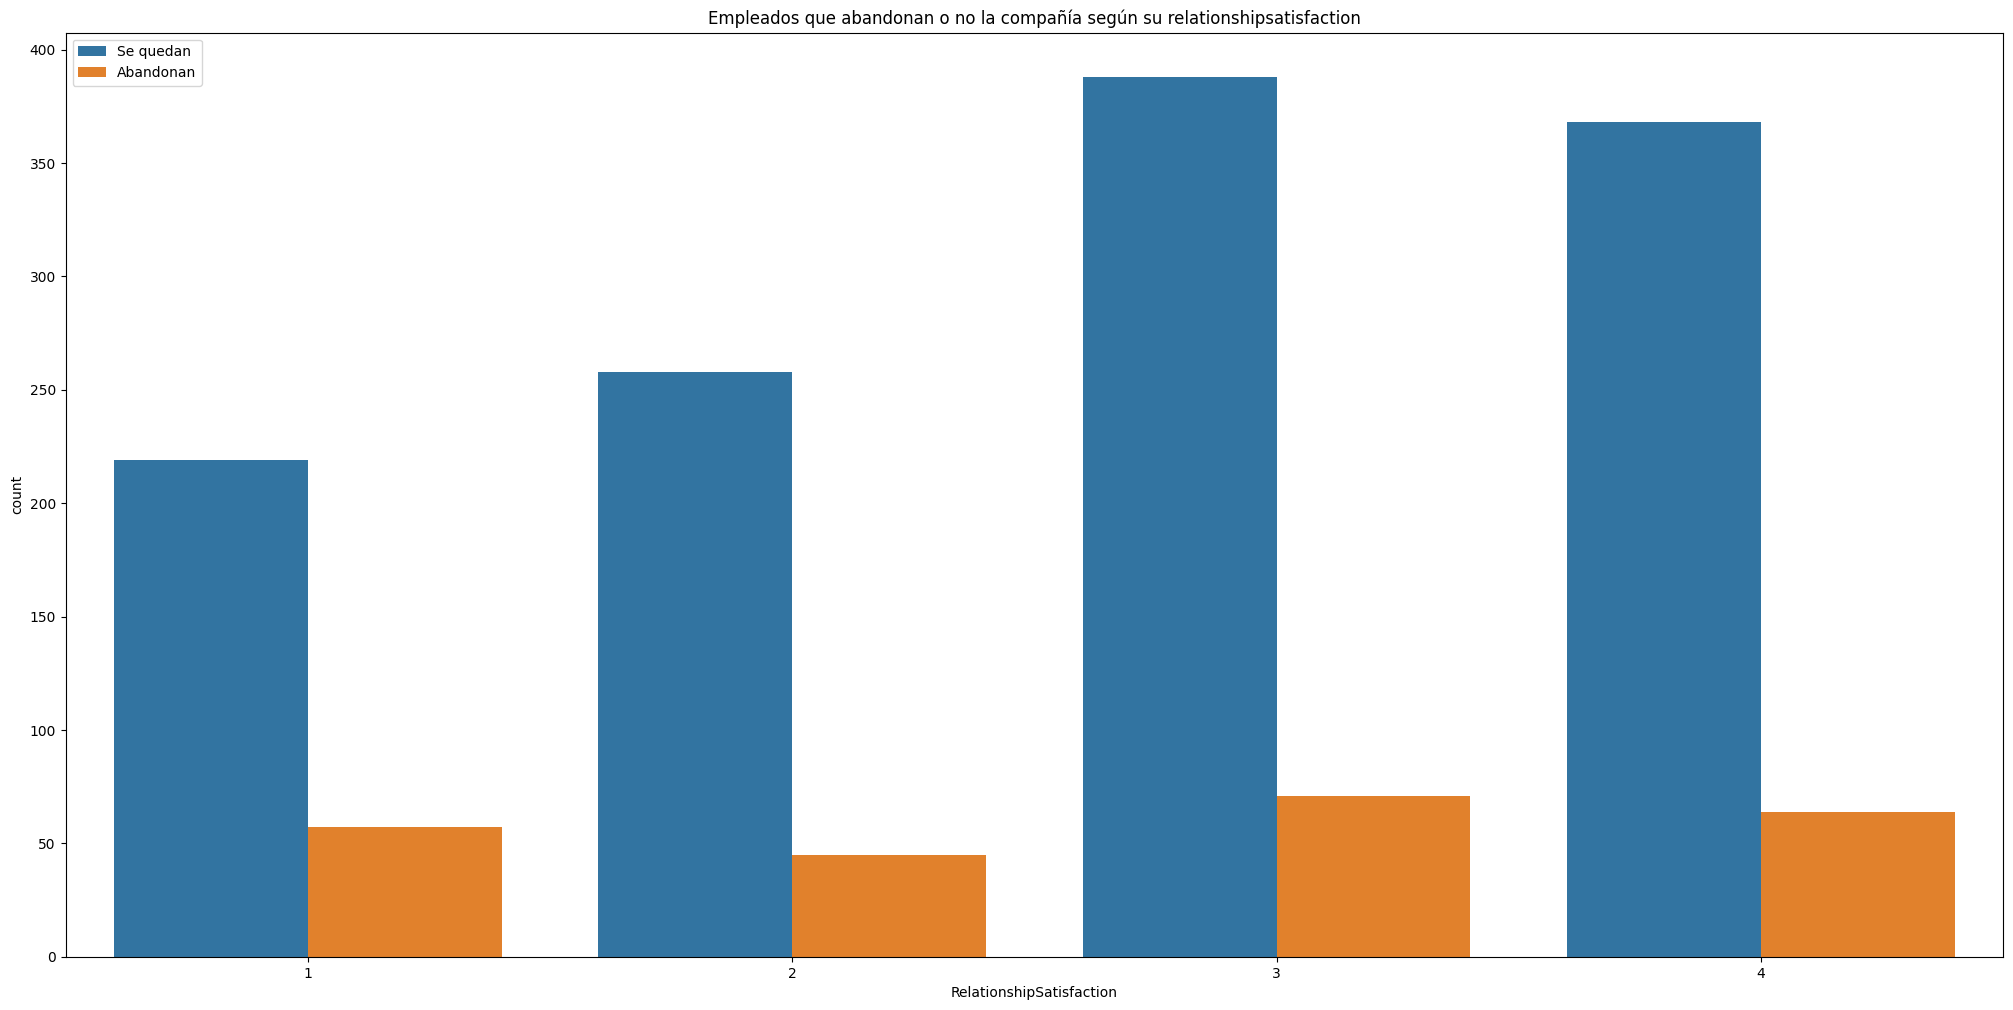

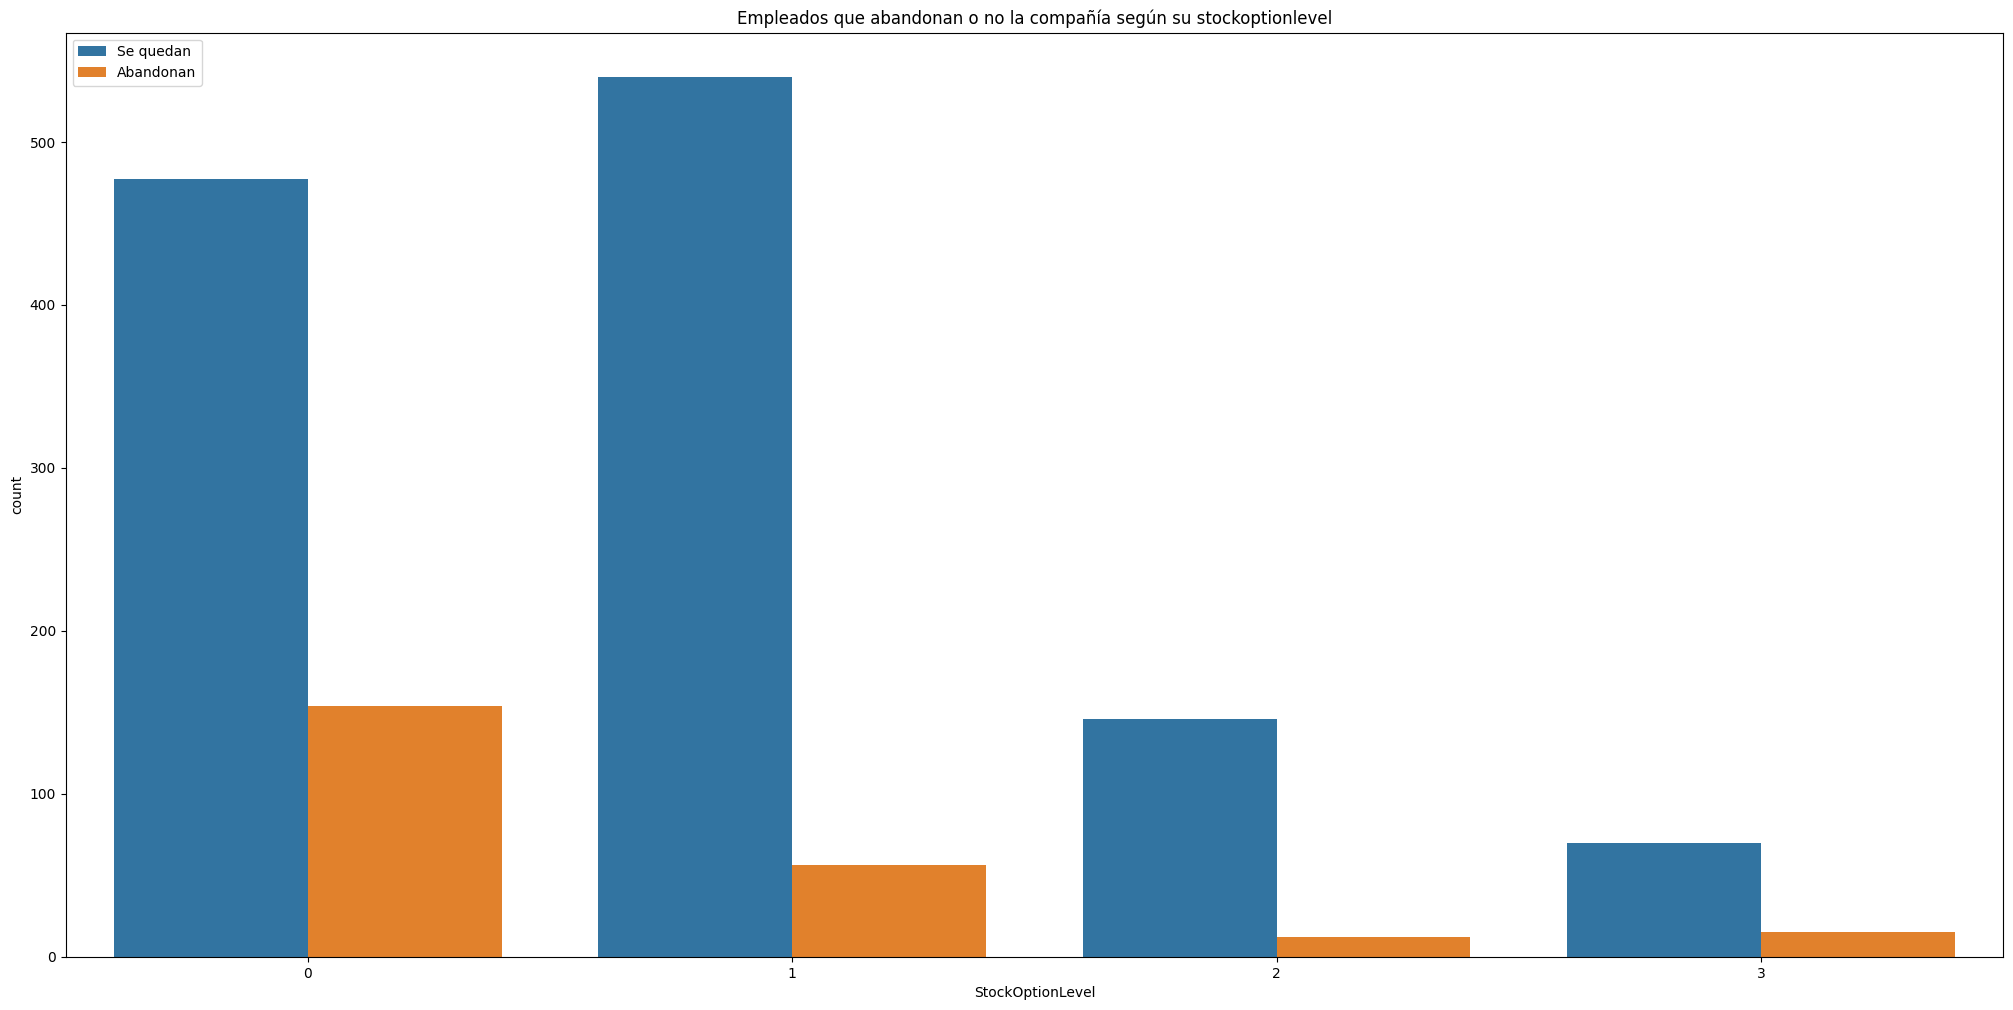

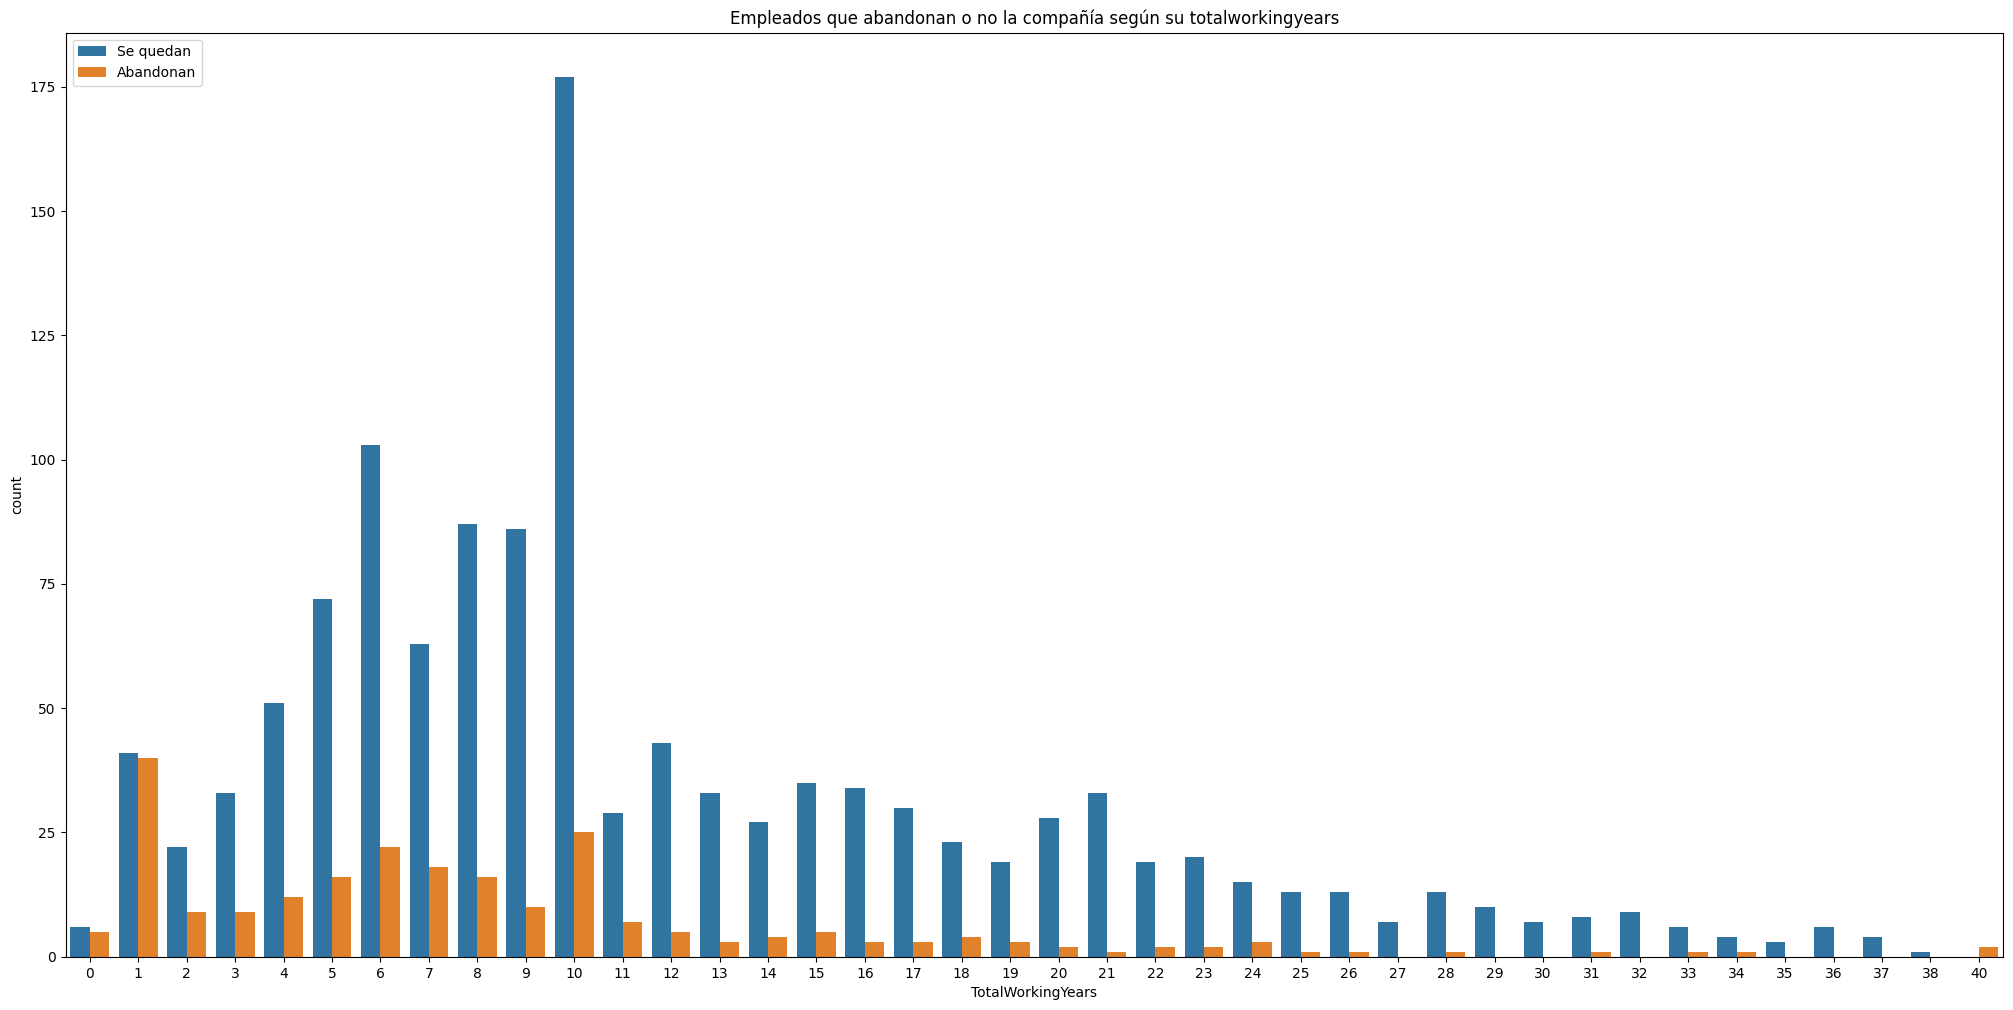

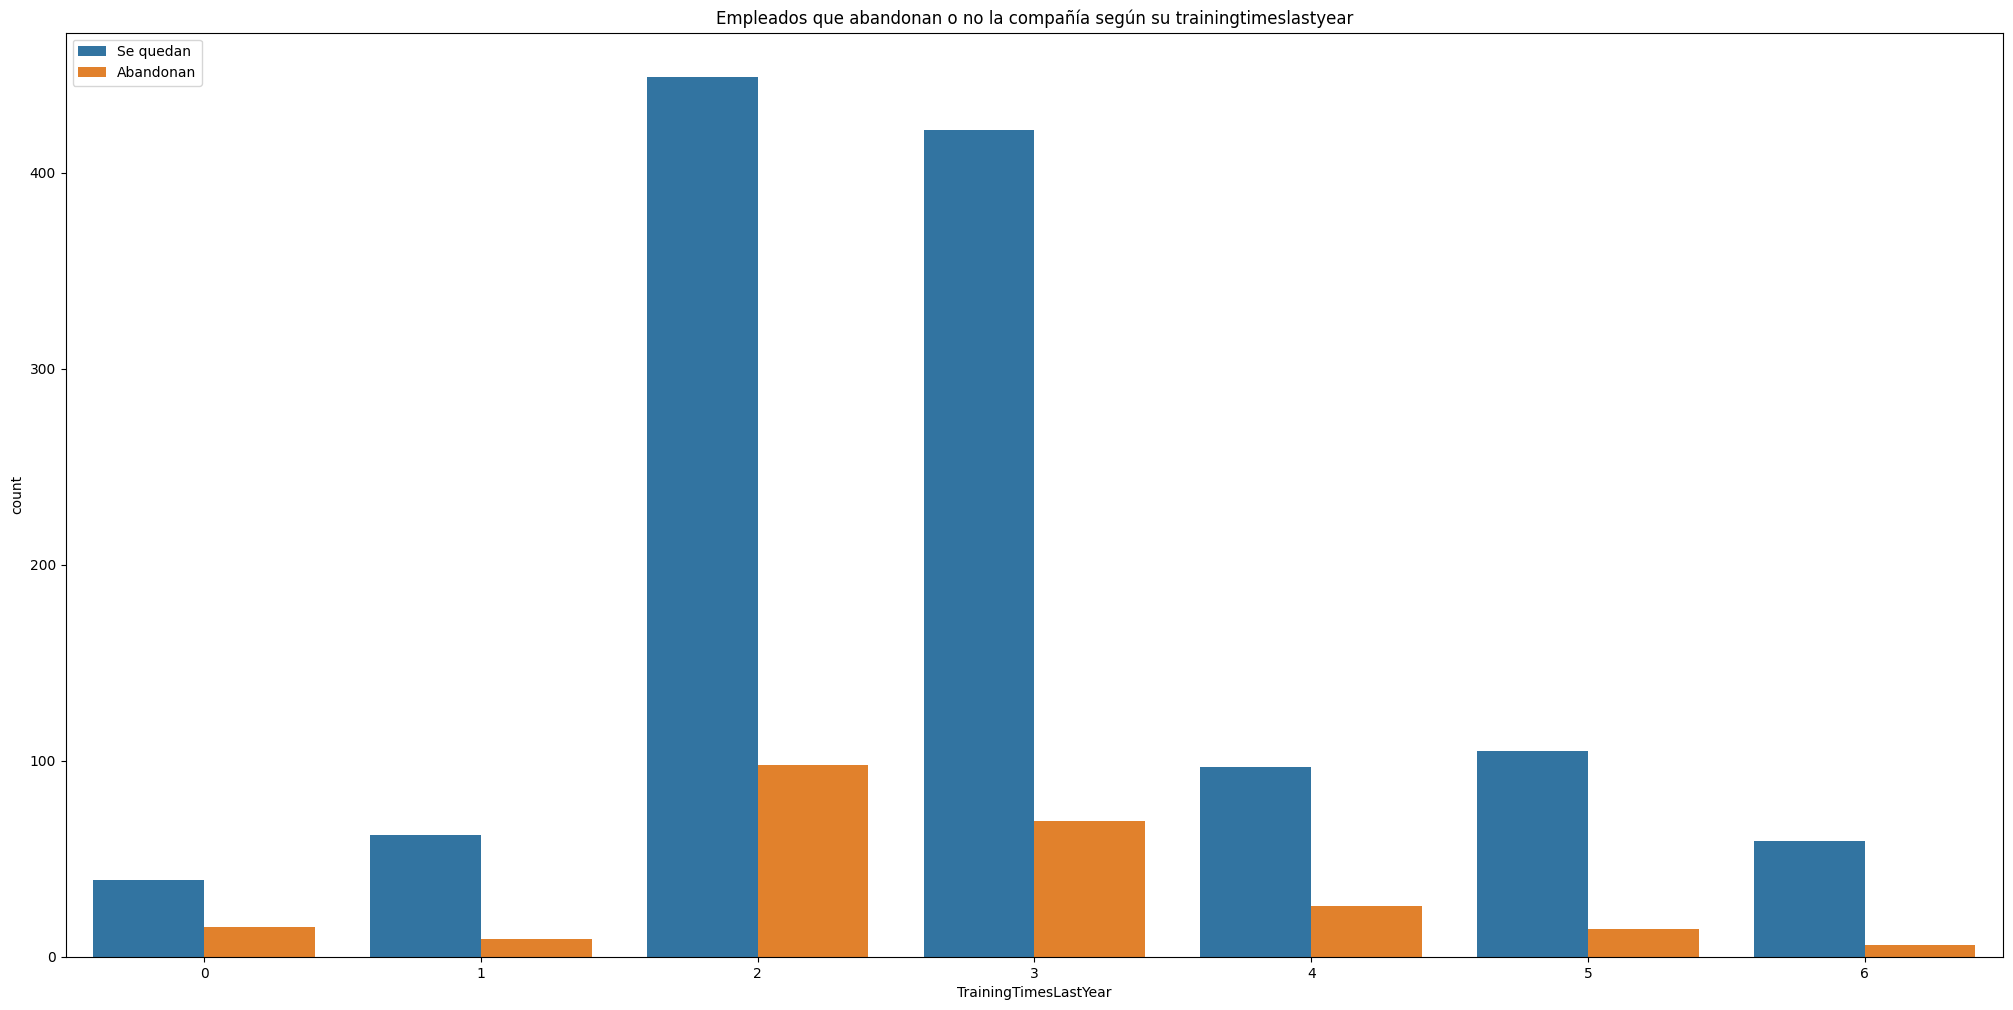

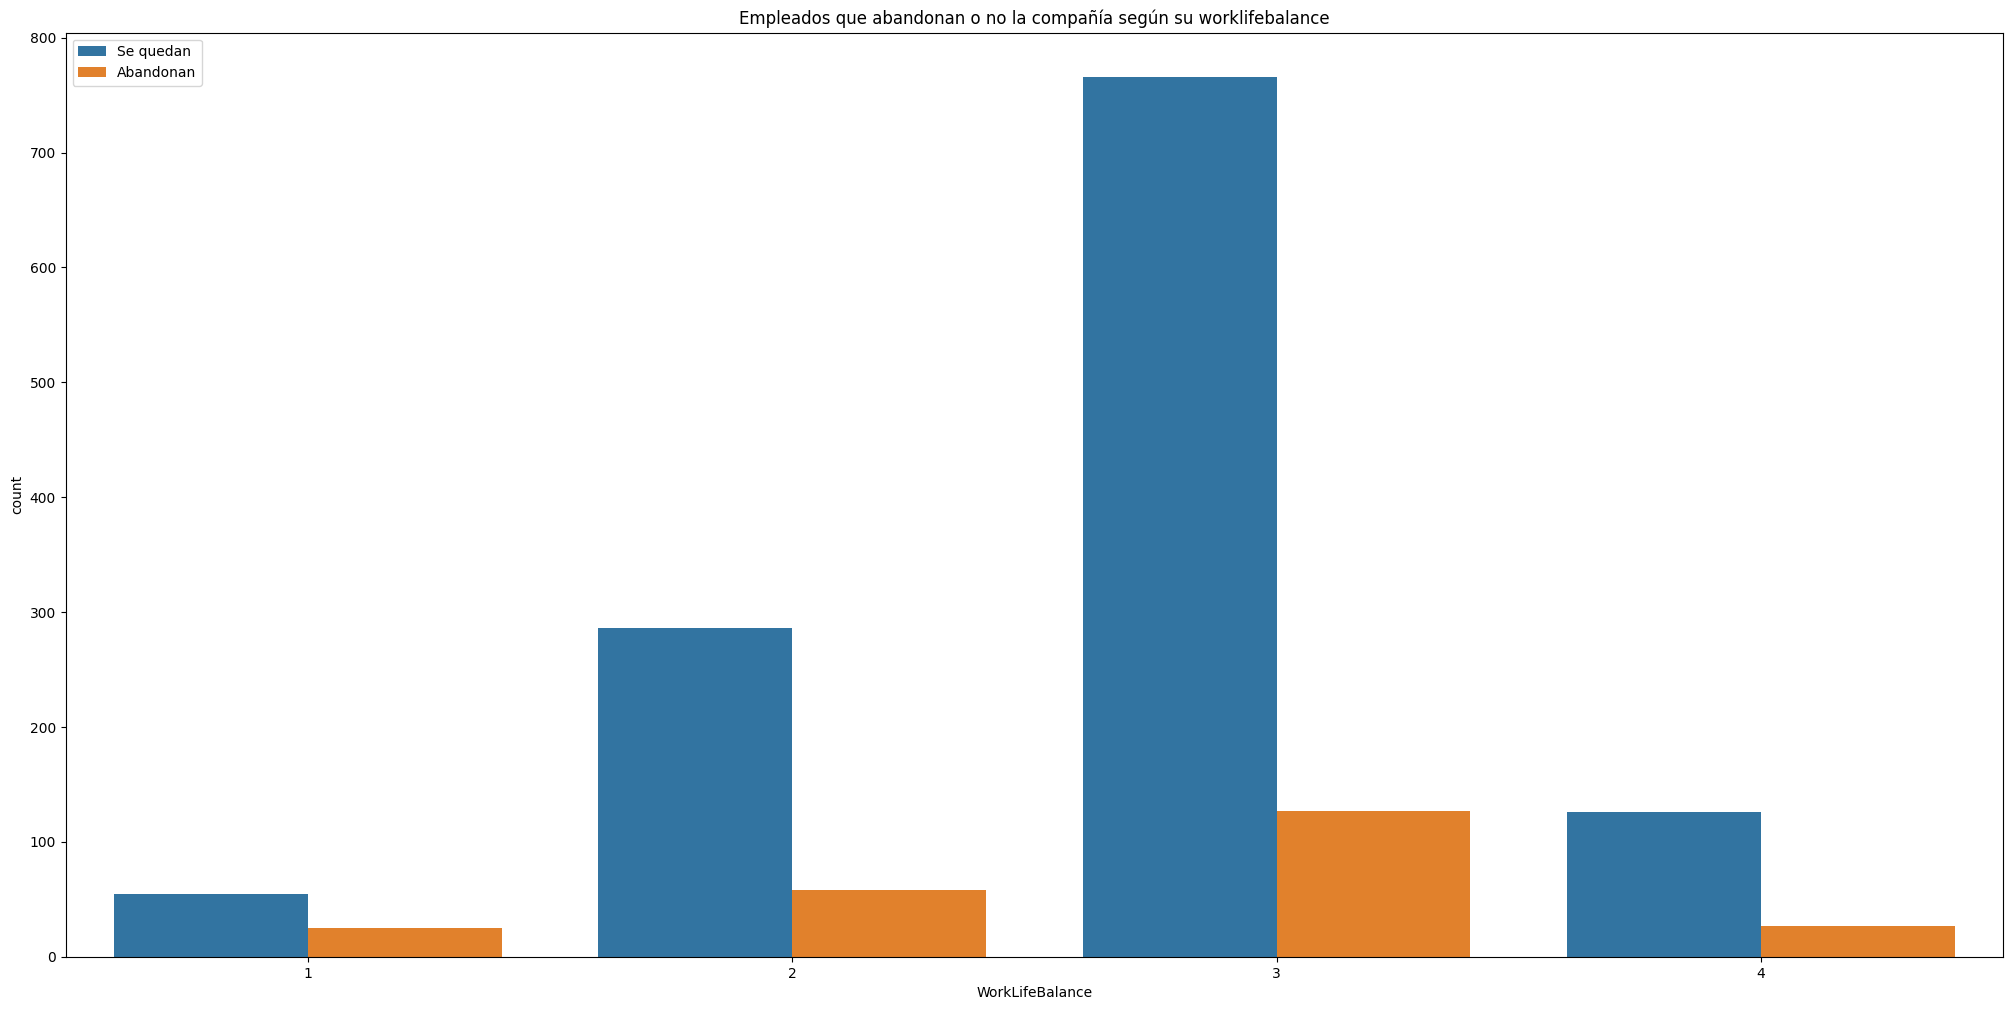

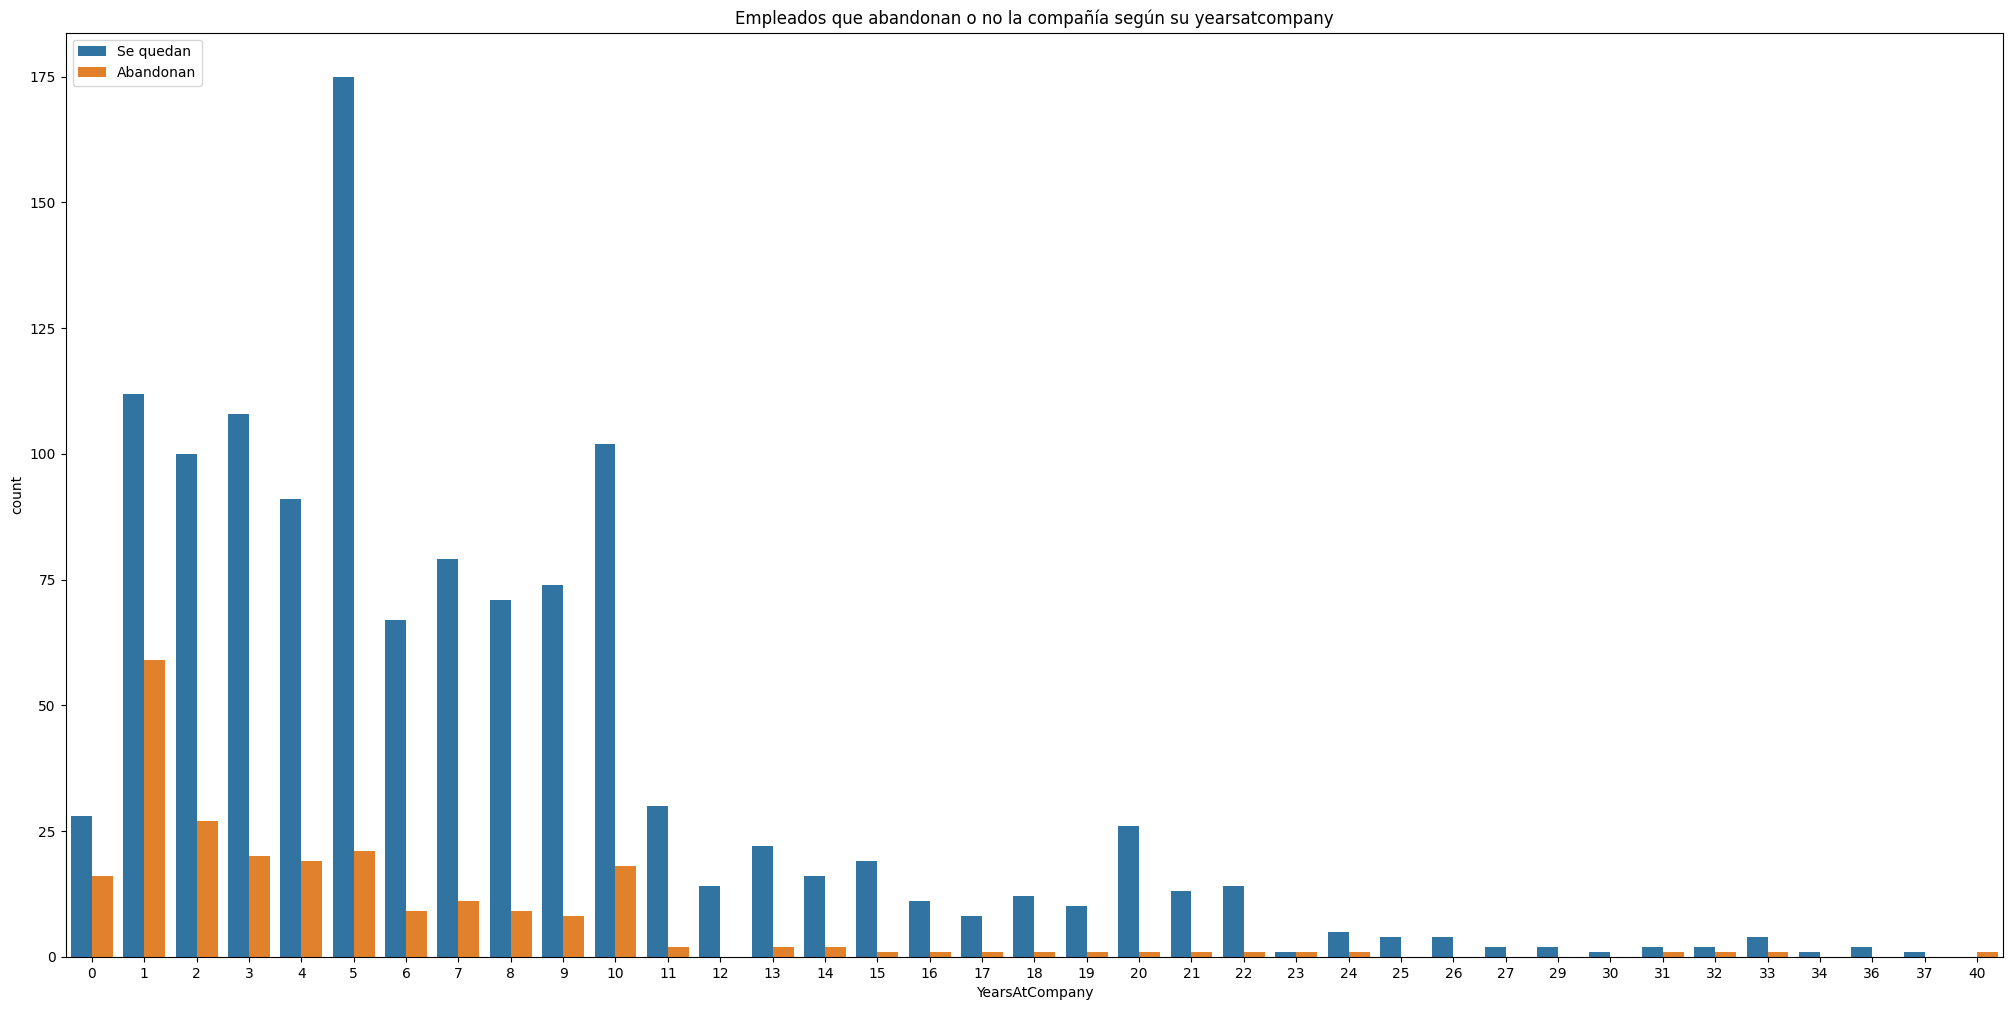

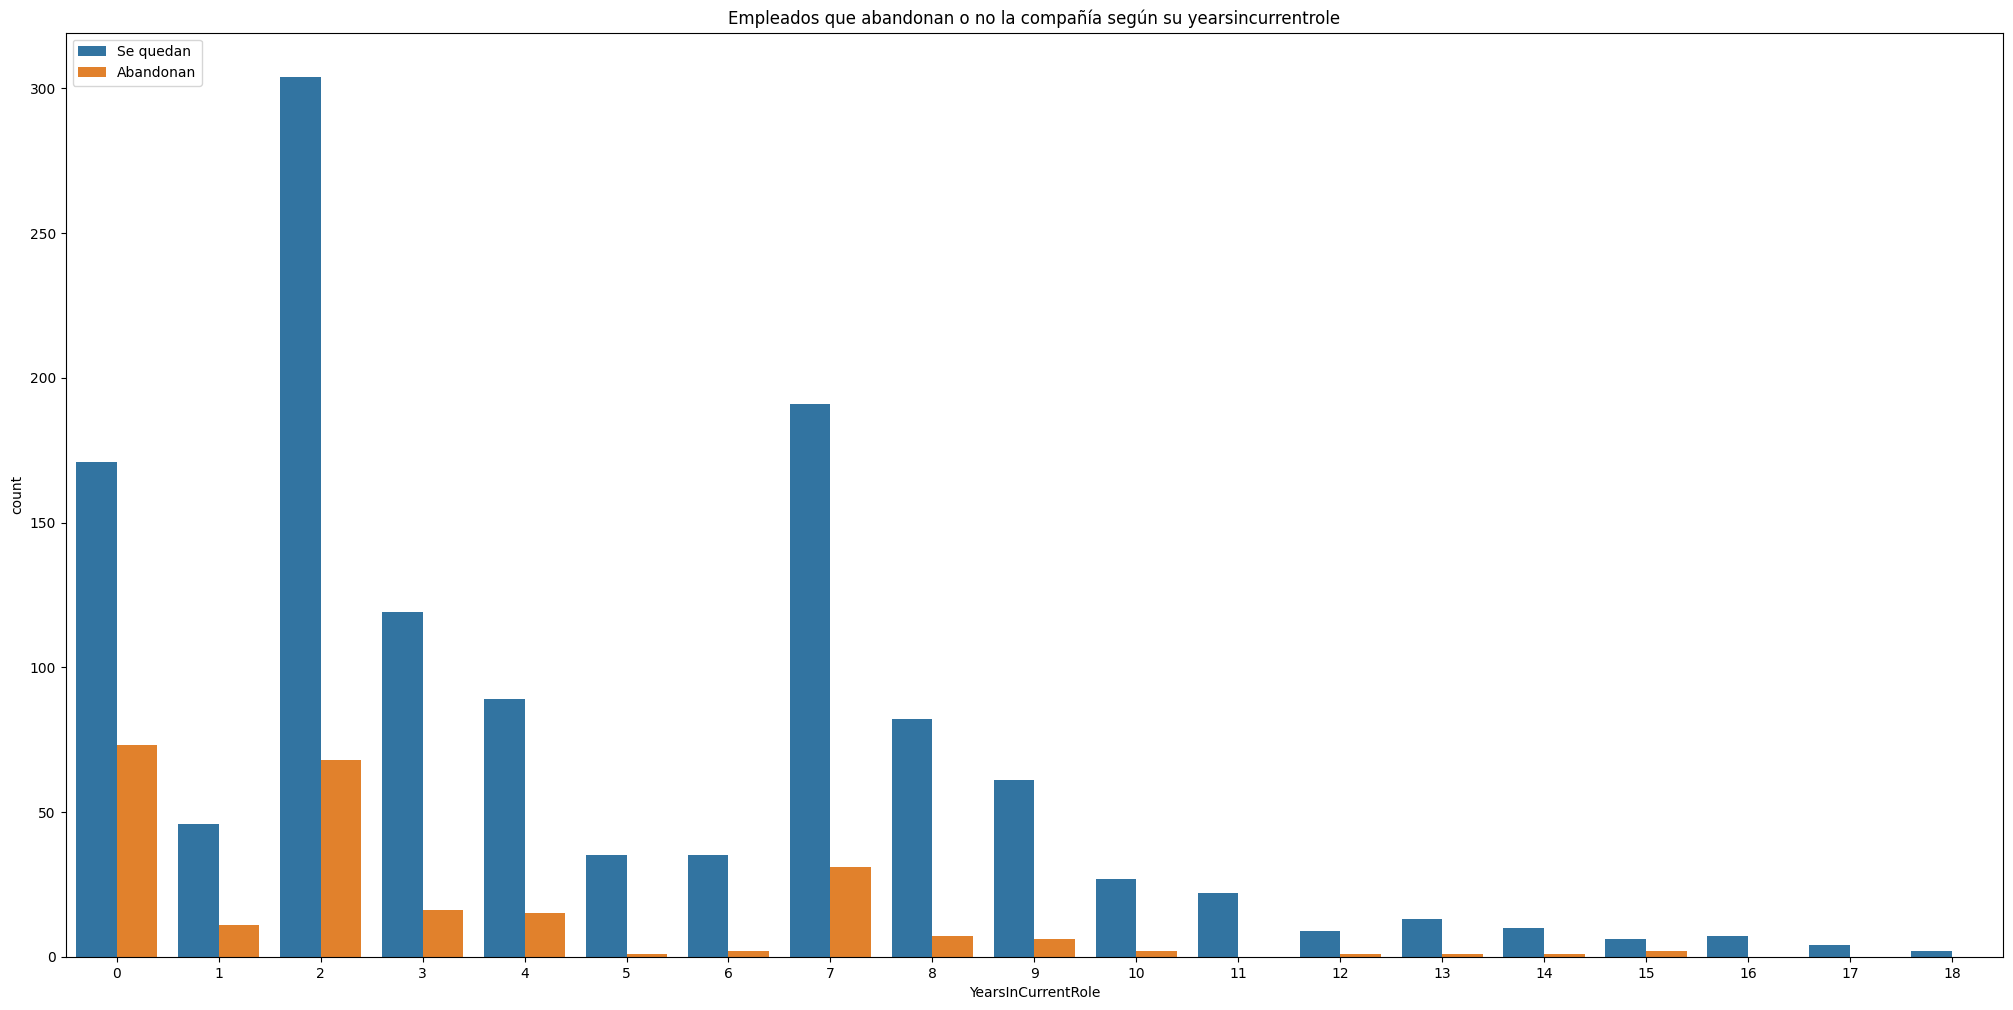

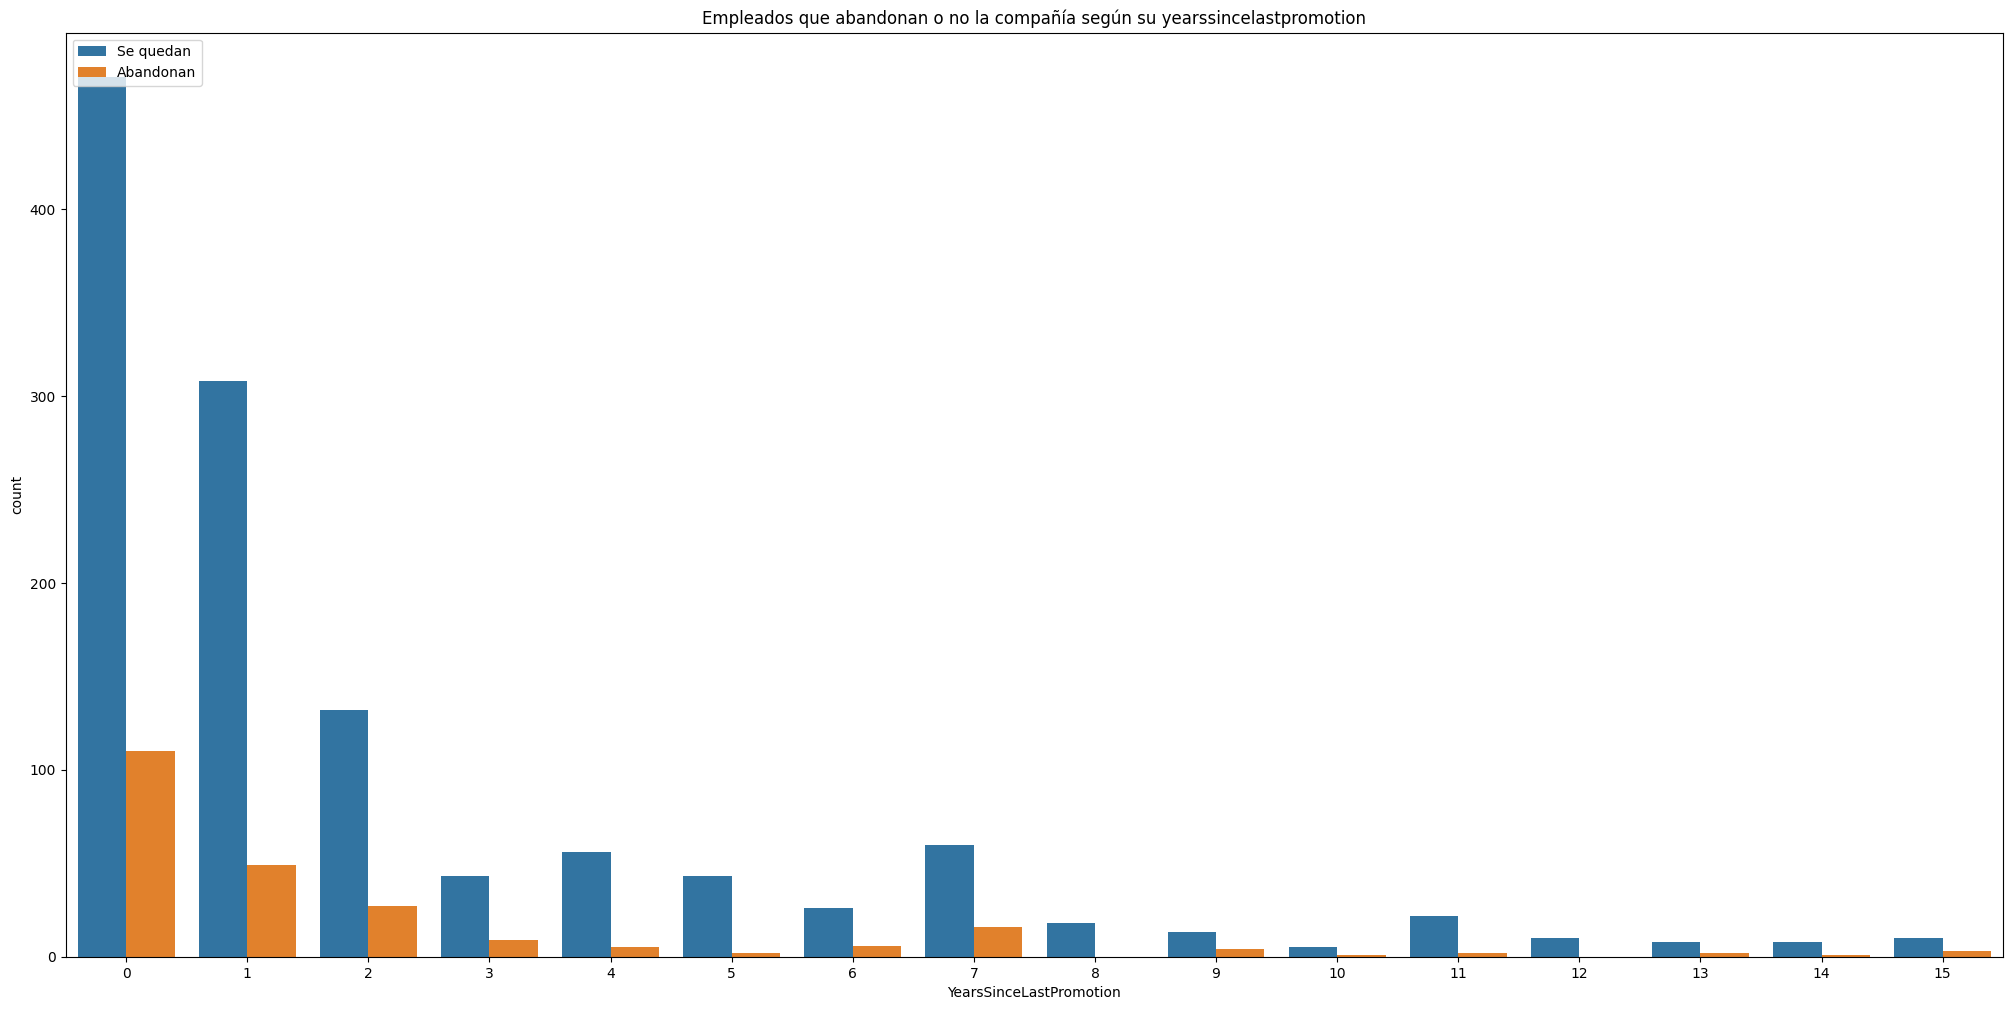

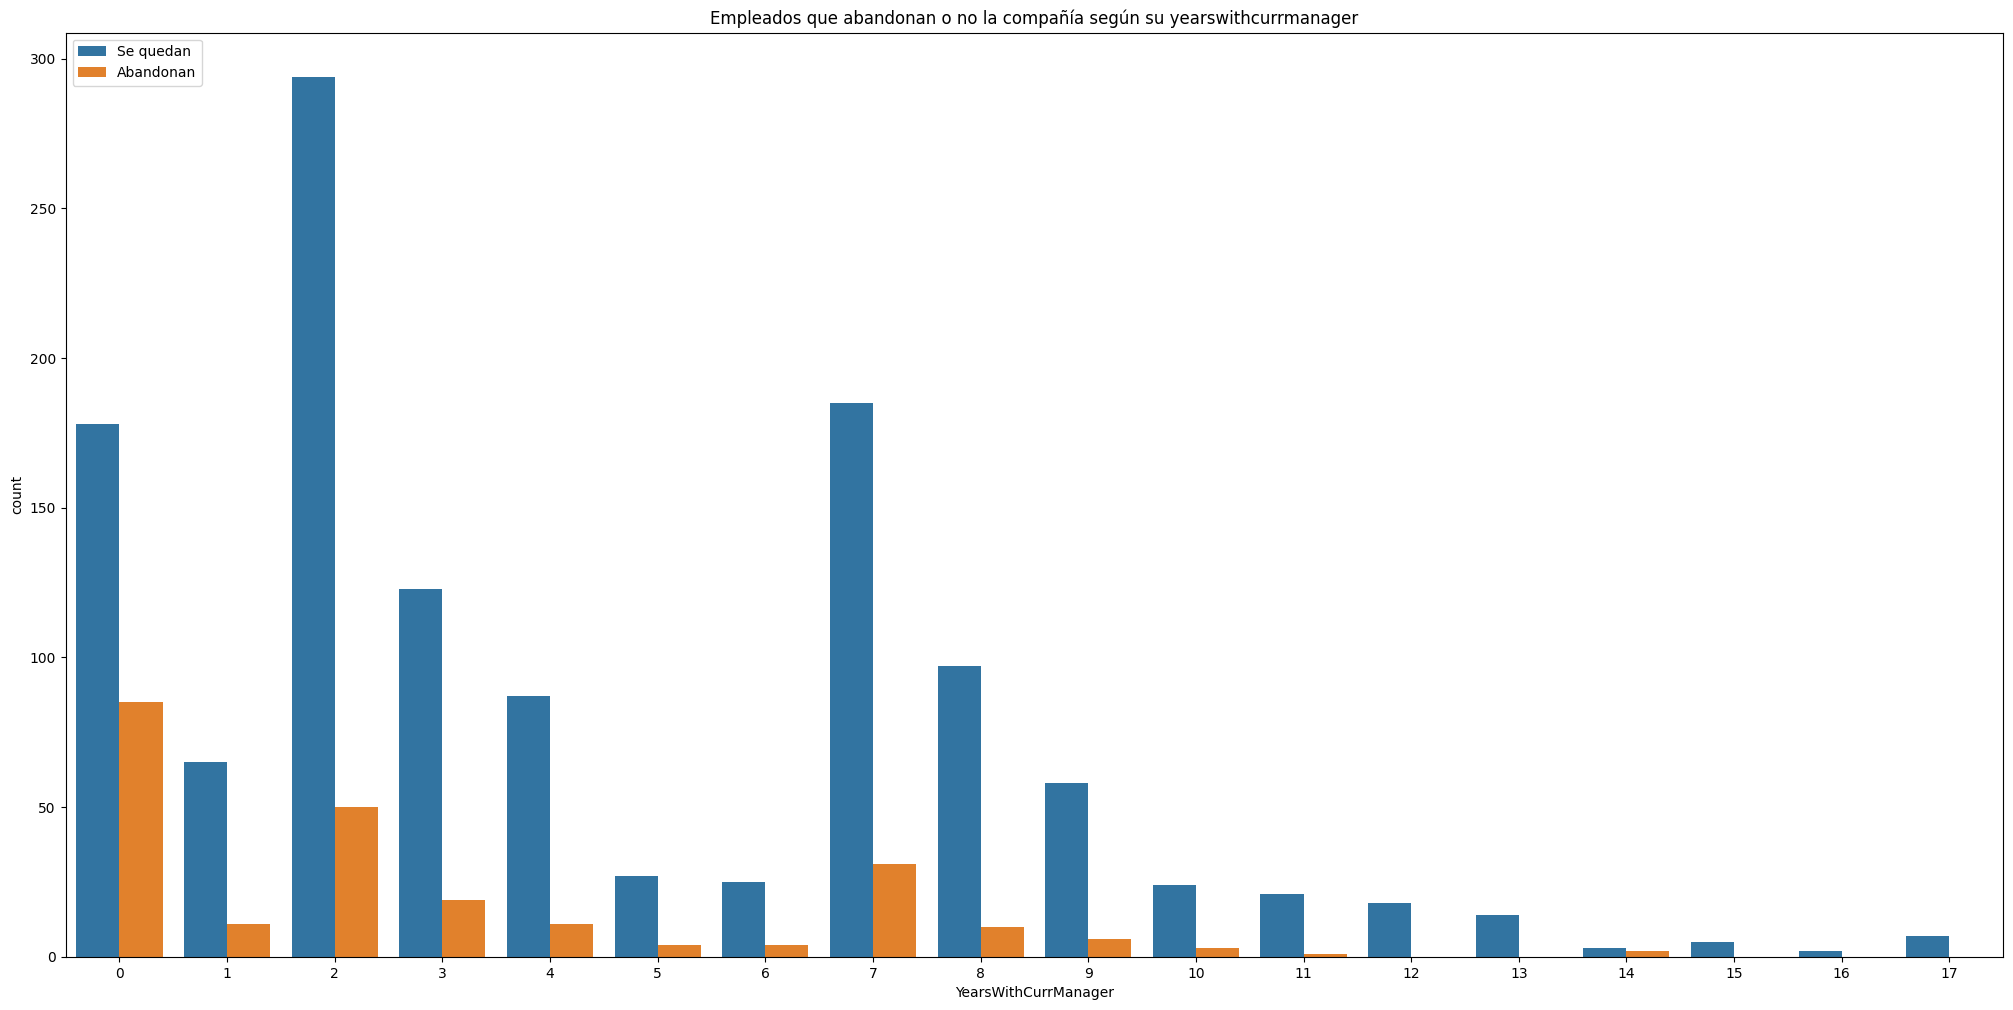

In [ ]:
#graficos comparativos de attrition vs todas las variables caracteristicas (usar buble for)
variables_x = ['Age','BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Iterar a través de las variables x y generar un gráfico para cada una
for var_x in variables_x:
    # Crear una figura y definir su tamaño
    plt.figure(figsize=[25, 12])
    sns.countplot(x=var_x, hue='Attrition', data=employee_df)
    plt.legend(title='', loc='upper left', labels=['Se quedan', 'Abandonan'])
    plt.title(f"Empleados que abandonan o no la compañía según su {var_x.lower()}")

    # Mostrar la figura
    plt.show()

Note que en algunas de las graficas previas del bucle for no son posibles de leer O son poco interpretables, en ese caso, simplemente ignorarlas y leer de las que se pueda extraer informacion valiosa

### Analisis de variables continuas; distribuciones de probabilidades de densidad estimada

<ipython-input-43-9395834e92b4>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(marchan_df['DistanceFromHome'], label = "Empleados que se marchan", shade = True, color = 'b')#funcion de densidad para DistanceFromHome de los que se van
<ipython-input-43-9395834e92b4>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quedan_df['DistanceFromHome'], label = "Empleados que se quedan", shade = True, color = 'r')


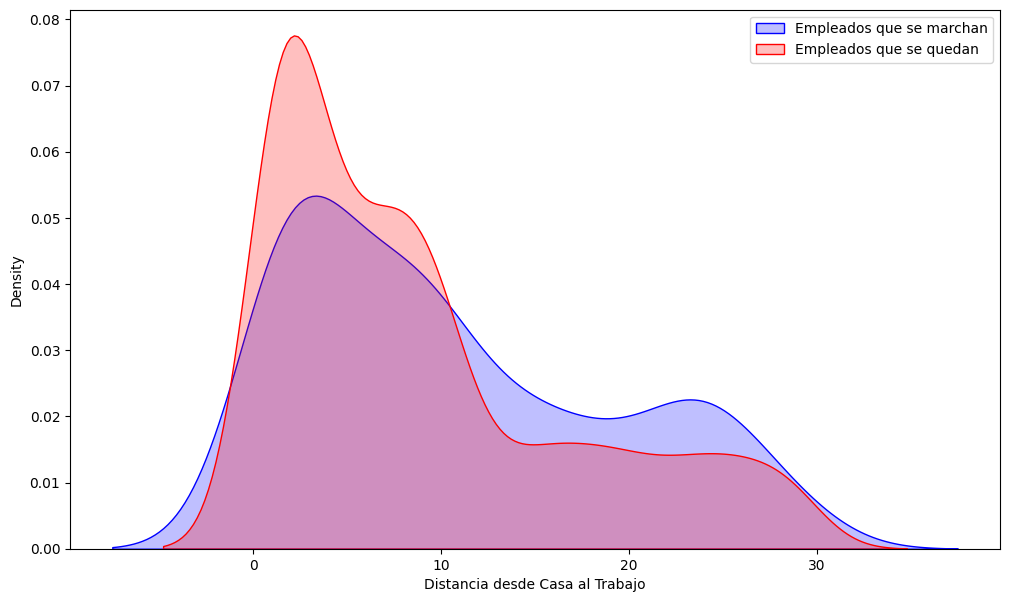

In [ ]:
plt.figure(figsize=(12, 7))

#funciones de densidad.   shade es para transparentar las graficas
sns.kdeplot(marchan_df['DistanceFromHome'], label = "Empleados que se marchan", shade = True, color = 'b')#funcion de densidad para DistanceFromHome de los que se van
sns.kdeplot(quedan_df['DistanceFromHome'], label = "Empleados que se quedan", shade = True, color = 'r')

plt.xlabel('Distancia desde Casa al Trabajo')
plt.legend()

El grafico muestra la distribucion de la densidad de probabilidad estimada de los empleados que se marchan y se quedan en funcion de la distancia al trabajo

Interpretacion: qué tan probable es que un usuario pertenezca al grupo de entre cero y 10km de casa, por ejemplo.
Veamos que, de los que se quedan suelen estar entre 0 a 10km, es mas probable que se marchen si la distancia aumenta

garfico naranja: Es mas probable que se queden si viven entre 0 a 10 km del trabajo 

grafico azul: misma interpretacion que el naranja solo que disminuye la probabilidad de que se marchen.

El gráfico no proporciona información directa sobre la probabilidad de que los empleados se marchen o se queden en la empresa en función de la distancia al trabajo.

Lo que se puede inferir a partir del gráfico es cómo se distribuyen los valores de la variable "DistanceFromHome" en los dos grupos de empleados: los que se marchan y los que se quedan. Sin embargo, esta distribución no implica necesariamente una relación causal entre la distancia al trabajo y la retención de empleados.

Por ejemplo, se puede observar que la distribución de los empleados que se marchan tiene un pico más pronunciado en valores más bajos de "DistanceFromHome", lo que indica que estos empleados tienen más probabilidades de vivir cerca del trabajo en comparación con los empleados que se quedan. También se puede notar que la distribución de los empleados que se quedan es más ancha y más simétrica en comparación con la distribución de los empleados que se marchan.

In [ ]:
employee_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

<ipython-input-45-2353160a1007>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(marchan_df['YearsWithCurrManager'], label = "Empleados que se marchan", shade = True, color = 'r')#funcion de densidad para DistanceFromHome de los que se van
<ipython-input-45-2353160a1007>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quedan_df['YearsWithCurrManager'], label = "Empleados que se quedan", shade = True, color = 'b')


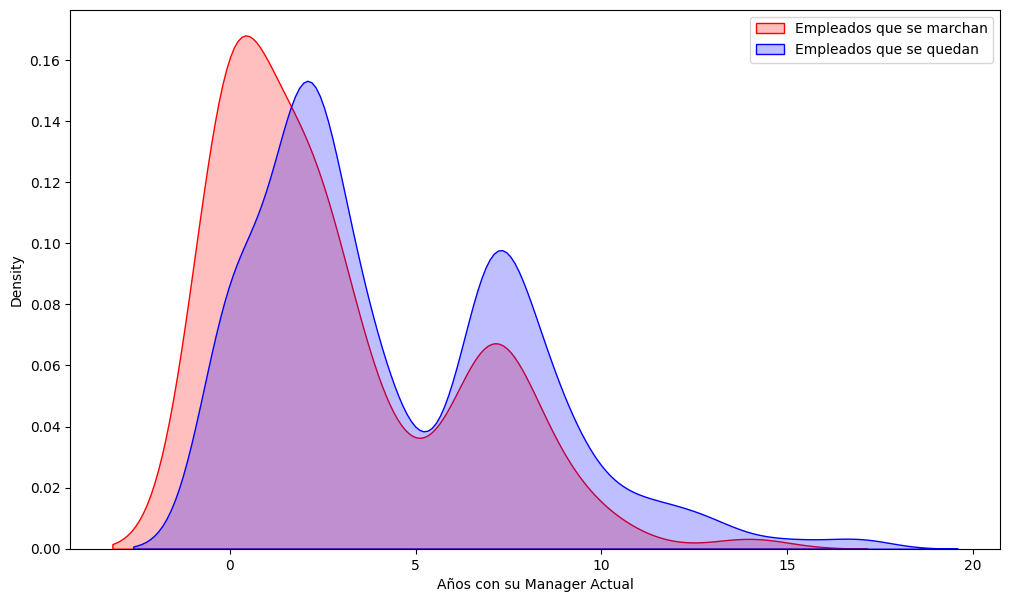

In [ ]:
plt.figure(figsize=(12, 7))

#funciones de densidad.   ahde es para transparentar las graficas
sns.kdeplot(marchan_df['YearsWithCurrManager'], label = "Empleados que se marchan", shade = True, color = 'r')#funcion de densidad para DistanceFromHome de los que se van
sns.kdeplot(quedan_df['YearsWithCurrManager'], label = "Empleados que se quedan", shade = True, color = 'b')

plt.xlabel('Años con su Manager Actual')
plt.legend()


<ipython-input-50-31eb2bc86dc7>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(marchan_df['TotalWorkingYears'], label = "Empleados que se marchan", shade = True, color = 'r')
<ipython-input-50-31eb2bc86dc7>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quedan_df['TotalWorkingYears'], label = "Empleados que se quedan", shade = True, color = 'b')


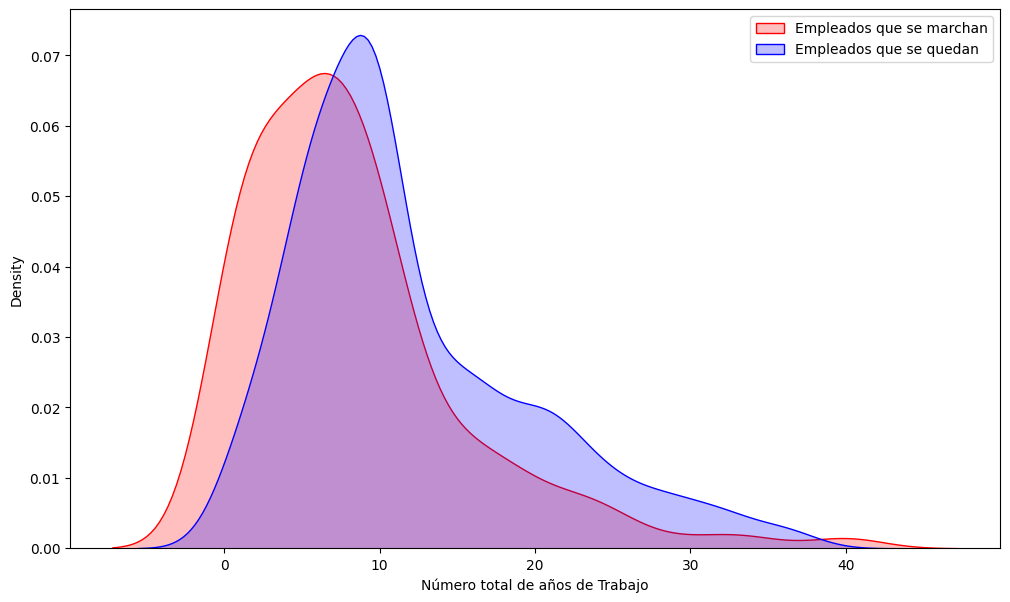

In [ ]:
plt.figure(figsize=(12, 7))

sns.kdeplot(marchan_df['TotalWorkingYears'], label = "Empleados que se marchan", shade = True, color = 'r')
sns.kdeplot(quedan_df['TotalWorkingYears'], label = "Empleados que se quedan", shade = True, color = 'b')

plt.xlabel('Número total de años de Trabajo')
plt.legend()

interpretacion: con 7 años de trayectoria laboral es mas probable que se vayan

In [ ]:
employee_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

Text(0.5, 1.0, 'Sueldo mensual segun su campo')

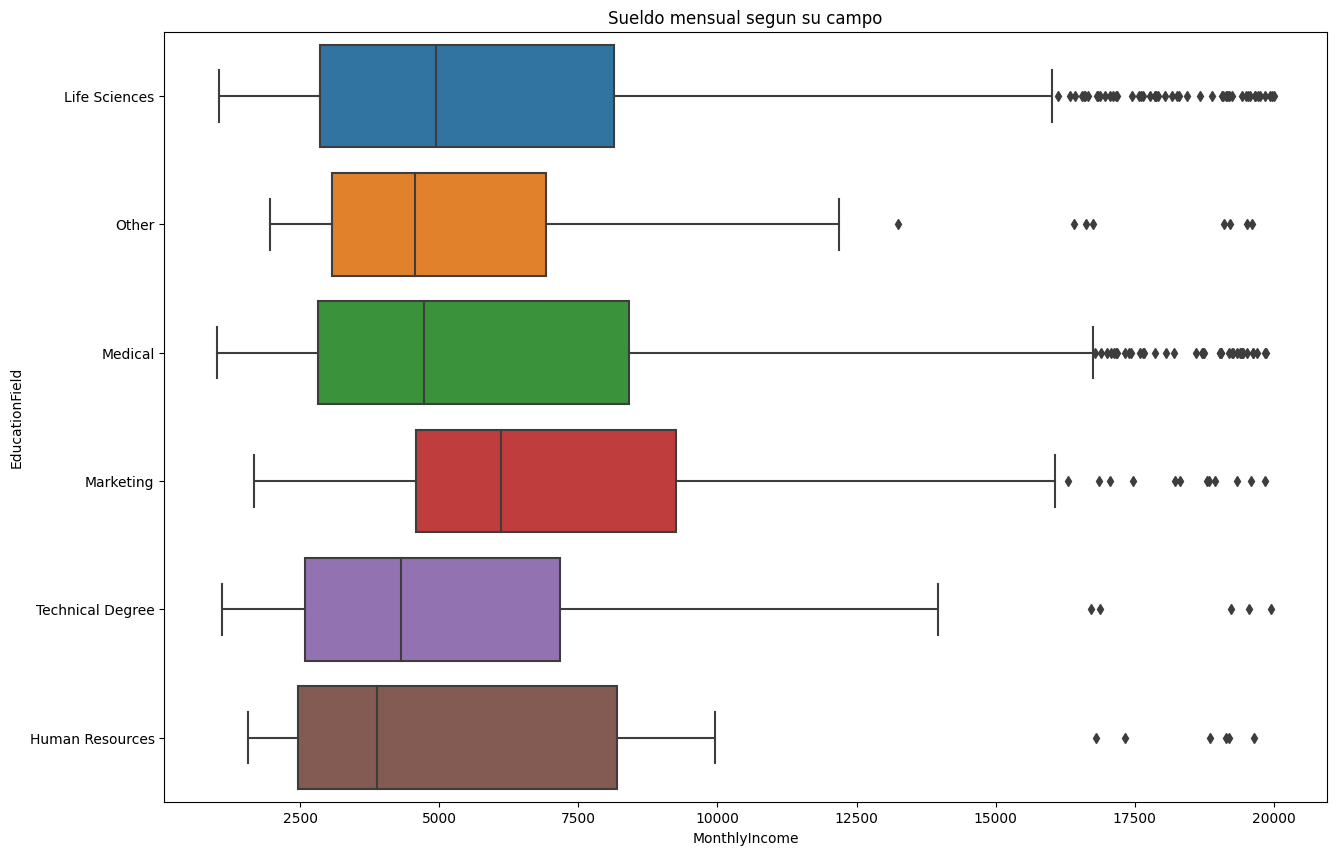

In [ ]:
#Sueldo mensual segun su campo de eduacion
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'EducationField', data = employee_df)
plt.title('Sueldo mensual segun su campo')

Text(0.5, 1.0, 'Sueldo mensual segun su genero genero')

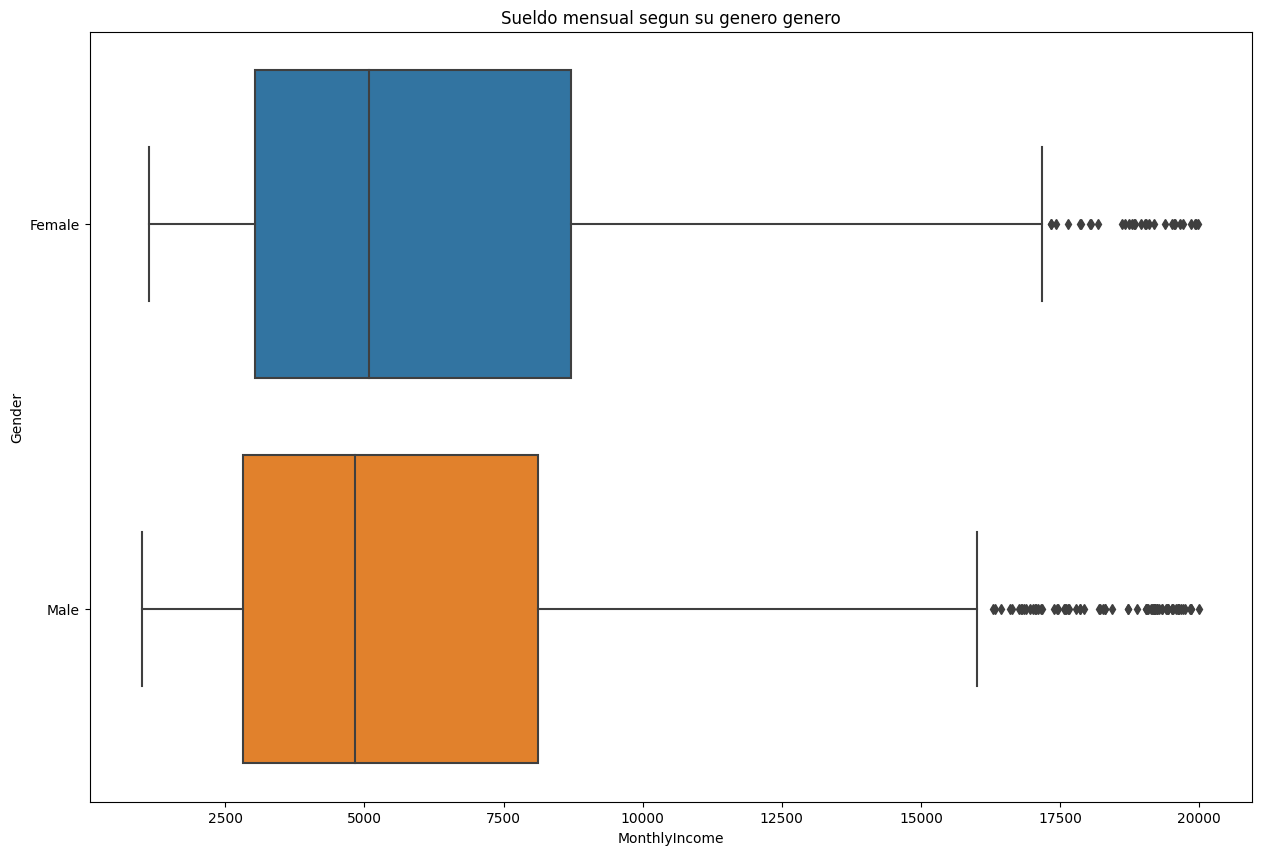

In [ ]:
# Veamos el Gender vs. Monthly Income
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data = employee_df)
plt.title('Sueldo mensual segun su genero genero')

Text(0.5, 1.0, 'Sueldo mensual en funcion del puesto de trabajo')

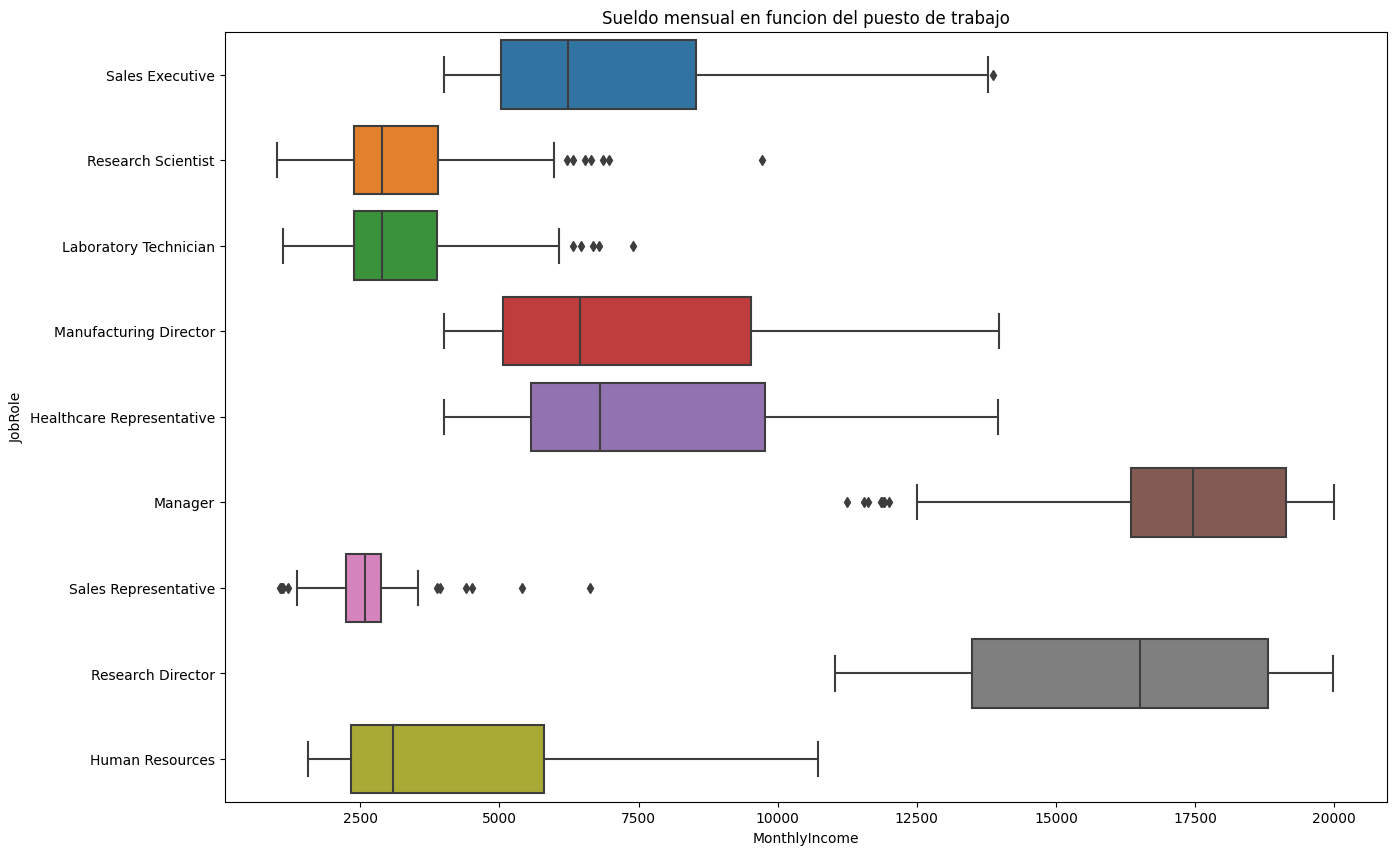

In [ ]:
# Veamos el monthly income vs. job role
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data = employee_df)
plt.title('Sueldo mensual en funcion del puesto de trabajo')

In [ ]:
#note que la naturaleza de los boxplots comparativos previos, son de tipo data categorica vs data numerica, entonces para comparar
#las variables de nuestro interes primero debemos convertir la data numerica a su respectiva data categorica para el eje "y" si es que se puede realizar tal ajuste

NOTA:

Si los datos siguen una distribución normal, la media se encuentra en el centro de la caja del boxplot, en la línea que representa la mediana. Si los datos no siguen una distribución normal, la media se puede calcular a partir de los valores que se muestran en el diagrama. En ese caso, se debe sumar los valores de la caja y dividir el resultado entre dos para obtener la media del conjunto de datos.

#### Preguntas adicionales que nos podemos hacer acerca de las variables

Con base en estas columnas, se pueden plantear diversas preguntas de análisis que ayuden a entender mejor los datos y a tomar decisiones más informadas. Algunas posibles preguntas son:

1. ¿Cuál es la tasa de rotación de empleados (Attrition) en la empresa?=> qué tan frecuente un empleado se va de la empresa (media)
2. ¿Cómo se distribuye la edad (Age) de los empleados en la empresa?
3. ¿Existe alguna correlación entre la distancia desde el hogar (DistanceFromHome) y la tasa de rotación de empleados (Attrition)? =< influye la distancia al trabajo en la desercion laboral?
4. ¿Hay alguna relación entre la educación (Education) de los empleados y su nivel de satisfacción laboral (JobSatisfaction)?
5. ¿Existe alguna correlación entre el salario mensual (MonthlyIncome) y el nivel de satisfacción laboral (JobSatisfaction) de los empleados?
6. ¿Cuál es la media de años que los empleados han trabajado en la empresa (YearsAtCompany) y compararlo con el tiempo que llevan laborando en la empresa?
7. ¿Hay alguna relación entre la cantidad de veces que los empleados han recibido capacitación en el último año (TrainingTimesLastYear) y su nivel de satisfacción laboral (JobSatisfaction)?
8. ¿Hay alguna relación entre el nivel de satisfacción con el balance entre la vida laboral y personal (WorkLifeBalance) y la tasa de rotación de empleados (Attrition)?
9. ¿Existe alguna correlación entre el número de compañías en las que los empleados han trabajado anteriormente (NumCompaniesWorked) y su nivel de satisfacción laboral (JobSatisfaction)?
10. ¿Cuál es la media de años que los empleados han trabajado en su puesto actual (YearsInCurrentRole)? ¿Hay alguna relación entre este dato y su nivel de satisfacción laboral (JobSatisfaction)?

Estas preguntas se dejan en el aire, pero es importante saber que al conjunto de datos se le puede sacar mucha más informacion.


# 5.- Implementar modelos de aprendizaje automático y o profundo.



### CREAR LOS DATA SETS DE ENTRENAMIENTO Y TESTING Y LLEVAR A CABO LA LIMPIEZA DE DATOS

In [ ]:
#empieza el proceso de imputacion y variables dummy
pd.set_option('display.max_columns', None)#mostrar todas las columnas
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [6]:
#¿cuáles son categóricas?
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [5]:
#data categorica
X_cat = employee_df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
X_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [ ]:
X_cat['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

## Codificacion

In [6]:
from sklearn.preprocessing import OneHotEncoder#libreria que codifica por nosotros las columnas categóricas, crea tantas columnas como categorias haya en una columna; variables dummy
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [12]:
 X_cat

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [7]:
#el modelo solo lee dataframes, no arrays; convertimos
X_cat=pd.DataFrame(X_cat)
X_cat#dataframe que contiene a las variables dummy

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
X_cat.shape

(1470, 26)

In [ ]:
employee_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [8]:
# creamos un df sin la variable predictora Atrittion y solo con las que eran numericas inicialmente (no las que trasnformamos a dummy)
X_numerical = employee_df[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]
X_numerical


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


In [ ]:
X_numerical.shape

(1470, 24)

In [9]:
#unimos los datasets en un dataset
X_all = pd.concat([X_cat, X_numerical], axis = 1)
X_all

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,3,1,17,3,3,5,2,0,3
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,1,1,9,5,3,7,7,1,7
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,2,1,6,0,3,6,2,0,3
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,3,4,0,17,3,2,9,6,0,8


In [12]:
X_all.columns = X_all.columns.astype(str)#para convertir las columnas a un mismo tipo de dato
X_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   0                         1470 non-null   float64
 1   1                         1470 non-null   float64
 2   2                         1470 non-null   float64
 3   3                         1470 non-null   float64
 4   4                         1470 non-null   float64
 5   5                         1470 non-null   float64
 6   6                         1470 non-null   float64
 7   7                         1470 non-null   float64
 8   8                         1470 non-null   float64
 9   9                         1470 non-null   float64
 10  10                        1470 non-null   float64
 11  11                        1470 non-null   float64
 12  12                        1470 non-null   float64
 13  13                        1470 non-null   float64
 14  14      

In [10]:
#Escalamos las variables (ya que usaremos regresion logistica y depende de distacias)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_all.columns = X_all.columns.astype(str)
X = scaler.fit_transform(X_all)

Es importante escalar las variables en este caso, pues el rango de las variables no coincide en ningun margen

In [ ]:
X#esta serán las variables de entrada; variable multivariante independiente

array([[0.        , 1.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 1.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 1.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 1.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 1.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

El escalado se hace para estandarizar o normalizar los valores de las columnas, pues las columnas que tienen valores mas elevados, ganan terreno frente a la lectura que les da el algorítmo, es decir, el algoritmo desprestigia las variables con valores bajos en su data. Entonces los escalamos para que considere por igual a todas las caracteristicas.
Se escalan entre valores de cero y uno, en ese rango. Esta tecnica tiene su fundamento estadistico por detras y esta comprobado que funciona

In [11]:
#nuestra variable predictora
y=employee_df['Attrition']
y
#se marcha=1, se queda=0

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

Tenemos ya todo preparado para suministrar la data al modelo, donde la variable multvariante caracteristica es X y la variable predictora es "y"

## ¿Cómo seleccionar el o los modelos adecuados?

Crearemos 3 modelos con el fin de comparar sus resultados y ver cuál es el mejor modelo clasificando a los empleados. La seleccion no es al azar, se escogen modelos que se "adapten a la data" 

## ¿Cómo evaluar el modelo?

# Parametros que miden qué tan bueno es un modelo: KPI's
- Accuracy 91% es un excelente modelo de prediccion (hasta este parametro por lo menos), pues solo se equivoca en 9% de las predicciones.
La KPI (Key Performance Indicator) de precisión y la KPI de exactitud o Accuracy son similares, pero no son exactamente lo mismo.
La KPI de exactitud o Accuracy se utiliza para medir la proporción de predicciones correctas en relación con todas las predicciones realizadas, es decir, el número total de predicciones correctas dividido por el número total de predicciones.
Un alto valor de la KPI de exactitud o Accuracy indica que un modelo predictivo o clasificador ha realizado muchas predicciones correctas en relación con el número total de predicciones realizadas. En otras palabras, indica que el modelo es efectivo para clasificar o predecir los datos en general.
Un alto valor de Accuracy suele ser una buena señal y puede indicar que el modelo es preciso y confiable. Sin embargo, es importante tener en cuenta que el valor de Accuracy no siempre cuenta toda la historia y no debe ser la única métrica para evaluar la efectividad del modelo. Por ejemplo, si el conjunto de datos es desequilibrado o sesgado, un alto valor de Accuracy podría ser engañoso, ya que el modelo puede estar favoreciendo una clase en detrimento de otra.
Por lo tanto, es importante considerar también otras KPIs como la precisión, la recall, la F1 score y la matriz de confusión, así como realizar una evaluación cuidadosa y exhaustiva del modelo para asegurarse de que es adecuado para el propósito previsto.

- Precision 50% indica que para cada observacion, tiene el 50% de prob. de acertar correctamente en la clasificacion; es decir casi casi al azar, pues que tenga las mismas probabilidades de fallas que de acertar en la clasificacion es poco preciso.
En otras palabras, la KPI de precisión indica cuántas de las predicciones realizadas por el modelo son correctas y qué porcentaje de todas las predicciones son precisas. Cuanto mayor sea la precisión, mayor será la calidad del modelo y mejores serán las predicciones que se puedan hacer con él.

- Recall La KPI (Key Performance Indicator) de recall, también conocida como sensibilidad o tasa de verdaderos positivos, es una métrica que se utiliza para medir la capacidad de un modelo predictivo o clasificador para identificar correctamente todas las muestras positivas en un conjunto de datos. Se calcula como el número de verdaderos positivos dividido por la suma de verdaderos positivos y falsos negativos.
En otras palabras, la KPI de recall indica la proporción de todas las muestras positivas en el conjunto de datos que el modelo pudo identificar correctamente. Cuanto mayor sea el valor de recall, mejor será la capacidad del modelo para detectar correctamente las muestras positivas.
La KPI de recall es especialmente importante en situaciones en las que la identificación correcta de muestras positivas es crítica, como en el caso de pruebas de diagnóstico médico o la detección de fraudes. Sin embargo, también es importante tener en cuenta que un alto valor de recall puede estar asociado con un aumento en los falsos positivos, lo que puede llevar a una mayor cantidad de recursos y tiempo invertidos en verificar y validar los resultados.

El kpi F1-Score es una combinacion de la precision y recall
El F1-Score es una KPI (Key Performance Indicator) que combina la precisión y el recall para proporcionar una medida única de la calidad general de un modelo predictivo o clasificador. Se calcula como la media armónica de la precisión y el recall, es decir, 2 veces la precisión multiplicada por el recall, dividido por la suma de la precisión y el recall.

El F1-Score es una métrica especialmente útil cuando se trabaja con conjuntos de datos desequilibrados o sesgados, donde una clase tiene muchas más instancias que otra. En estos casos, la KPI de exactitud o Accuracy puede ser engañosa, ya que el modelo puede favorecer la clase mayoritaria y producir predicciones incorrectas para la clase minoritaria. La precisión y el recall son útiles para evaluar la efectividad del modelo para una clase específica, pero no proporcionan una evaluación completa del modelo.

El F1-Score combina tanto la precisión como el recall en una sola métrica y proporciona una medida más equilibrada de la calidad general del modelo. Un valor alto de F1-Score indica que el modelo tiene un buen equilibrio entre la precisión y el recall, lo que significa que puede identificar correctamente tanto las muestras positivas como las negativas. Sin embargo, al igual que con cualquier KPI, es importante considerar también otras métricas y realizar una evaluación cuidadosa del modelo antes de tomar decisiones importantes basadas en los resultados.

El F1-Score toma valores entre 0 y 1, siendo 1 el mejor valor posible. Un F1-Score de 0 indica que el modelo es incapaz de predecir correctamente la clase positiva, mientras que un F1-Score de 1 indica que el modelo es perfecto en la predicción de la clase positiva. La interpretación del valor de F1-Score puede variar dependiendo del dominio de aplicación y la importancia relativa de la precisión y el recall. En general, un valor alto de F1-Score se considera un indicador de que el modelo es bueno en la predicción de la clase positiva y tiene un equilibrio adecuado entre la precisión y el recalle

Lo que nos interesa saber en este caso es tener buenas predicciones para la gente que se va, ya que ese tipo de empleados son los que generan gastos en la rotación de personal.

## ENTRENAR Y EVALUAR UN CLASIFICADOR UTILIZANDO LA REGRESIÓN LOGÍSTICA SIN PROCESAR

In [12]:
#dividir el conjunto en entrenamiento y testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [16]:
X_train.shape

(1102, 50)

In [17]:
X_test.shape

(368, 50)

In [18]:
y_train.shape

(1102,)

In [19]:
y_test.shape

(368,)

In [13]:
#creamos el modelo y lo ajustamos, y hacemos la prediccion
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score#para la tasa de acierto

#crear el modelo y ajustarlo
model = LogisticRegression()#modelo sin procesar
model.fit(X_train, y_train)

#hacer predicciones
y_pred = model.predict(X_test)
y_pred = np.array(y_pred)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
y_pred.shape

(368,)

In [22]:
#comparar los resultados de  y_test y y_pred
#de array a lista
a=y_test.tolist()
b=y_pred.tolist()

#diccionario
dic_comparation={"variable de testing y_train": a, "variable de prediccion y_pred": b}

#dataframe
df_comparation=pd.DataFrame(dic_comparation)
df_comparation

,variable de testing y_train,variable de prediccion y_pred
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
363,0,0
364,0,0
365,0,0
366,0,0


In [14]:
#1 evaluar el modelo con Accuracy
from sklearn.metrics import confusion_matrix, classification_report

print("Accuracy {} %".format(100*accuracy_score(y_pred, y_test)))

Accuracy 87.5 %


El algoritmo tiene una tasa de acierto del 89%, es decir, de cada 100 observaciones 89 de ellas son clasificadas correctamente sólo tomando en cuenta la metrica accuracy. Pero no basta con esa métrica, tenemos que investigar las demás

Este es el valor de la precisión global pero ahora analicemos como se comporten modelo en cada clase.

- Clase positiva : 1 se marchan

- CLase negativa: 0 se quedan

<Axes: >

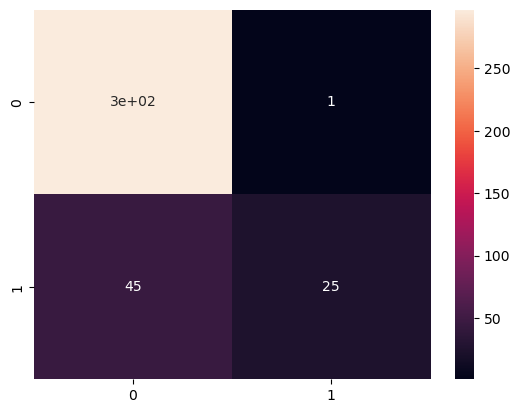

In [15]:
#2 matriz de confusion con mapa de calor
cm = confusion_matrix( y_test, y_pred )
sns.heatmap(cm, annot=True)#annot=True para que escriba el numero de cada tipo de error

#### correctos
- Verdaderos negativos (entrada 1,1) : El algoritmo predice correctamente los casos negativos
- Verdaderos positivos (entrada 2,2) : El modelo predice correctamente los casos positivos

#### errores
- error tipo 1 Falso positivo (entrada 1,2):el modelo predice positivo, pero es negativo; predice mal las instancias negativas 
- error tipo 2 Falso negativo (entrada entrada 2,1): el modelo predice negativo, pero es positivo; predice mal las instancias positivas

In [29]:
X.shape  # (368, 10)

(1470, 50)

In [31]:
y.shape  # (20,)

(1470,)

In [23]:
print(y_test.shape)  # Debe ser (368,)
print(y_pred.shape)  # Debe ser (368,)


(368,)
(368,)


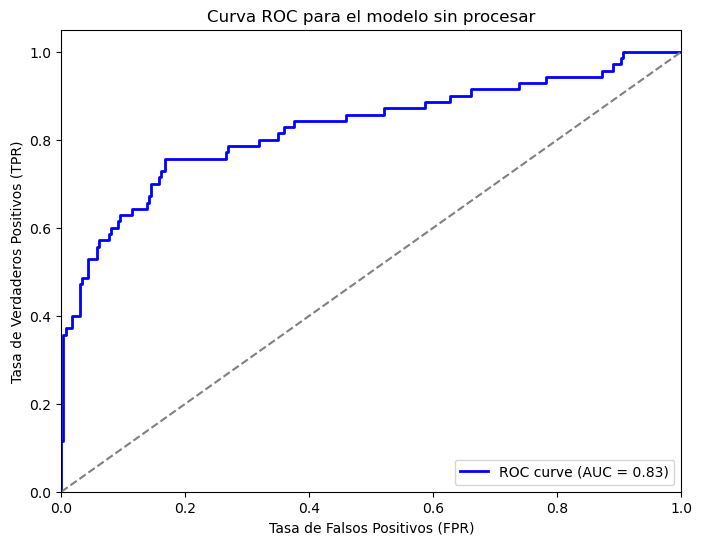

In [16]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtener las probabilidades de predicción
y_prob = model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC para el modelo sin procesar')
plt.legend(loc='lower right')
plt.show()


In [17]:
from sklearn.metrics import roc_curve

# Calcular la curva ROC y obtener los umbrales
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Mostrar algunos valores de los umbrales junto con FPR y TPR
for i in range(0, len(thresholds), max(1, len(thresholds) // 10)):  # Muestra 10 valores distribuidos
    print(f"Umbral: {thresholds[i]:.2f}, FPR: {fpr[i]:.2f}, TPR: {tpr[i]:.2f}")


Umbral: inf, FPR: 0.00, TPR: 0.00
Umbral: 0.47, FPR: 0.02, TPR: 0.37
Umbral: 0.36, FPR: 0.04, TPR: 0.53
Umbral: 0.29, FPR: 0.08, TPR: 0.59
Umbral: 0.22, FPR: 0.11, TPR: 0.64
Umbral: 0.17, FPR: 0.16, TPR: 0.70
Umbral: 0.11, FPR: 0.27, TPR: 0.77
Umbral: 0.08, FPR: 0.36, TPR: 0.81
Umbral: 0.04, FPR: 0.52, TPR: 0.87
Umbral: 0.02, FPR: 0.74, TPR: 0.91
Umbral: 0.01, FPR: 0.89, TPR: 0.97


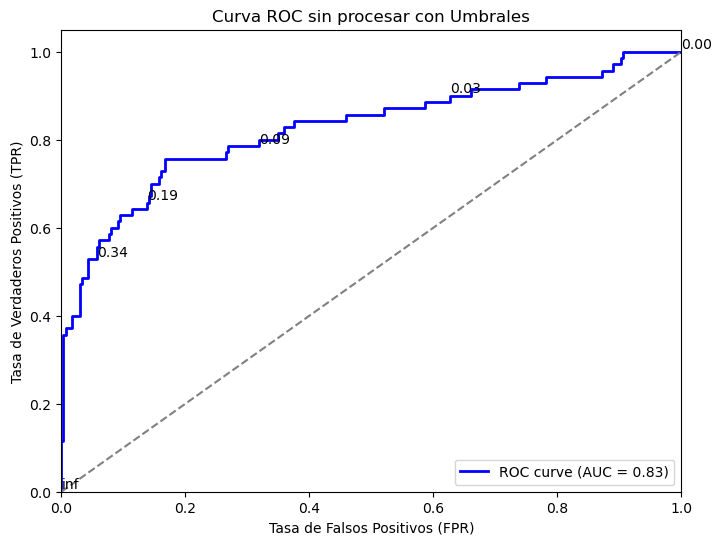

In [18]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea diagonal

# Marcar algunos umbrales en la curva
for i in range(0, len(thresholds), len(thresholds) // 5):  # Muestra 5 valores distribuidos
    plt.text(fpr[i], tpr[i], f'{thresholds[i]:.2f}', fontsize=10, verticalalignment='bottom')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC sin procesar con Umbrales')
plt.legend(loc='lower right')
plt.show()


In [19]:
#reporte completo para decidir si es buen modelo o no
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       298
           1       0.96      0.36      0.52        70

    accuracy                           0.88       368
   macro avg       0.91      0.68      0.72       368
weighted avg       0.89      0.88      0.85       368



## Precision:
    - Clase 1: de todos los casos en los que se detectó o predijo que si deja la empresa (suma vertical en la columna de 1), el 96% realmente la dejan)

    - Clase 0: De todos los que se predijo que no dejan la empresa (suma vertical de la columna cero), el 87% realmente no la dejan

Conclusion: el modelo es bueno prediciendo o detectando la clase 0 (no se marchan) y malo detectando la clase 1 (no se marchan). Lo que es malo para nuestros objetivos porque queremos que el modelo predija bien la clase 1 antes que la 0; non interesa saber con mas precision si un empleado efectivamente dejará la empresa (clase 1)

# Rcall:
    - clase 1: El 36% de los que realmente se marchan (suma de la fila 1) fueron identificados

    - Clase 0: El 100% de los que realmente se quedan (suma de la fila cero) fueron identificados

Conclusion: El modelo Es malo identificando a las personas que se marchan, solo detecta al de los que se marchan realmente y es excelente identificando a los que no se marchan realmente. Debemos intentar aumentar el Rcall de la clase 1 ya que ese es el principal interes; detectar quién si se marcha efectivamente

# $F_1$ Score

    - f1-score para la clase 0 es del 93%, lo que indica que el modelo es bastante bueno en la clasificación de la clase 0. 
    
    - El f1-score para la clase 1 es del 52%, lo que indica que el modelo no es tan bueno en la clasificación de la clase 1.


En conclusión, el modelo de regresión logística parece ser bastante bueno en la clasificación de la clase 0, pero no es tan bueno en la clasificación de la clase 1. Y como nuestro objetivo es maximizar las buenas detecciones para la clase 1, hay que estudiar mas el modelo

Que debemos hacer?

- Lo que nos interesa es identificar bien a la clase 1; aumentar el rcall de la clase 1, ya que solo detecta a 36 % de los que realmente se marchan

  Ya que Rcall para la clase 1 se define como:  $TP / (TP+FN)$, para que esa division sea mas grande, debemos disminuir el denominador; es decir, disminuir los falsos negativos y aumentar el Rcall (tasa de verdaderos positivos)

Notamos que hay un desbalance aunque no es tan severo; 17% de los datos son de la clase 1 y 83% son de la clase cero; es por esa razon la preferencia a la clase cero. Necesitamos balancear el dataset y minimizar los falsos negativos

## ENTRENAR Y EVALUAR UN CLASIFICADOR UTILIZANDO LA REGRESIÓN LOGÍSTICA PROCESADA

Intentaremos balancear el modelo de regresión logística.


Reporte de Clasificación con balance de clases:
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       298
           1       0.48      0.69      0.57        70

    accuracy                           0.80       368
   macro avg       0.70      0.76      0.72       368
weighted avg       0.84      0.80      0.81       368



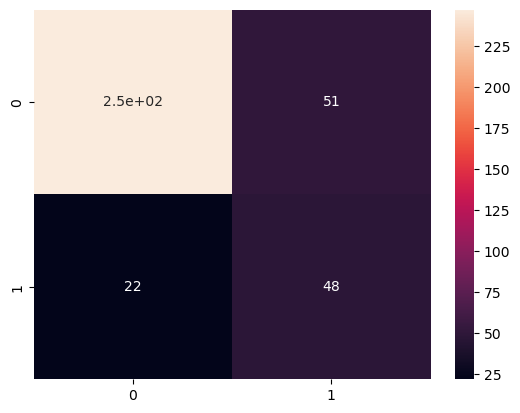

In [21]:
# Dividir en conjuntos de entrenamiento y prueba
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# Modelo de regresión logística con class_weight='balanced'
model2 = LogisticRegression(class_weight='balanced', random_state=42)
model2.fit(X_train, y_train)

# Predicciones
y_pred2 = model2.predict(X_test)

# Evaluación del modelo

cm2 = confusion_matrix( y_test, y_pred2 )
sns.heatmap(cm2, annot=True)
class_report = classification_report(y_test, y_pred2)



print("\nReporte de Clasificación con balance de clases:")
print(class_report)

Observamos que hemos ganado porcentaje en rcall de la clase 1; intentaremos minimizar los flasos negativos (entrada 2,1) (aumentar la tasa de verdaderos positivos RCALL) con este model de la clase 1 ya con el modelo balanceado

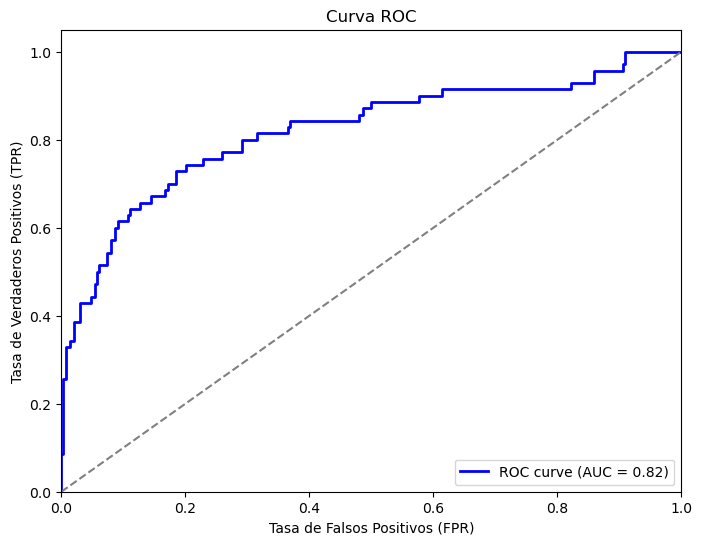

In [22]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtener las probabilidades de predicción
y_prob2 = model2.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob2)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [23]:
from sklearn.metrics import roc_curve

# Calcular la curva ROC y obtener los umbrales
fpr, tpr, thresholds = roc_curve(y_test, y_prob2)

# Mostrar algunos valores de los umbrales junto con FPR y TPR
for i in range(0, len(thresholds), max(1, len(thresholds) // 10)):  # Muestra 10 valores distribuidos
    print(f"Umbral: {thresholds[i]:.2f}, FPR: {fpr[i]:.2f}, TPR: {tpr[i]:.2f}")

Umbral: inf, FPR: 0.00, TPR: 0.00
Umbral: 0.84, FPR: 0.01, TPR: 0.33
Umbral: 0.77, FPR: 0.05, TPR: 0.44
Umbral: 0.68, FPR: 0.07, TPR: 0.51
Umbral: 0.64, FPR: 0.09, TPR: 0.61
Umbral: 0.54, FPR: 0.14, TPR: 0.66
Umbral: 0.48, FPR: 0.18, TPR: 0.73
Umbral: 0.38, FPR: 0.29, TPR: 0.77
Umbral: 0.28, FPR: 0.37, TPR: 0.84
Umbral: 0.16, FPR: 0.58, TPR: 0.89
Umbral: 0.04, FPR: 0.86, TPR: 0.96


Lo que buscamos es maximizar el Rcall de la clase 1 y de paso no empeorar el rcall de la clase 0:

Para maximizar la Tasa de Verdaderos Positivos (TPR) sin afectar demasiado a la Tasa de Falsos Positivos (FPR), debes buscar un umbral que mantenga un equilibrio entre un TPR alto y un FPR bajo.






Para el modleo sin procesar:

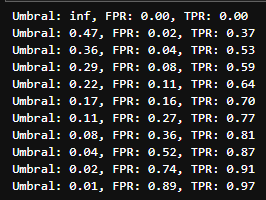

Con el modelo procesado (balanceado):

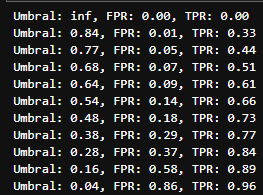

Mejor regresion logistica:

    - Sin procesar: el umbral ideal es el 0.04 ya que maximiza la tasa de verdaderos negativos sin afectar demasiado a la tasa de falsos positivos

    - Procesado: el umbral ideal es 0.16 ya que maximiza TPR y minimiza FPR

Cual escoger?:

- El modelo Porcesado con umbral de 0.16 es mejor porque, dentro de esa extremizacion de ambos modelos, TPR se maximiza mas y FPR se minimiza menos. Aunque tambien es buena opcion el umbral 0,28

- 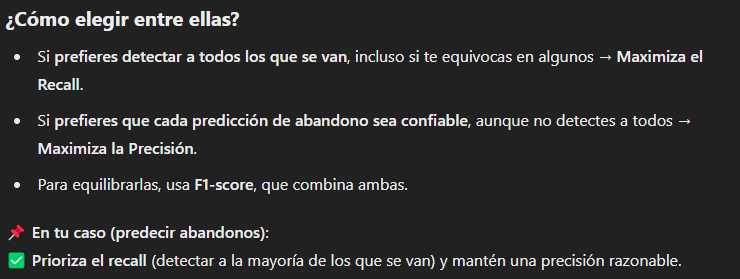

## ENTRENAR Y EVALUR UN CLASIFICADOR UTILIZANDO BOSQUES ALEATORIOS

In [ ]:
#creamos y ajustamos el modelo
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
#comparamos
a1=y_test.tolist()
b1=y_pred.tolist()

#diccionario
dic_comparation={"variable de entrenamiento (suministrado) y_test": a1, "variable de prediccion (por el modelo) y_pred": b1}

#dataframe
df_comparation1=pd.DataFrame(dic_comparation)
df_comparation1

,variable de entrenamiento (suministrado) y_test,variable de prediccion (por el modelo) y_pred
0,0,[0.4869058132171631]
1,1,[0.5243713855743408]
2,1,[0.5036746859550476]
3,0,[0.5182401537895203]
4,1,[0.5126484632492065]
...,...,...
363,0,[0.5174253582954407]
364,0,[0.510216236114502]
365,0,[0.5022139549255371]
366,0,[0.5061290860176086]


<Axes: >

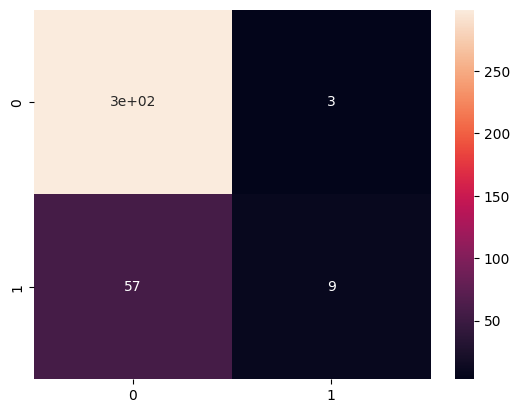

In [ ]:
#mapa de calor para matriz de confusion
cm = confusion_matrix( y_test, y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
#reporte
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       302
           1       0.75      0.14      0.23        66

    accuracy                           0.84       368
   macro avg       0.79      0.56      0.57       368
weighted avg       0.82      0.84      0.79       368



Una vez mas, este algoritmo no es el optimo para nuestro caso de estudio debido al bajo Rcall de la clase 1

## ENTRENAR Y EVALUR UN CLASIFICADOR UTILIZANDO DEEP LEARNING

In [ ]:
import tensorflow as tf#libreria para entrenar modelos de IA

In [ ]:
X_all.shape

(1470, 50)

In [ ]:
#definir arquitectura
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 500, activation='relu', input_shape=(50, )))#units no. de neutonas de la primera capa oculta, activation=relu, activacion lineas y input_shape=(50, ) obligado a ponerlo en la primera linea; 50 variables(son la cantidad de variables de la data X_all), cada una de ellas suministradas en lotes y como el lote tiene tamaño variable, no se incorporará
model.add(tf.keras.layers.Dense(units = 500, activation='relu'))
model.add(tf.keras.layers.Dense(units = 500, activation='relu'))
model.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))#nos arrojará la probabilidad


In [ ]:
#resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               25500     
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 1)                 501       
                                                                 
Total params: 527,001
Trainable params: 527,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compilar el modelo como optimizador
model.compile(optimizer='Adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
# oversampler = SMOTE(random_state=0)
# smote_train, smote_target = oversampler.fit_sample(X_train, y_train)
# epochs_hist = model.fit(smote_train, smote_target, epochs = 100, batch_size = 50)
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size=50)

Epoch 1/100
23/23 [==============================] - 3s 21ms/step - loss: 0.4355 - accuracy: 0.8113
Epoch 2/100
23/23 [==============================] - 0s 19ms/step - loss: 0.3440 - accuracy: 0.8575
Epoch 3/100
23/23 [==============================] - 0s 20ms/step - loss: 0.3128 - accuracy: 0.8820
Epoch 4/100
23/23 [==============================] - 0s 14ms/step - loss: 0.2808 - accuracy: 0.8966
Epoch 5/100
23/23 [==============================] - 0s 13ms/step - loss: 0.2595 - accuracy: 0.9083
Epoch 6/100
23/23 [==============================] - 0s 12ms/step - loss: 0.2478 - accuracy: 0.9002
Epoch 7/100
23/23 [==============================] - 0s 12ms/step - loss: 0.2089 - accuracy: 0.9274
Epoch 8/100
23/23 [==============================] - 0s 12ms/step - loss: 0.1850 - accuracy: 0.9265
Epoch 9/100
23/23 [==============================] - 0s 13ms/step - loss: 0.1313 - accuracy: 0.9564
Epoch 10/100
23/23 [==============================] - 0s 12ms/step - loss: 0.1548 - accuracy: 0.9365

In [ ]:
y_pred = model.predict(X_test)
y_pred


12/12 [==============================] - 0s 4ms/step


array([[0.4869058 ],
       [0.5243714 ],
       [0.5036747 ],
       [0.51824015],
       [0.51264846],
       [0.5077259 ],
       [0.49961123],
       [0.5022876 ],
       [0.515046  ],
       [0.51402444],
       [0.5066461 ],
       [0.5100484 ],
       [0.51754844],
       [0.52140003],
       [0.4763498 ],
       [0.49182054],
       [0.50368667],
       [0.5154613 ],
       [0.49926105],
       [0.5001597 ],
       [0.51187986],
       [0.5132826 ],
       [0.5124009 ],
       [0.51824677],
       [0.52868724],
       [0.50169295],
       [0.49569336],
       [0.523493  ],
       [0.5132817 ],
       [0.5174158 ],
       [0.5130433 ],
       [0.51267266],
       [0.49412403],
       [0.5289913 ],
       [0.52781796],
       [0.49632952],
       [0.5172204 ],
       [0.52804345],
       [0.5085391 ],
       [0.52126026],
       [0.5167862 ],
       [0.51206464],
       [0.51071066],
       [0.50451916],
       [0.510418  ],
       [0.5137085 ],
       [0.5297915 ],
       [0.509

In [ ]:
#convertir la probabilidad en true si >0.5 y false si <0.5
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [

In [ ]:

epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

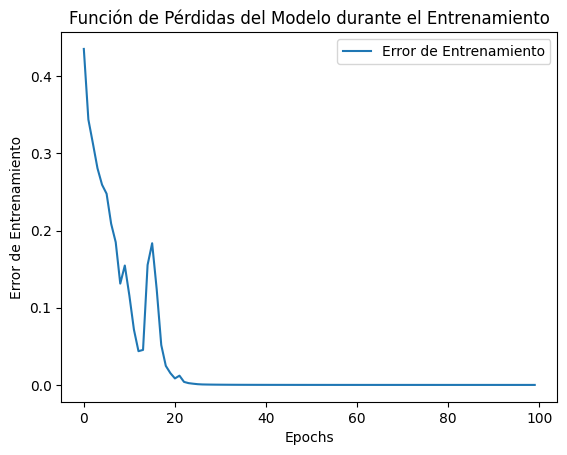

In [ ]:
# Pérdidas del Modelo durante el Entrenamiento
plt.plot(epochs_hist.history['loss'])
plt.title("Función de Pérdidas del Modelo durante el Entrenamiento")
plt.xlabel("Epochs")
plt.ylabel("Error de Entrenamiento")
plt.legend(["Error de Entrenamiento"])

Como vemos, a medida que hay mas epochs (cuanto mas se pasan los datos por la red neuronal), mejor es esta y menor error produce en la clasificacion.

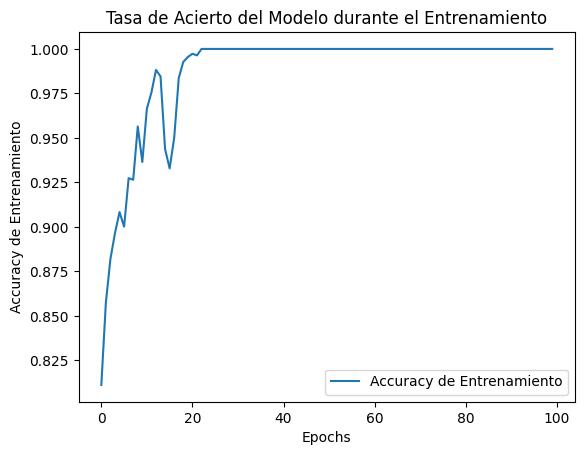

In [ ]:
#Tasa de Acierto del Modelo durante el Entrenamiento
plt.plot(epochs_hist.history['accuracy'])
plt.title("Tasa de Acierto del Modelo durante el Entrenamiento")
plt.xlabel("Epochs")
plt.ylabel("Accuracy de Entrenamiento")
plt.legend(["Accuracy de Entrenamiento"])

<Axes: >

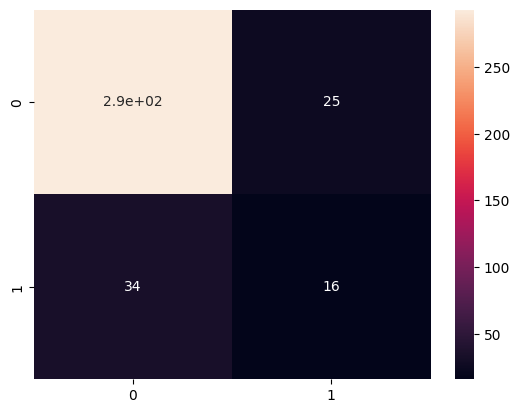

In [ ]:
# Resultados en el Conjunto de Testing (evaluar el modelo)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       318
           1       0.39      0.32      0.35        50

    accuracy                           0.84       368
   macro avg       0.64      0.62      0.63       368
weighted avg       0.83      0.84      0.83       368



Nota: la tasa de acierto global es sumar la primera diagonal y restarle la suma de la segunda diagonal y dividir por el no. total de datos de test en este caso



# Conclusion de modelos
## 1.- REGRESION LOGISTICA

Mejoramos el modelo y obtuvimos un buen rendimiento con la clase 1, que es la de especial importancia, ya que es mas relevante saber si un empleado se va a ir que uno que se va a quedar, dado que hay mas costos en la rotacion de personal que en la permanencia.


## 2.- BOSQUES ALEATORIOS

- La precisión del modelo en la clasificación de la clase 0 es del 84%, lo que indica que el modelo tiene un buen desempeño en la clasificación correcta de los casos de la clase 0. Sin embargo, la precisión en la clasificación de la clase 1 es del 75%, lo que sugiere que el modelo tiene más dificultades para clasificar correctamente los casos positivos de la clase 1.

- La medida de recall del modelo para la clase 1 es del 0.14, lo que indica que el modelo tiene dificultades para detectar correctamente los casos positivos de la clase 1. La medida F1-score para la clase 1 es relativamente baja (0,23), lo que sugiere que el modelo tiene dificultades en la clasificación correcta de los casos de la clase 1.

- La medida de accuracy del modelo es del 84%, lo que indica que el modelo clasifica correctamente alrededor del 84% de todos los casos.

- En general, el modelo parece tener dificultades para clasificar correctamente los casos positivos de la clase 1, lo que sugiere que el modelo podría ser mejorado. Por lo tanto, se podría decir que el modelo no es ideal, pero tampoco es necesariamente malo.


## 3.- DEEP LEARNING

- La precisión del modelo en la clasificación de la clase 0 es del 90%, lo que indica que el modelo tiene un buen desempeño en la clasificación correcta de los casos de la clase 0. La precisión en la clasificación de la clase 1 es del 39%, lo que sugiere que el modelo tiene dificultades para clasificar correctamente los casos positivos de la clase 1.

- La medida de recall del modelo para la clase 1 es del 0.32, lo que indica que el modelo tiene dificultades para detectar correctamente los casos positivos de la clase 1. La medida F1-score para la clase 1 es relativamente baja (0,35), lo que sugiere que el modelo tiene dificultades en la clasificación correcta de los casos de la clase 1.

- La medida de accuracy del modelo es del 84%, lo que indica que el modelo clasifica correctamente alrededor del 84% de todos los casos.

- En general, el modelo parece tener dificultades para clasificar correctamente los casos positivos de la clase 1, lo que sugiere que el modelo podría ser mejorado. Sin embargo, el modelo tiene una buena precisión en la clasificación de la clase 0 y una medida F1-score general razonablemente buena (0,83), lo que indica que el modelo tiene un desempeño aceptable en general. Por lo tanto, se podría decir que el modelo no es ideal, pero tampoco es necesariamente malo.


## 4.- Entonces, ¿Cuál es mejor modelo?

Como data scientist daré la siguiente respuesta sujeta a mejoras, cambios y ajustes:

El modelo de regresion logistica balanceado y con umbral de 0.16 o 0.28 es el mejor ya que extrremiza bien la tasa de verdaderos positivos Rcall y la 1 - especifidad (tasa de falsos positivos)





##### 






